# Notebook para Análisis de Precios de Toyota Corolla


## Carga del dataset


In [748]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mlflow

Traemos el dataframe que quedó guardado por el asset anterior


In [749]:
from pathlib import Path

raw_path = Path("data/raw_df.csv").resolve()
raw_dataset = pd.read_csv(raw_path)

Hacemos una copia para que nos quede intacto el original por si lo necesitamos para después


In [750]:
# Cargar dataset
df = raw_dataset.copy()

## Descripción del dataset


Vamos viendo qué onda este dataset


In [751]:
df.shape

(1436, 37)

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [753]:
df.describe().T

count          mean           std     min       25%  \
Id                1436.0    721.555014    416.476890     1.0    361.75   
Price             1436.0  10730.824513   3626.964585  4350.0   8450.00   
Age_08_04         1436.0     55.947075     18.599988     1.0     44.00   
Mfg_Month         1436.0      5.548747      3.354085     1.0      3.00   
Mfg_Year          1436.0   1999.625348      1.540722  1998.0   1998.00   
KM                1436.0  68533.259749  37506.448872     1.0  43000.00   
HP                1436.0    101.502089     14.981080    69.0     90.00   
Met_Color         1436.0      0.674791      0.468616     0.0      0.00   
Automatic         1436.0      0.055710      0.229441     0.0      0.00   
cc                1436.0   1576.855850    424.386770  1300.0   1400.00   
Doors             1436.0      4.033426      0.952677     2.0      3.00   
Cylinders         1436.0      4.000000      0.000000     4.0      4.00   
Gears             1436.0      5.026462      0.188510     3.0      5.00   
Quarterly_Tax     1436.0     87.122563     41.128611    19.0     69.00   
Weight            1436.0   1072.459610     52.641120  1000.0   1040.00   
Mfr_Guarantee     1436.0      0.409471      0.491907     0.0      0.00   
BOVAG_Guarantee   1436.0      0.895543      0.305959     0.0      1.00   
Guarantee_Period  1436.0      3.815460      3.011025     3.0      3.00   
ABS               1436.0      0.813370      0.389750     0.0      1.00   
Airbag_1          1436.0      0.970752      0.168559     0.0      1.00   
Airbag_2          1436.0      0.722841      0.447751     0.0      0.00   
Airco             1436.0      0.508357      0.500104     0.0      0.00   
Automatic_airco   1436.0      0.056407      0.230786     0.0      0.00   
Boardcomputer     1436.0      0.294568      0.456007     0.0      0.00   
CD_Player         1436.0      0.218663      0.413483     0.0      0.00   
Central_Lock      1436.0      0.580084      0.493717     0.0      0.00   
Powered_Windows   1436.0      0.561978      0.496317     0.0      0.00   
Power_Steering    1436.0      0.977716      0.147657     0.0      1.00   
Radio             1436.0      0.146240      0.353469     0.0      0.00   
Mistlamps         1436.0      0.256964      0.437111     0.0      0.00   
Sport_Model       1436.0      0.300139      0.458478     0.0      0.00   
Backseat_Divider  1436.0      0.770195      0.420854     0.0      1.00   
Metallic_Rim      1436.0      0.204735      0.403649     0.0      0.00   
Radio_cassette    1436.0      0.145543      0.352770     0.0      0.00   
Tow_Bar           1436.0      0.277855      0.448098     0.0      0.00   

                      50%       75%       max  
Id                  721.5   1081.25    1442.0  
Price              9900.0  11950.00   32500.0  
Age_08_04            61.0     70.00      80.0  
Mfg_Month             5.0      8.00      12.0  
Mfg_Year           1999.0   2001.00    2004.0  
KM                63389.5  87020.75  243000.0  
HP                  110.0    110.00     192.0  
Met_Color             1.0      1.00       1.0  
Automatic             0.0      0.00       1.0  
cc                 1600.0   1600.00   16000.0  
Doors                 4.0      5.00       5.0  
Cylinders             4.0      4.00       4.0  
Gears                 5.0      5.00       6.0  
Quarterly_Tax        85.0     85.00     283.0  
Weight             1070.0   1085.00    1615.0  
Mfr_Guarantee         0.0      1.00       1.0  
BOVAG_Guarantee       1.0      1.00       1.0  
Guarantee_Period      3.0      3.00      36.0  
ABS                   1.0      1.00       1.0  
Airbag_1              1.0      1.00       1.0  
Airbag_2              1.0      1.00       1.0  
Airco                 1.0      1.00       1.0  
Automatic_airco       0.0      0.00       1.0  
Boardcomputer         0.0      1.00       1.0  
CD_Player             0.0      0.00       1.0  
Central_Lock          1.0      1.00       1.0  
Powered_Windows       1.0      1.00       1.0  
Power_Stee

In [754]:
df.head(15)

Id                                              Model  Price  Age_08_04  \
0    1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1    2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2    3     ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3    4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4    5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5    6        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6    7     ?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7    8      TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8    9       ?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9   10       ?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   
10  11  TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors  20950         25   
11  12  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...  19950         22   
12  13  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  19600         25   
13  14  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  21500         31   
14  15  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  22500         32   

    Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  Central_Lock  \
0          10      2002  46986    Diesel   90          1  ...             1   
1          10      2002  72937    Diesel   90          1  ...             1   
2           9      2002  41711    Diesel   90          1  ...             0   
3           7      2002  48000    Diesel   90          0  ...             0   
4           3      2002  38500    Diesel   90          0  ...             1   
5           1      2002  61000    Diesel   90          0  ...             1   
6           6      2002  94612    Diesel   90          1  ...             1   
7           3      2002  75889    Diesel   90          1  ...             1   
8           6      2002  19700    Petrol  192          0  ...             1   
9          10      2002  71138    Diesel   69          0  ...             0   
10          8      2002  31461    Petrol  192          0  ...             1   
11         11      2002  43610    Petrol  192          0  ...             1   
12          8      2002  32189    Petrol  192          0  ...             1   
13          2      2002  23000    Petrol  192          1  ...             1   
14          1      2002  34131    Petrol  192          1  ...             1   

    Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                 1               1      0          0            0   
1                 0               1      0          0            0   
2                 0               1      0          0            0   
3                 0               1      0          0            0   
4                 1               1      0          1            0   
5                 1               1      0          1            0   
6                 1               1      0          0            1   
7                 1               1      0          0            0   
8                 1               1      1          0            0   
9                 0               1      0          0            0   
10                1               1      0          0            0   
11                1               1      0          1            1   
12                1               1      0          1            1   
13                1               1      0          1            1   
14                1               1      0          1            1   

    Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                  1             0               0        0  
1                  1             0               0        0  
2                  1             0               0        0  
3                  1             0               0        0  
4                  1             0         

## EDA


Vamos viendo que **ID** es un identificador incremental, nos sirve poco y nada realmente. **Cylinders** es constante, su max y su min son 4, no varía. Hay muchas columnas bandera para indicar equipamiento, algo vamos a tener que hacer con eso.


Hacemos diferentes gráficos para visualizar las features que nos llamaron la atención


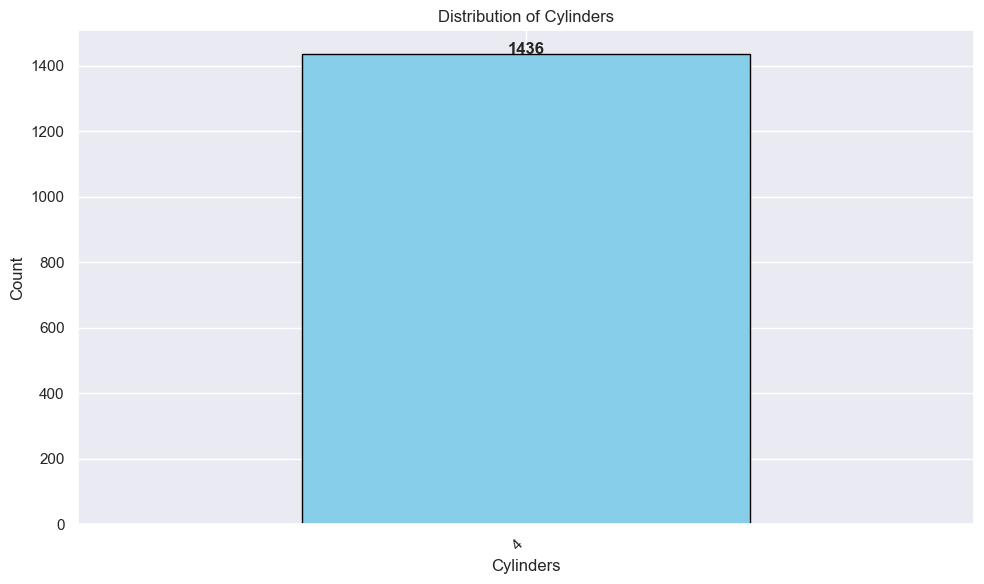

In [755]:
from utils import barplot_feature


barplot_feature(df, "Cylinders")

Id lo revisamos con un histograma


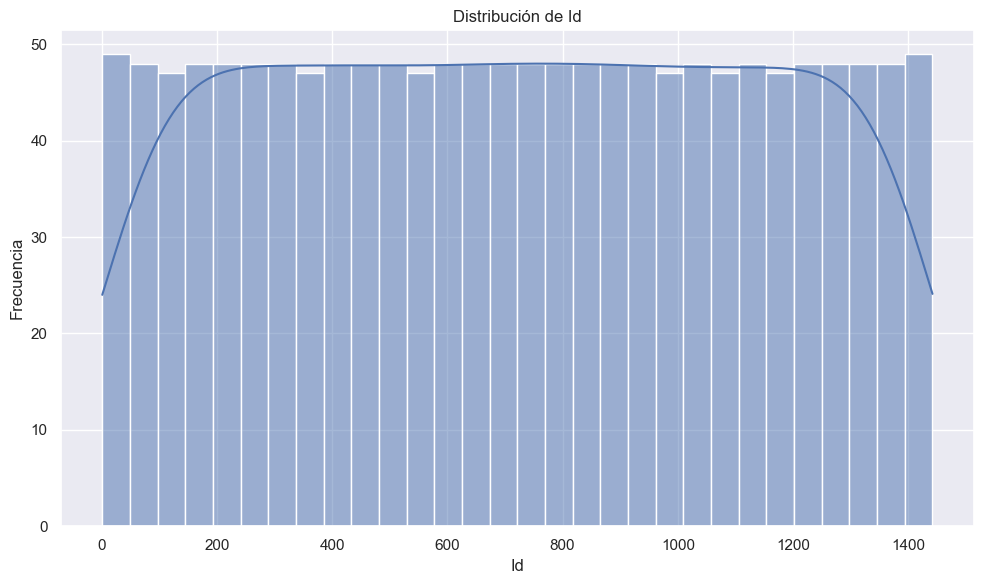

In [756]:
from utils import histogram_feature


histogram_feature(df, "Id")

Efectivamente, no nos sirven en absoluto


Las vamos sacando


In [757]:
df = df.drop(columns=["Id", "Cylinders"])

Veamos qué onda las columnas que son banderas


In [758]:
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)
print(bool_cols)

['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']


Son varias, no sabemos qué significan


Buscamos en internet qué onda esas features, encontramos esto:


1. **Id**
   Identificador único de cada vehículo en el dataset.

2. **Model**
   Versión o acabado del Toyota Corolla (por ejemplo, “Corolla D”, “Corolla GLi”).

3. **Price**
   Precio de venta del automóvil (en la unidad monetaria del dataset, p. ej., euros u otra).

4. **Age_08_04**
   Edad del coche, en años, referida al 4 de agosto de 2004 (fecha de corte utilizada para calcular antigüedad).

5. **Mfg_Month**
   Mes de fabricación del vehículo (1 = enero … 12 = diciembre).

6. **Mfg_Year**
   Año de fabricación del vehículo.

7. **KM**
   Kilometraje recorrido por el coche (en kilómetros).

8. **Fuel_Type**
   Tipo de combustible:

   - “Petrol” (gasolina)
   - “Diesel” (diésel)
   - “CNG” (gas natural comprimido)

9. **HP**
   Potencia del motor en caballos de fuerza (Horse Power).

10. **Met_Color**
    Indicador de pintura metálica (1 = sí, 0 = no).

11. **Automatic**
    Tipo de transmisión (1 = automática, 0 = manual).

12. **cc**
    Cilindrada del motor en centímetros cúbicos (cm³).

13. **Doors**
    Número de puertas del vehículo.

14. **Cylinders**
    Número de cilindros del motor.

15. **Gears**
    Número de marchas de la transmisión.

16. **Quarterly_Tax**
    Importe del impuesto de circulación o matriculación que se paga trimestralmente (en la misma unidad monetaria que Price).

17. **Weight**
    Peso del vehículo en kilogramos.

18. **Mfr_Guarantee**
    Garantía del fabricante (1 = incluida, 0 = no incluida).

19. **BOVAG_Guarantee**
    Garantía ofrecida por BOVAG (asociación neerlandesa de concesionarios) (1 = incluida, 0 = no).

20. **Guarantee_Period**
    Duración de la garantía (en años).

21. **ABS**
    Sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no).

22. **Airbag_1**
    Airbag para el conductor (1 = sí, 0 = no).

23. **Airbag_2**
    Airbag para el pasajero delantero (1 = sí, 0 = no).

24. **Airco**
    Aire acondicionado (1 = sí, 0 = no).

25. **Automatic_airco**
    Control automático de la temperatura (climatizador) (1 = sí, 0 = no).

26. **Boardcomputer**
    Ordenador de a bordo (display con información de viaje, consumo, etc.) (1 = sí, 0 = no).

27. **CD_Player**
    Reproductor de CD (1 = sí, 0 = no).

28. **Central_Lock**
    Cierre centralizado de puertas (1 = sí, 0 = no).

29. **Powered_Windows**
    Elevalunas eléctricos (1 = sí, 0 = no).

30. **Power_Steering**
    Dirección asistida (1 = sí, 0 = no).

31. **Radio**
    Radio estándar (1 = sí, 0 = no).

32. **Mistlamps**
    Faros antiniebla (1 = sí, 0 = no).

33. **Sport_Model**
    Edición deportiva del modelo (1 = sí, 0 = no).

34. **Backseat_Divider**
    Separador o consola entre asientos traseros (1 = sí, 0 = no).

35. **Metallic_Rim**
    Llantas de aleación metálica (1 = sí, 0 = no).

36. **Radio_cassette**
    Radio con reproductor de casete (1 = sí, 0 = no).

37. **Tow_Bar**
    Enganche de remolque o bola de remolque (1 = sí, 0 = no).


Veamos qué peso tienen sobre la variable objetivo, podemos hacer una matriz de correlación solamente de las banderas, a ver si son importantes


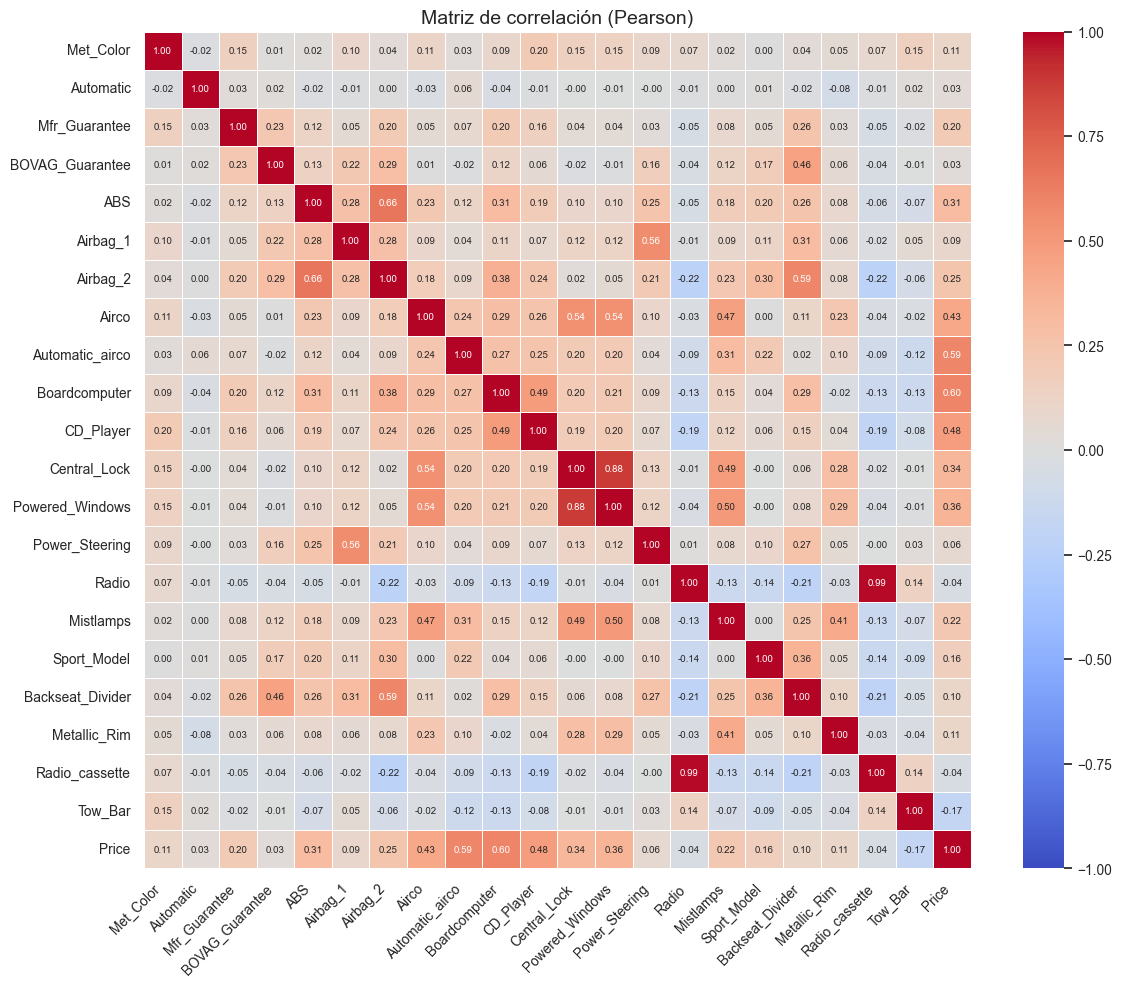

In [759]:
from utils import show_correlation_matrix


matrix = show_correlation_matrix(df[bool_cols + ["Price"]])

Lo primero que llama la atención es la correlación tan fuerte que existe entre radio y radio_cassette. Tiene sentido. Nos podemos quedar con una nomás, ambas tienen el mismo peso sobre Price.


In [760]:
# Contar filas donde Radio y Radio_cassette difieren
diferentes = (df["Radio"] != df["Radio_cassette"]).sum()
print(f"Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': {diferentes}")
print(f"Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': {len(df) - diferentes}")

Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': 3
Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': 1433


Prácticamente siempre que hay radio hay radio cassette, borramos una


In [761]:
df = df.drop(columns=["Radio_cassette"])

Siguen habiendo otras correlaciones más débiles, capaz vale la pena tratarlas.


Seguimos mirando las variables


In [762]:
df.describe().T

count          mean           std     min      25%  \
Price             1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04         1436.0     55.947075     18.599988     1.0     44.0   
Mfg_Month         1436.0      5.548747      3.354085     1.0      3.0   
Mfg_Year          1436.0   1999.625348      1.540722  1998.0   1998.0   
KM                1436.0  68533.259749  37506.448872     1.0  43000.0   
HP                1436.0    101.502089     14.981080    69.0     90.0   
Met_Color         1436.0      0.674791      0.468616     0.0      0.0   
Automatic         1436.0      0.055710      0.229441     0.0      0.0   
cc                1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors             1436.0      4.033426      0.952677     2.0      3.0   
Gears             1436.0      5.026462      0.188510     3.0      5.0   
Quarterly_Tax     1436.0     87.122563     41.128611    19.0     69.0   
Weight            1436.0   1072.459610     52.641120  1000.0   1040.0   
Mfr_Guarantee     1436.0      0.409471      0.491907     0.0      0.0   
BOVAG_Guarantee   1436.0      0.895543      0.305959     0.0      1.0   
Guarantee_Period  1436.0      3.815460      3.011025     3.0      3.0   
ABS               1436.0      0.813370      0.389750     0.0      1.0   
Airbag_1          1436.0      0.970752      0.168559     0.0      1.0   
Airbag_2          1436.0      0.722841      0.447751     0.0      0.0   
Airco             1436.0      0.508357      0.500104     0.0      0.0   
Automatic_airco   1436.0      0.056407      0.230786     0.0      0.0   
Boardcomputer     1436.0      0.294568      0.456007     0.0      0.0   
CD_Player         1436.0      0.218663      0.413483     0.0      0.0   
Central_Lock      1436.0      0.580084      0.493717     0.0      0.0   
Powered_Windows   1436.0      0.561978      0.496317     0.0      0.0   
Power_Steering    1436.0      0.977716      0.147657     0.0      1.0   
Radio             1436.0      0.146240      0.353469     0.0      0.0   
Mistlamps         1436.0      0.256964      0.437111     0.0      0.0   
Sport_Model       1436.0      0.300139      0.458478     0.0      0.0   
Backseat_Divider  1436.0      0.770195      0.420854     0.0      1.0   
Metallic_Rim      1436.0      0.204735      0.403649     0.0      0.0   
Tow_Bar           1436.0      0.277855      0.448098     0.0      0.0   

                      50%       75%       max  
Price              9900.0  11950.00   32500.0  
Age_08_04            61.0     70.00      80.0  
Mfg_Month             5.0      8.00      12.0  
Mfg_Year           1999.0   2001.00    2004.0  
KM                63389.5  87020.75  243000.0  
HP                  110.0    110.00     192.0  
Met_Color             1.0      1.00       1.0  
Automatic             0.0      0.00       1.0  
cc                 1600.0   1600.00   16000.0  
Doors                 4.0      5.00       5.0  
Gears                 5.0      5.00       6.0  
Quarterly_Tax        85.0     85.00     283.0  
Weight             1070.0   1085.00    1615.0  
Mfr_Guarantee         0.0      1.00       1.0  
BOVAG_Guarantee       1.0      1.00       1.0  
Guarantee_Period      3.0      3.00      36.0  
ABS                   1.0      1.00       1.0  
Airbag_1              1.0      1.00       1.0  
Airbag_2              1.0      1.00       1.0  
Airco                 1.0      1.00       1.0  
Automatic_airco       0.0      0.00       1.0  
Boardcomputer         0.0      1.00       1.0  
CD_Player             0.0      0.00       1.0  
Central_Lock          1.0      1.00       1.0  
Powered_Windows       1.0      1.00       1.0  
Power_Steering        1.0      1.00       1.0  
Radio                 0.0      0.00       1.0  
Mistlamps             0.0      1.00       1.0  
Sport_Model           0.0      1.00       1.0  
Backseat_Divider      1.0      1.00       1.0  
Metallic_Rim          0.0      0.00       1.0  
Tow_Bar               0.0      1.00       1.0

El mes de manufactura no debería servir así como está planteado, lo verificamos:


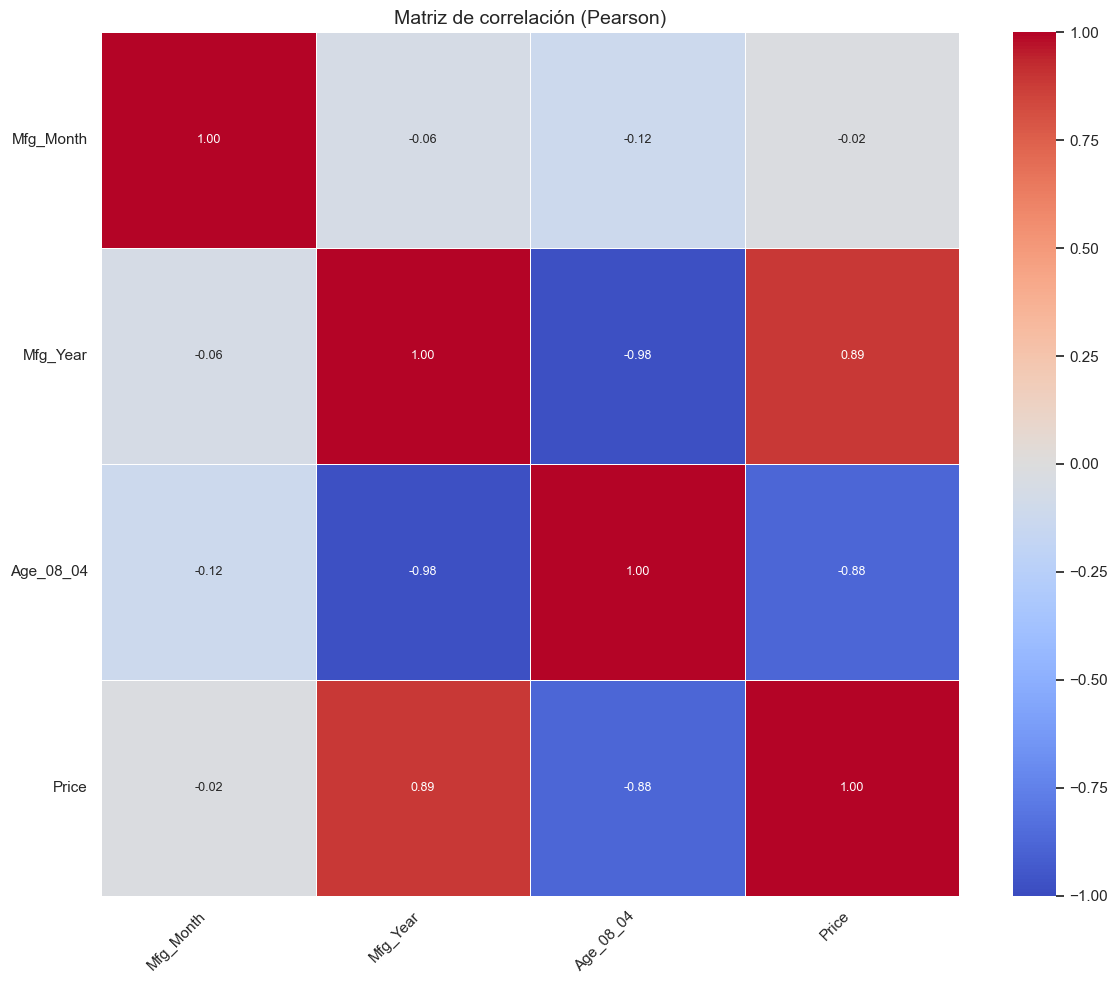

In [763]:
matrix = show_correlation_matrix(df[["Mfg_Month", "Mfg_Year", "Age_08_04", "Price"]])

Como sospechábamos, el mes por sí solo no tiene ningún peso sobre el precio. Y columnas como año y edad son mucho más importantes. Nos deshacemos de la columna mes, no hay nada que rescatarle.


In [764]:
df = df.drop(columns=["Mfg_Month"])

Vamos explorando otro lado, veamos lo de automatic


Empezamos con un histograma, para ver cómo está distribuida esta clase


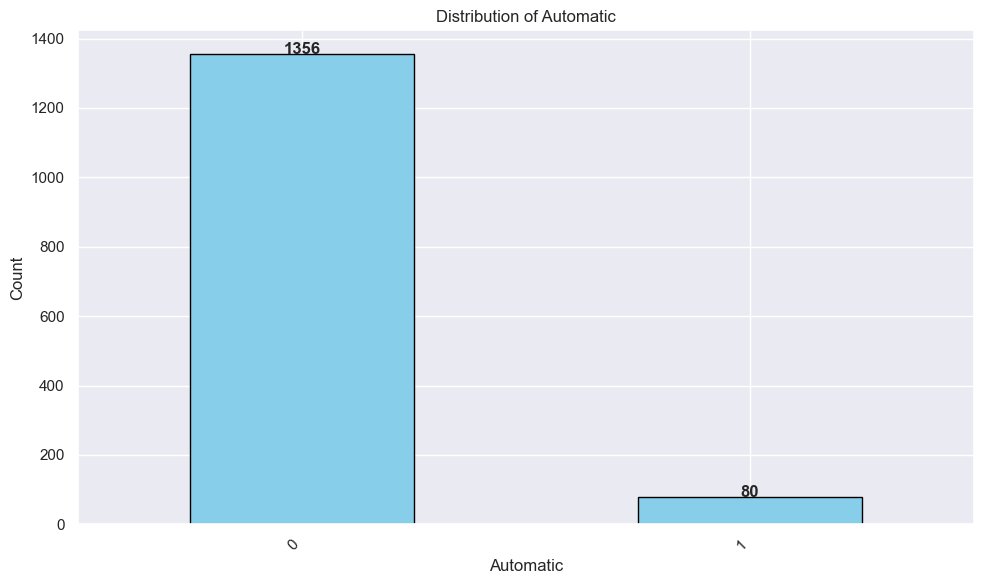

In [765]:
barplot_feature(df, "Automatic")

In [766]:
# Calcular porcentaje de filas con Automatic igual a 1 (True) y 0 (False)
total = len(df)
pct_true = (df["Automatic"] == 1).sum() / total * 100
pct_false = (df["Automatic"] == 0).sum() / total * 100

print(f"Porcentaje con Automatic=True: {pct_true:.2f}%")
print(f"Porcentaje con Automatic=False: {pct_false:.2f}%")

Porcentaje con Automatic=True: 5.57%
Porcentaje con Automatic=False: 94.43%


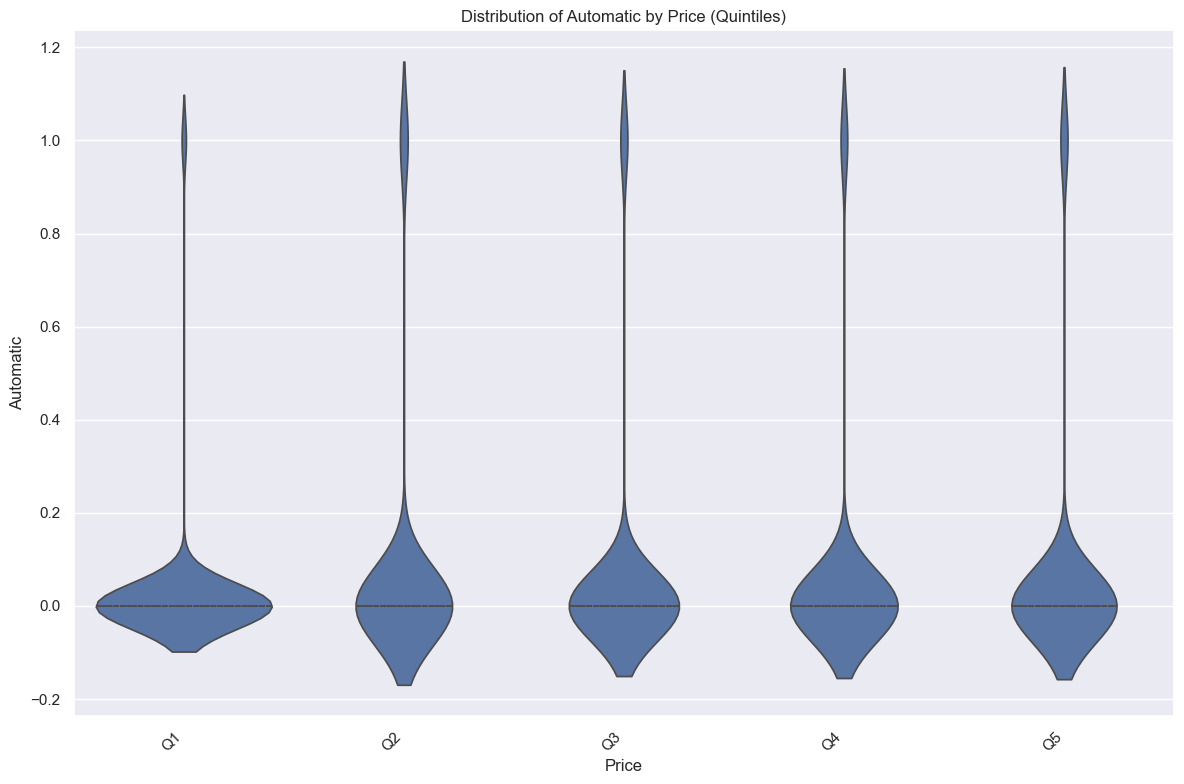

In [767]:
from utils import scatter_feature, violinplot_feature


violinplot_feature(df, "Automatic")

Veamos de qué año son los automáticos, capaz por edad valen menos


In [768]:
precio_promedio_automaticos = df[df["Automatic"] == 1].groupby("Mfg_Year")["Price"].mean().sort_index()
precio_promedio_no_automaticos = df[df["Automatic"] == 0].groupby("Mfg_Year")["Price"].mean().sort_index()
precios_promedio = pd.DataFrame({
    "Automático": precio_promedio_automaticos,
    "Manual": precio_promedio_no_automaticos
})

print(precios_promedio)

            Automático        Manual
Mfg_Year                            
1998       8553.571429   7877.260989
1999      10020.961538   9295.638554
2000      11898.571429  10690.866972
2001      13029.375000  12242.173913
2002      18133.333333  16890.543210
2003      20320.000000  18562.828571
2004               NaN  22324.166667


Bueno, algo de influencia se ve, alrededor de mil dólares más.


Pero la clase está muy desbalanceada, veremos más adelante si vale la pena rescatar esta feature.


Y por el violin plot podemos ver que en todos los quintiles de precio siguen siendo mayoría los autos manuales (Automatic=0), no le encontramos valor sifnificativo a la variable Automatic. Echamos un último vistazo a la matriz de correlación que hicimos arriba.


In [769]:
df = df.drop(columns=["Automatic"])

Aquí queremos ver si existen features que sean iguales entre sí, es decir si tienen todas el mismo valor 1 al mismo tiempo, y ver si se puede crear otra feature a partir de ellas


In [770]:
from collections import defaultdict

# Calculamos bools cols devuelta porque ya borramos cosas antes
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)

groups = defaultdict(list)
for col in bool_cols:
    key = tuple(df[col].fillna(-1))
    groups[key].append(col)

duplicate_groups = [cols for cols in groups.values() if len(cols) > 1]

if duplicate_groups:
    print("Las siguientes columnas binarias son idénticas en todas las filas:")
    for group in duplicate_groups:
        print("  -", ", ".join(group))
else:
    print("No se encontraron columnas binarias idénticas entre sí.")

No se encontraron columnas binarias idénticas entre sí.


Bueno a primera vista no hay observaciones con todas las banderas con el mismo valor, más adelante vamos a seguir viendo esto.


Le peguemos un vistazo a met_color a ver en qué consiste


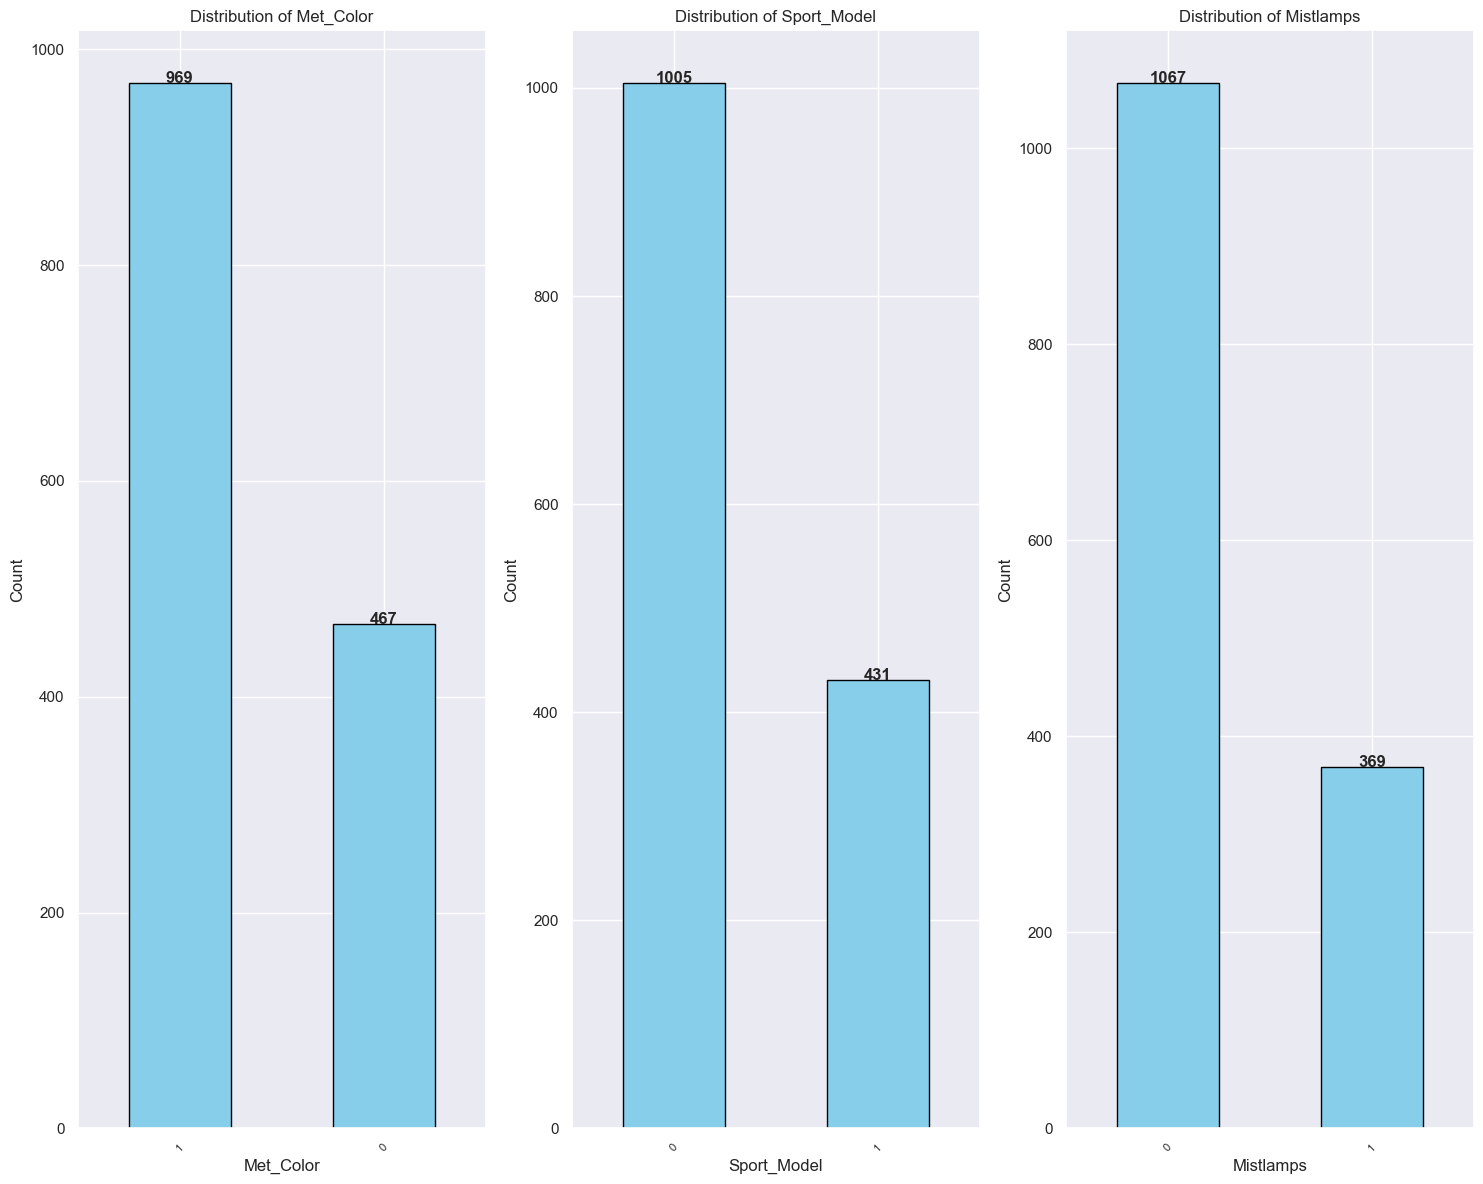

In [771]:
from utils import barplot_features_batch, histogram_by_batch


cols = ["Met_Color", "Sport_Model", "Mistlamps"]

barplot_features_batch(df, cols)

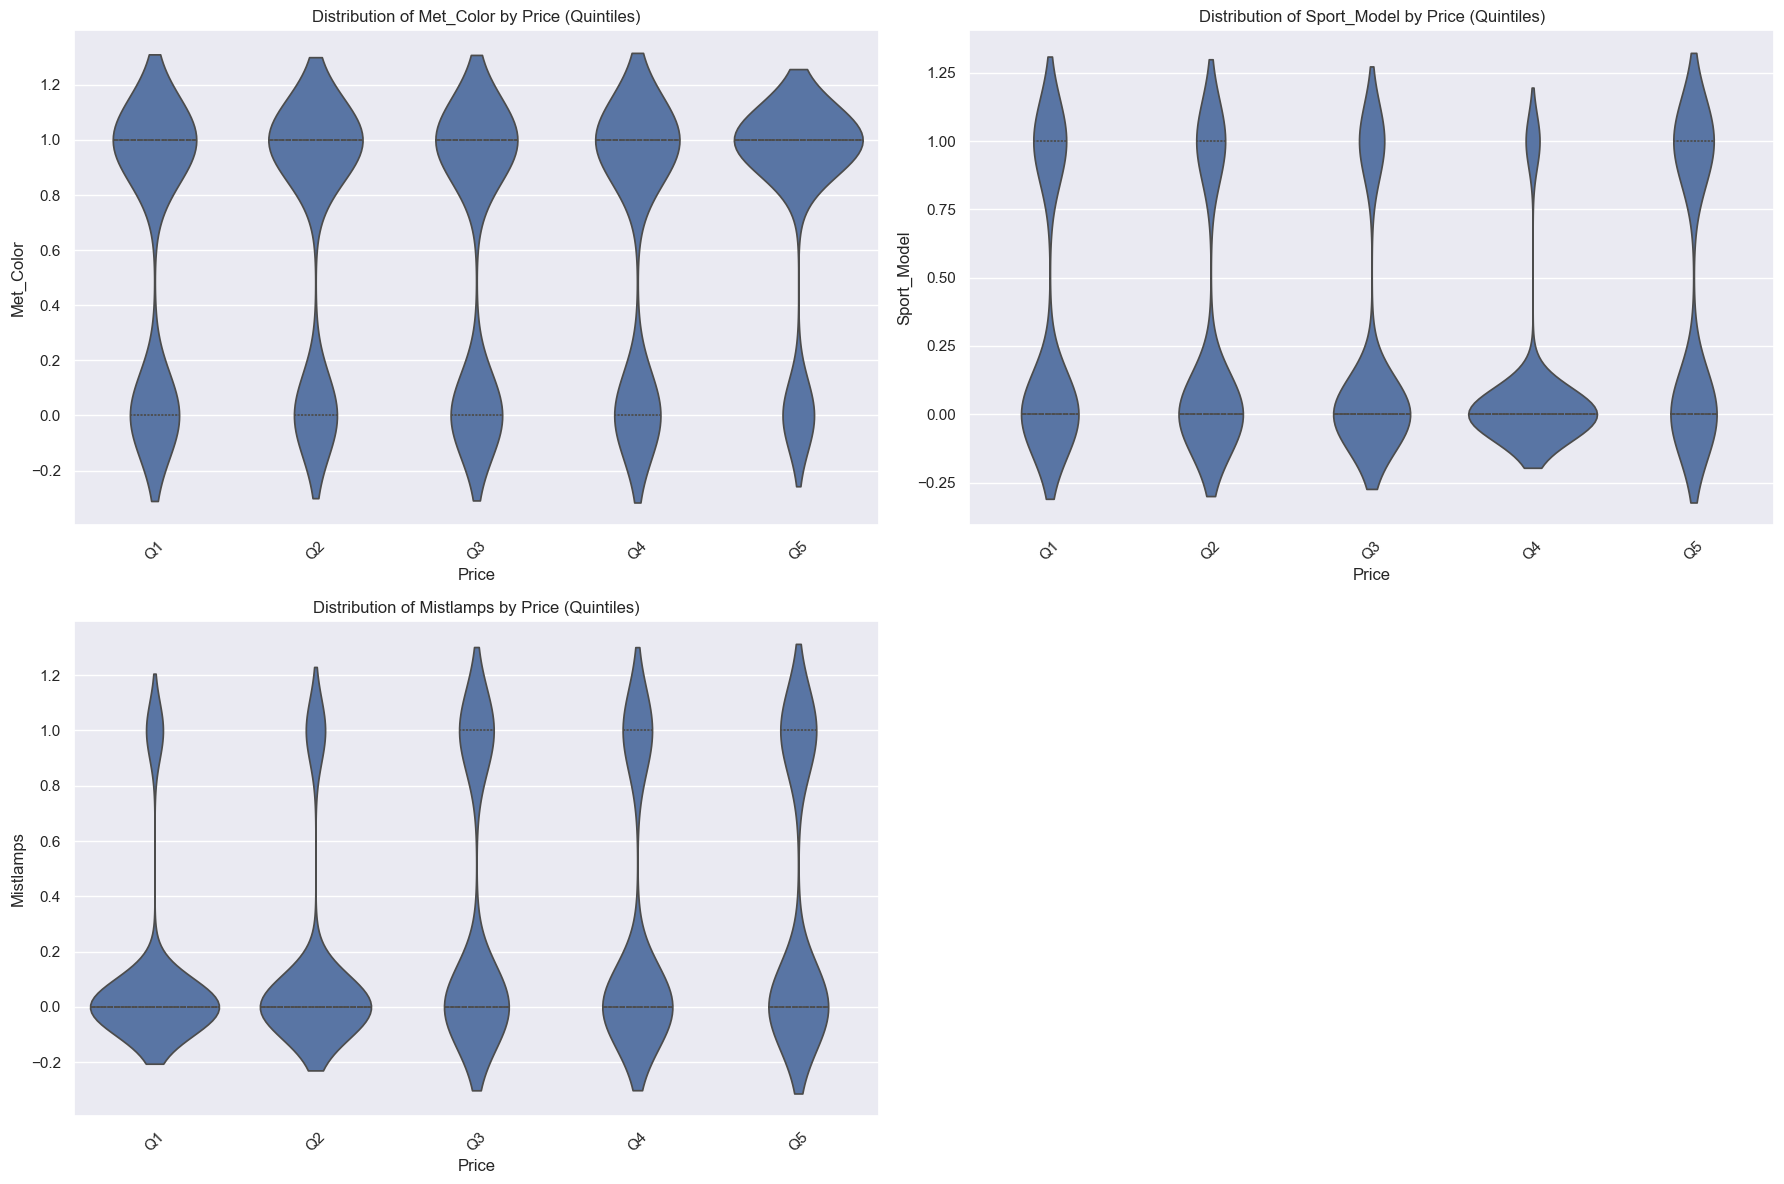

In [772]:
from utils import violinplot_features_batch


violinplot_features_batch(df, cols)

La variable Year tenía apenas más correlación con el precio que Age en meses, pensamos en armar un age expresado en años para tener esa mayor correlación y reducir la escala de ese dato


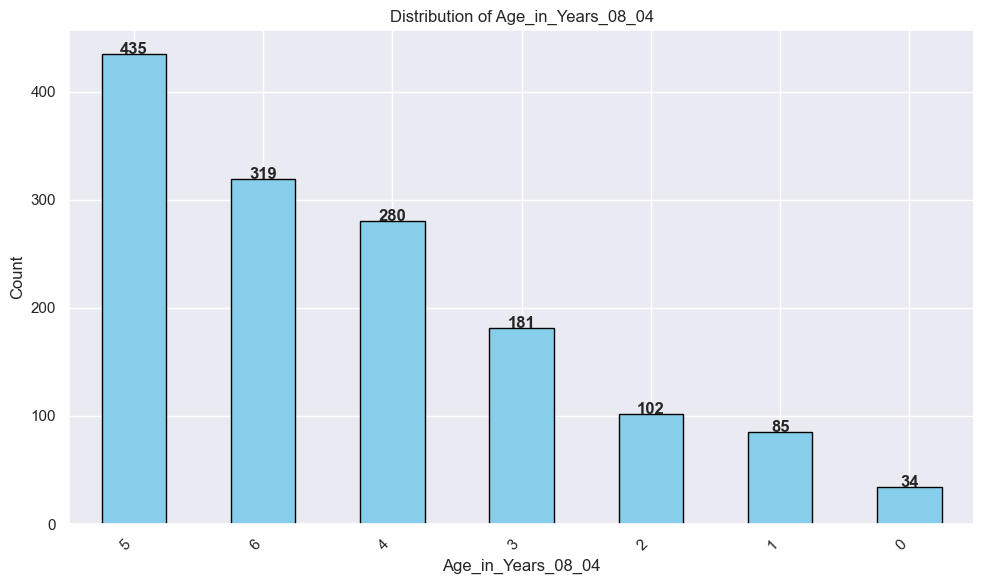

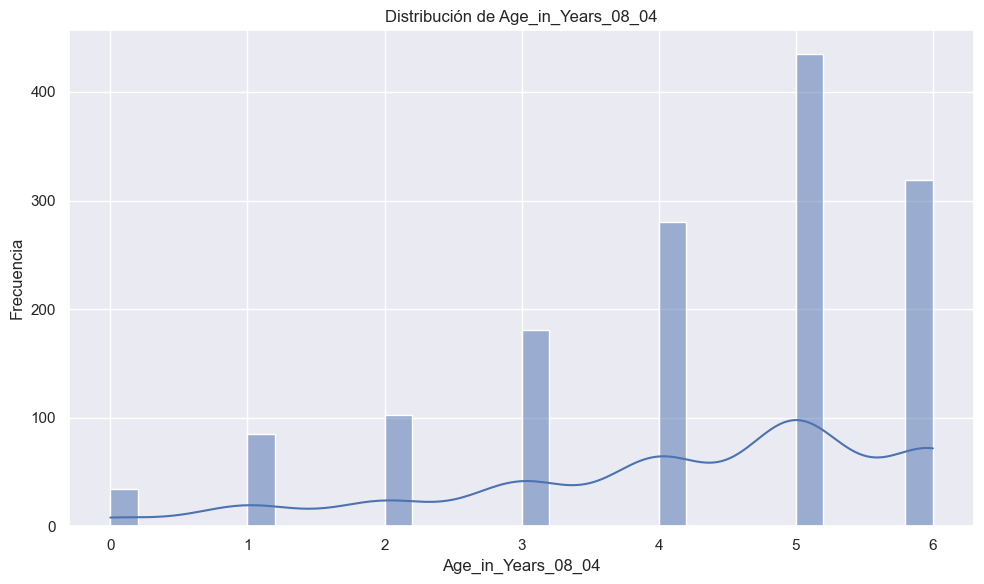

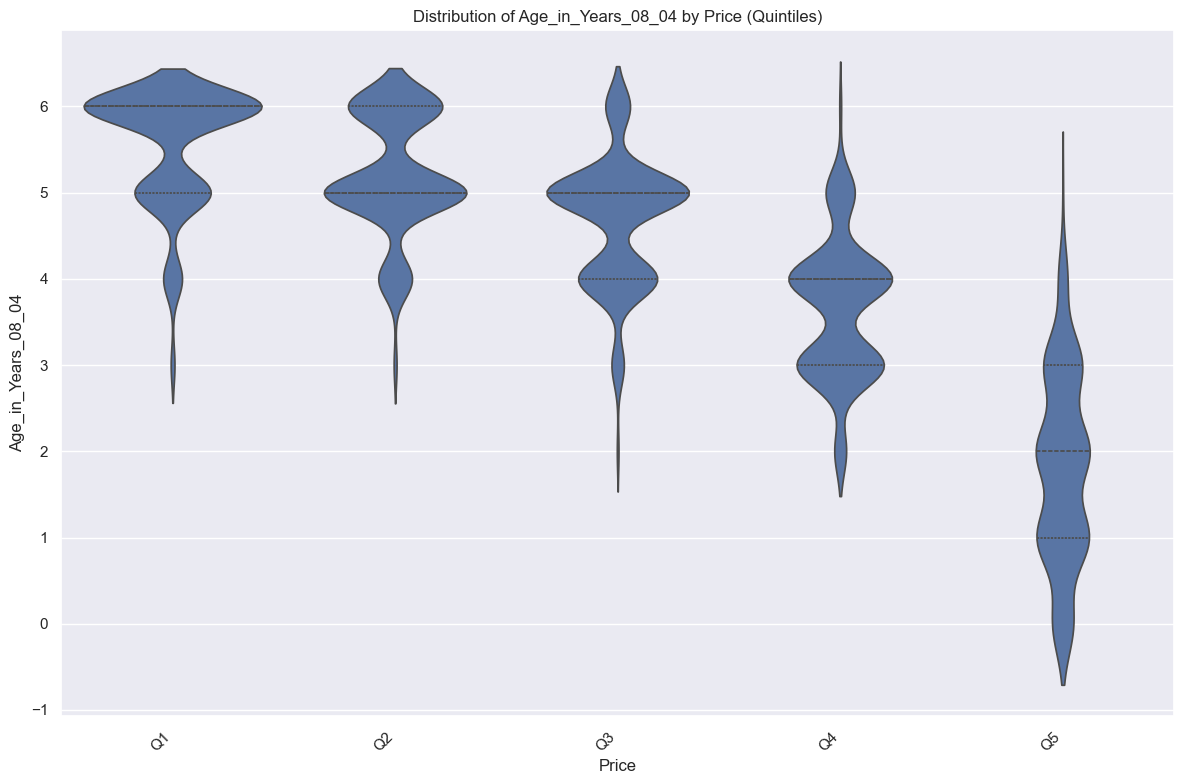

In [773]:
df["Age_in_Years_08_04"] = (df["Age_08_04"] / 12).astype(int)
barplot_feature(df, "Age_in_Years_08_04")
histogram_feature(df, "Age_in_Years_08_04")
violinplot_feature(df, "Age_in_Years_08_04")

Si vemos el scatter de price y age


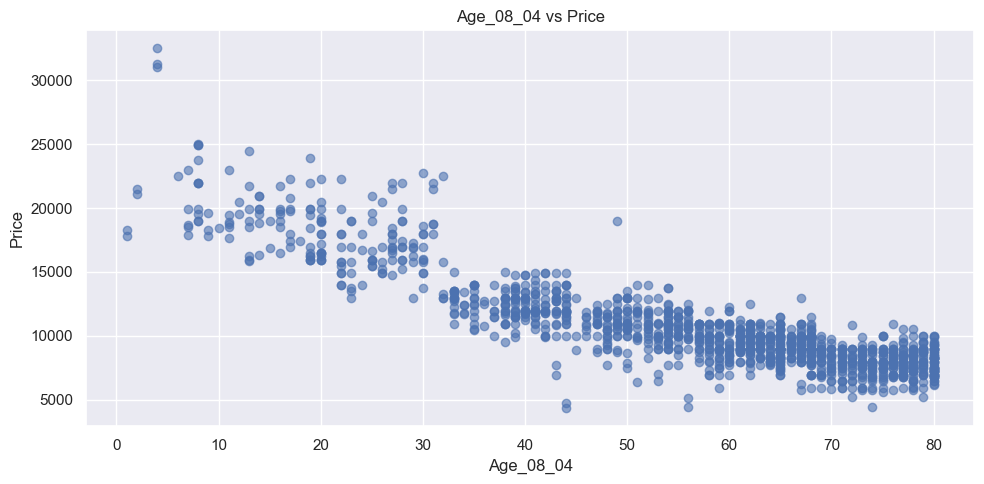

In [774]:
scatter_feature(df, "Age_08_04", "Price")

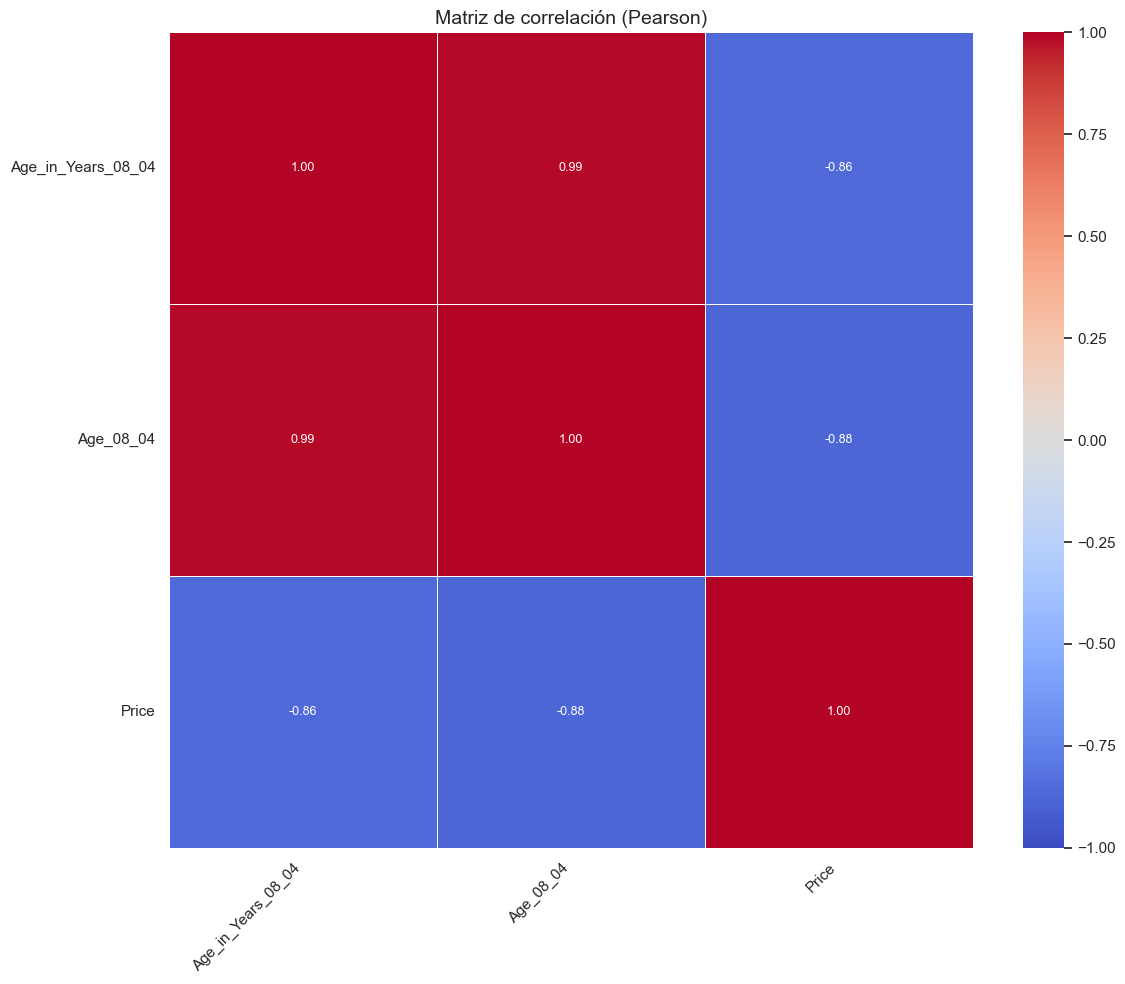

In [775]:
matrix = show_correlation_matrix(df[["Age_in_Years_08_04", "Age_08_04", "Price"]])

Sigue teniendo más correlación Age en meses


De momento descartamos esto de expresar age de otra forma


Las columnas binarias son muchas, y no agregan mucho valor por sí solas


In [776]:
bool_cols

['Met_Color',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Tow_Bar']

Veamos la correlación que tiene cada una


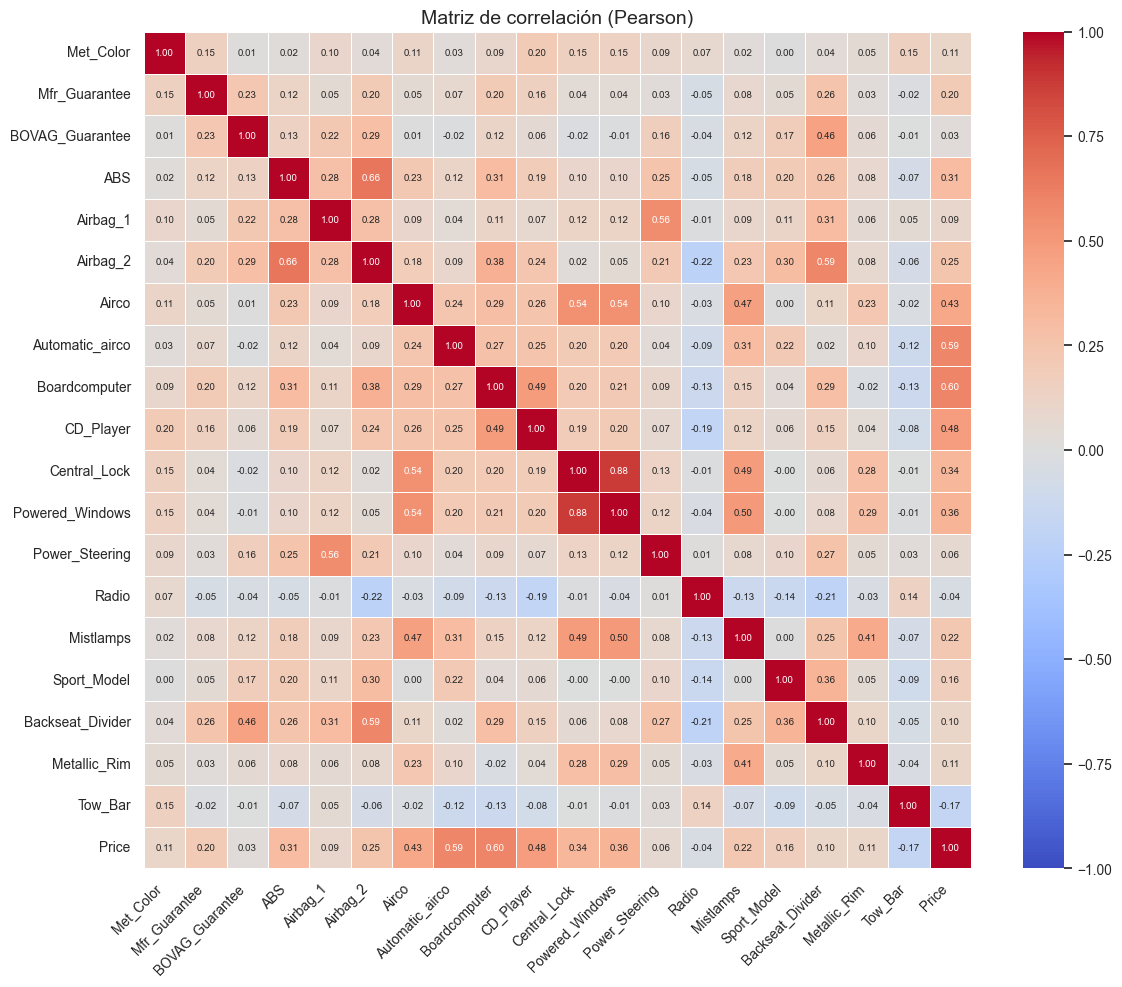

In [777]:
matrix = show_correlation_matrix(df[bool_cols + ["Price"]])

De todas esas boolenas, algunas podemos considerarlas como equipamiento


In [778]:
equipment_cols = [
    "ABS",
    "Airbag_1",
    "Airbag_2",
    "Airco",
    "Automatic_airco",
    "Boardcomputer",
    "CD_Player",
    "Central_Lock",
    "Powered_Windows",
    "Power_Steering",
    "Radio",
    "Mistlamps",
    "Backseat_Divider",
    "Tow_Bar",
]

Vemos qué tal están distribuidas estas variables


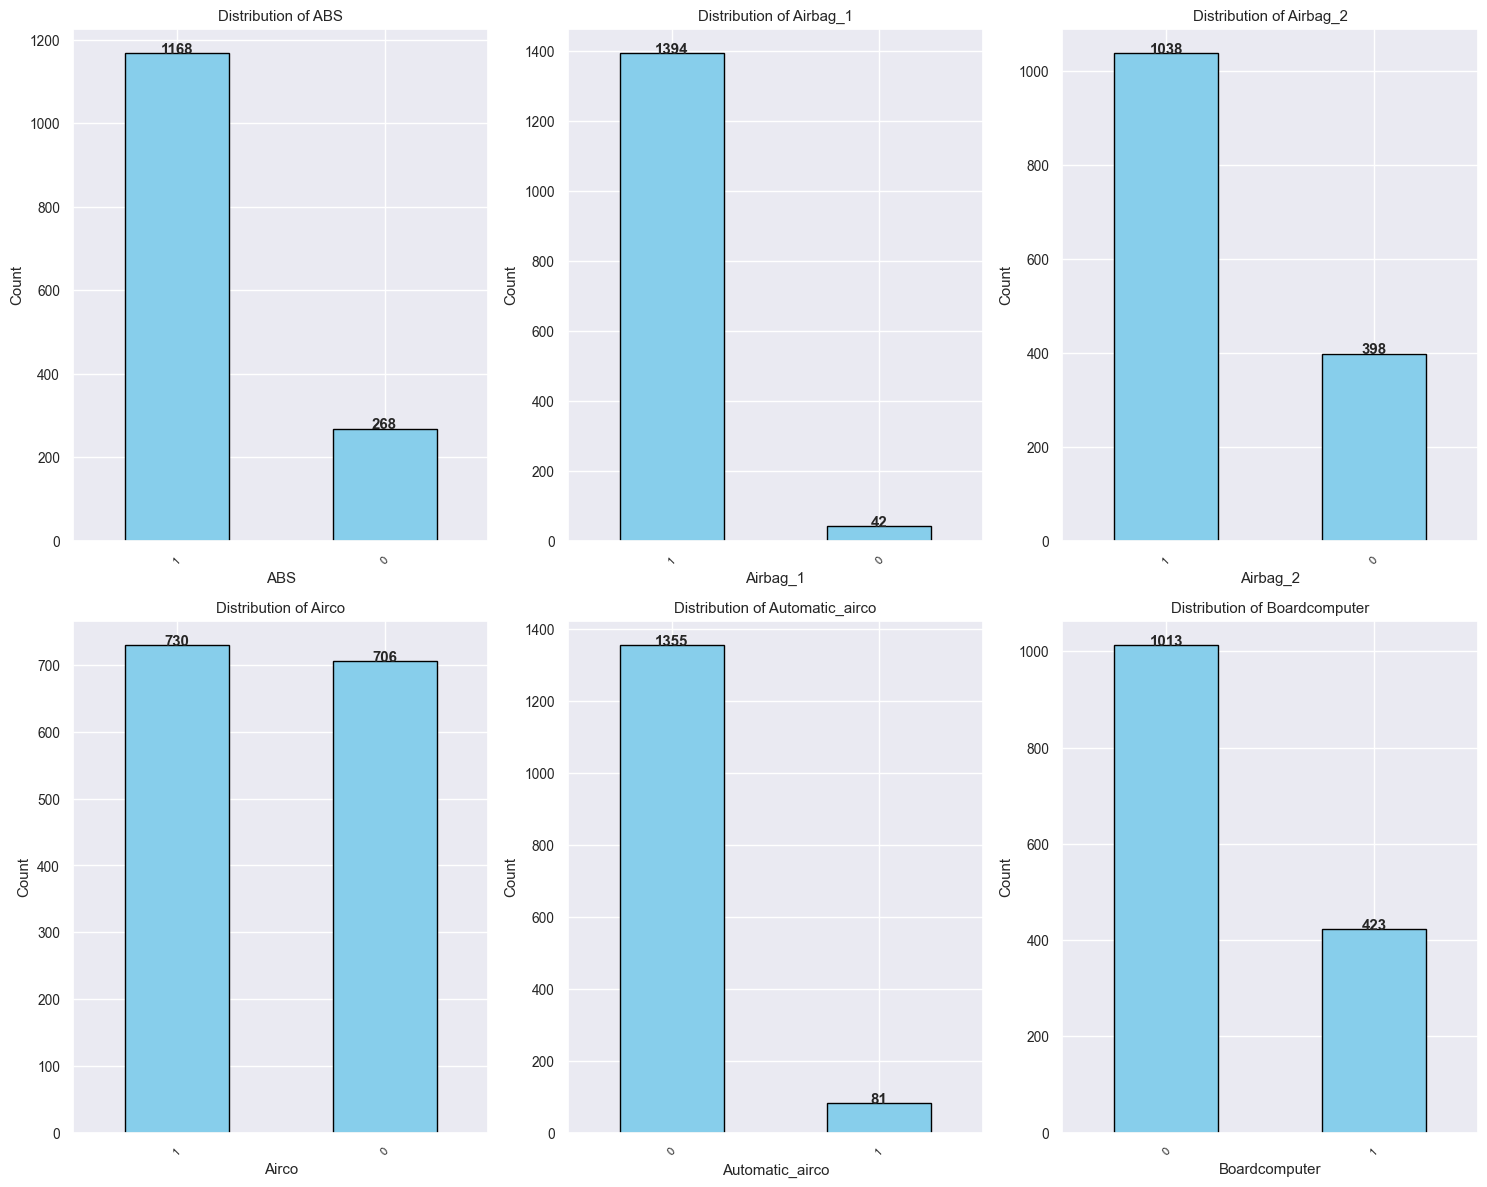

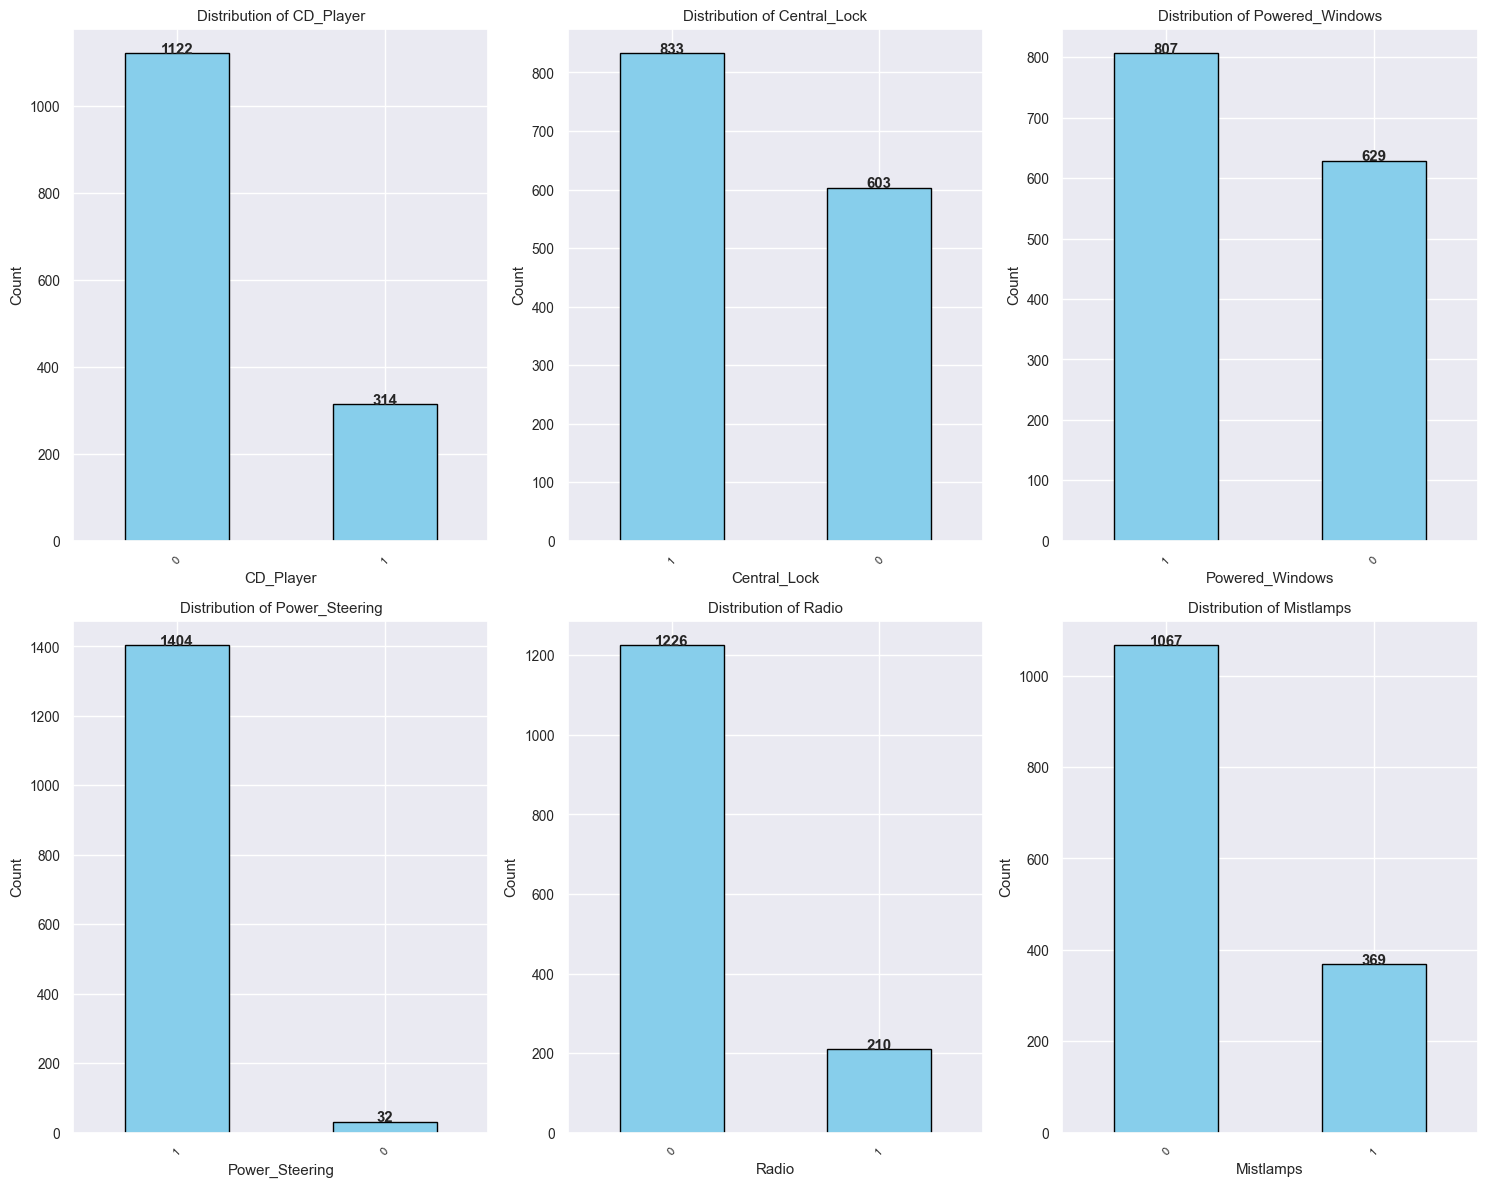

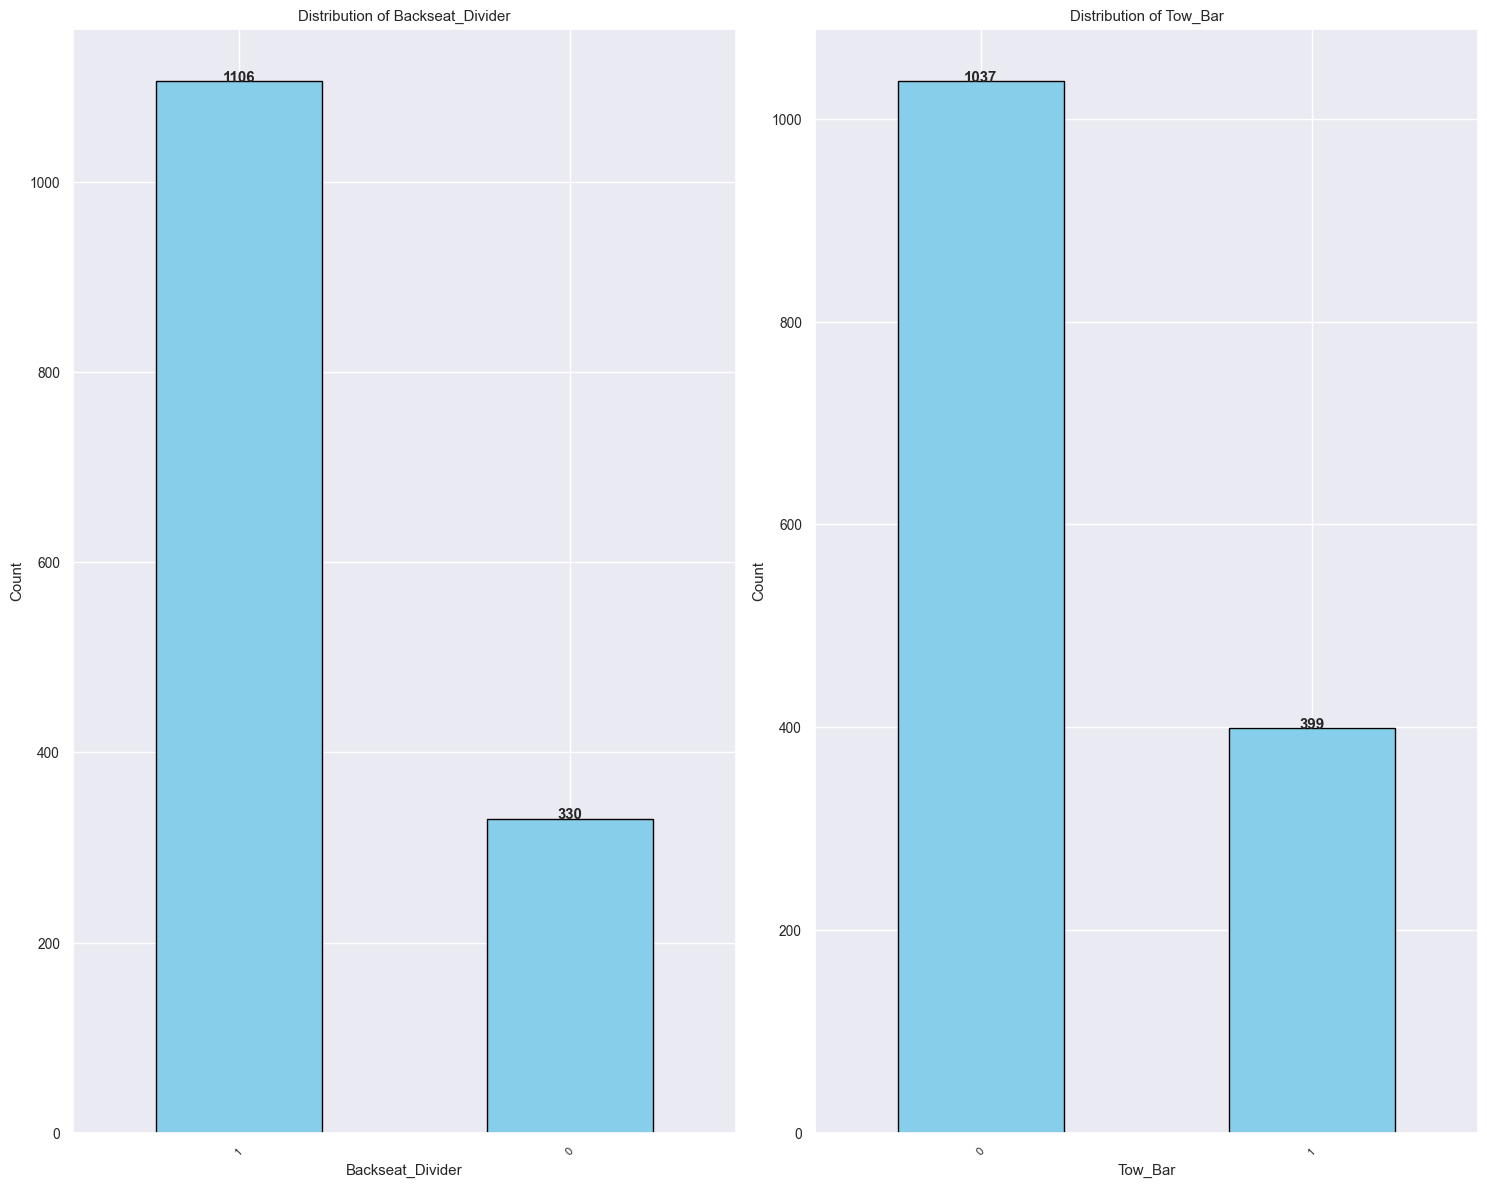

In [779]:
barplot_features_batch(df, equipment_cols)

Esto es el primer experimento, probamos hacer la suma ponderada de las ocurrencias de los equipamientos con su correlación con la variable objetivo.


In [780]:
correlations = df[equipment_cols + ["Price"]].corr()["Price"].abs().drop("Price")
weights = correlations / correlations.sum()
df["Equipment_Score"] = df[equipment_cols].mul(weights).sum(axis=1)

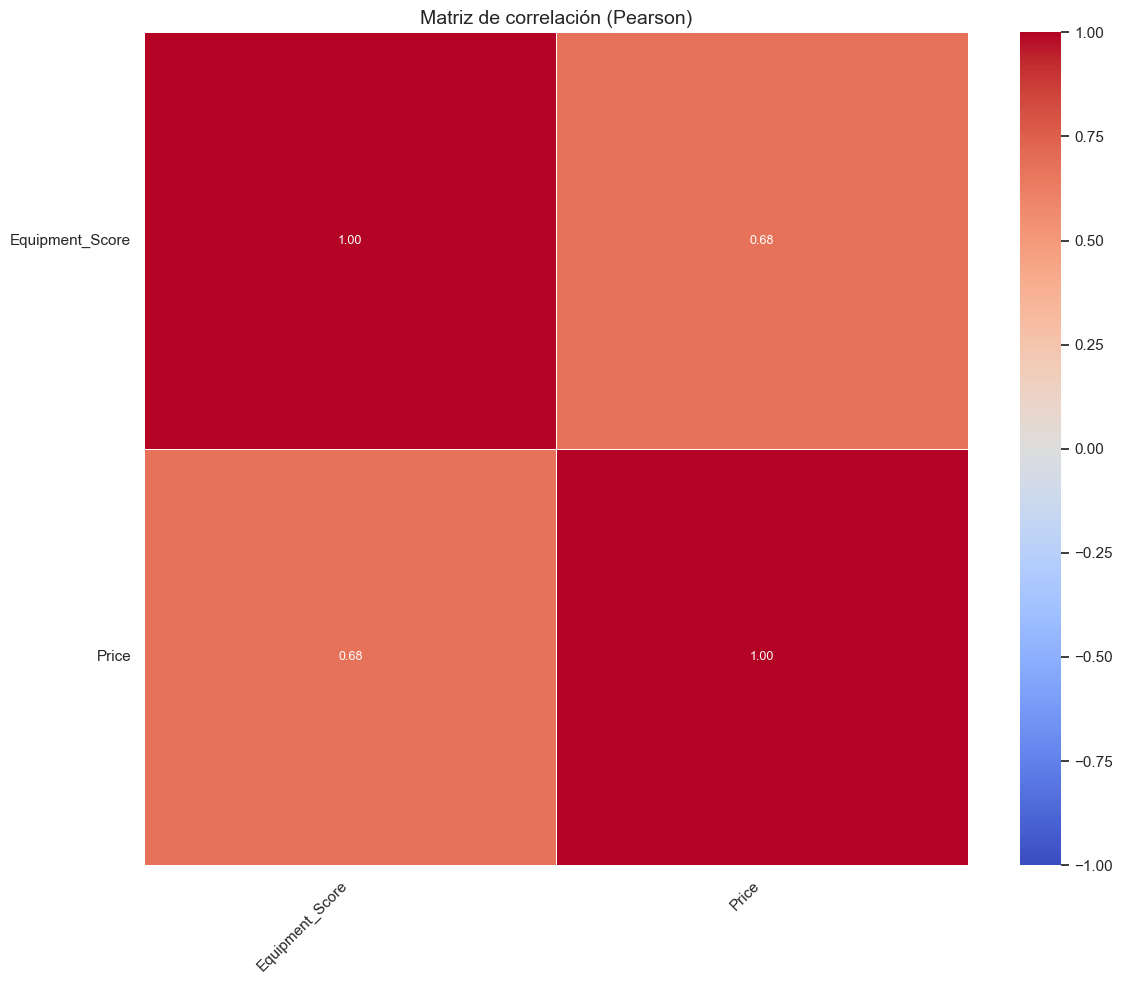

In [781]:
matrix = show_correlation_matrix(df[["Equipment_Score", "Price"]])

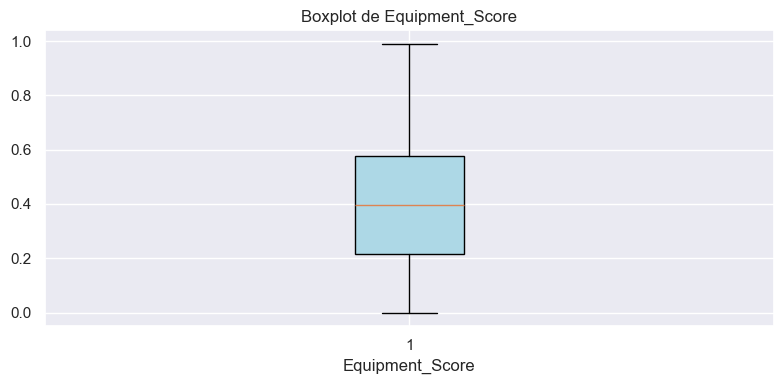

In [782]:
from utils import boxplot_feature


boxplot_feature(df, "Equipment_Score")

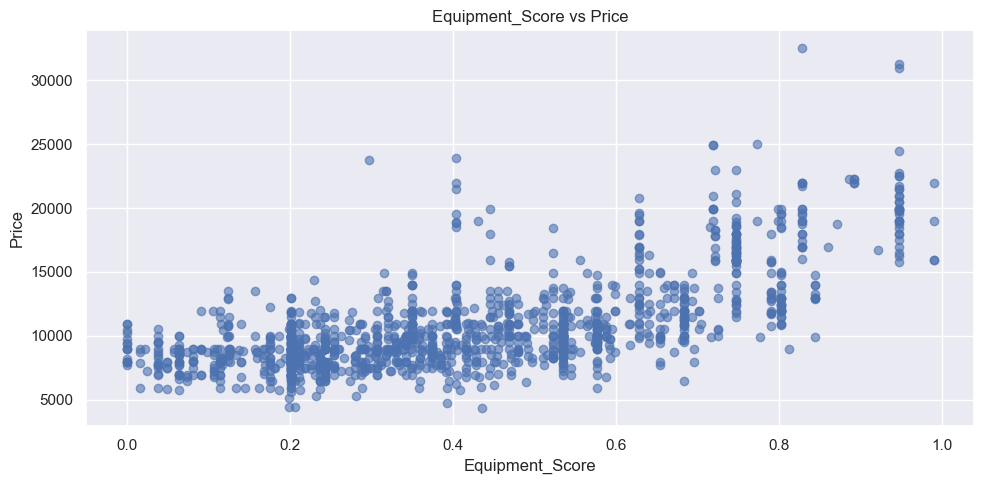

In [783]:
scatter_feature(df, "Equipment_Score")

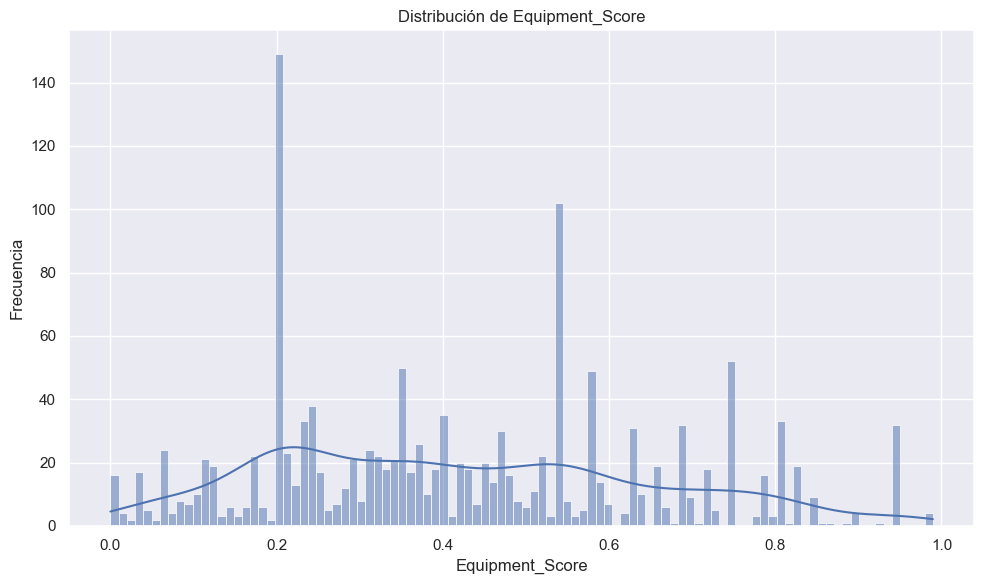

In [784]:
histogram_feature(df, "Equipment_Score", bins=100)

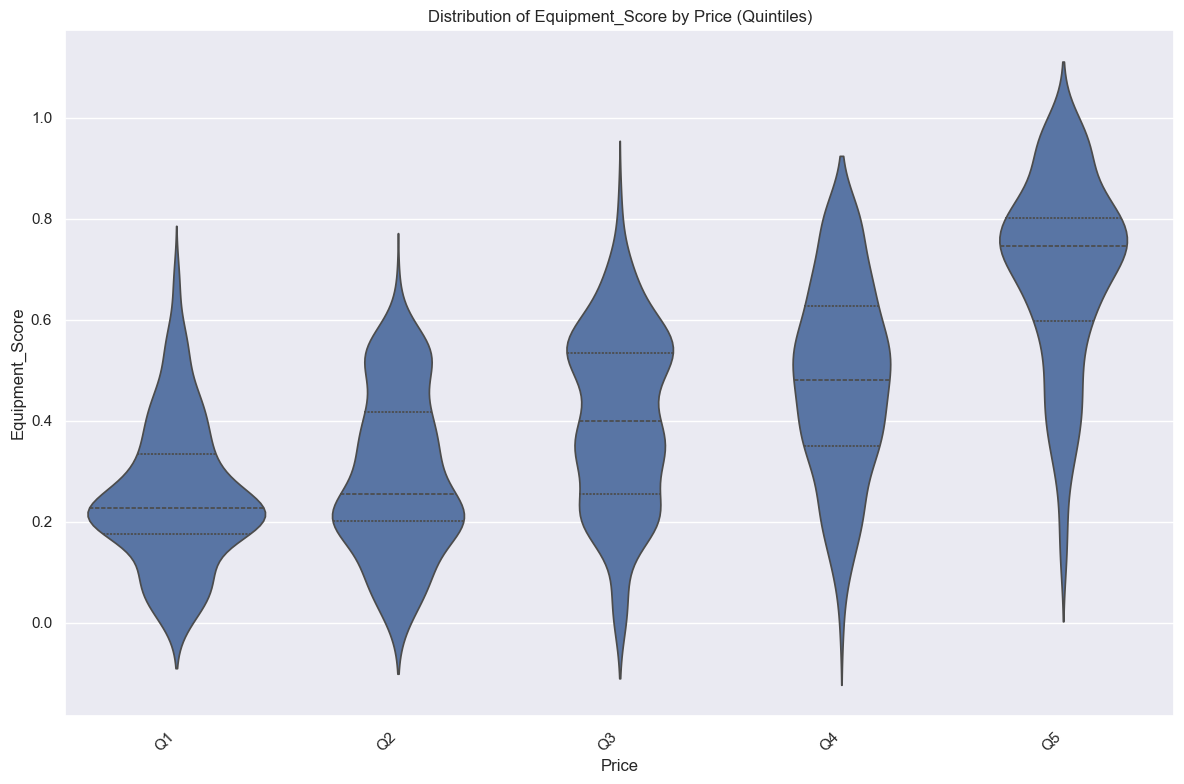

In [785]:
violinplot_feature(df, "Equipment_Score")

Tratamos de crear otra feature, una que directamente cuente los equipamientos


<Axes: >

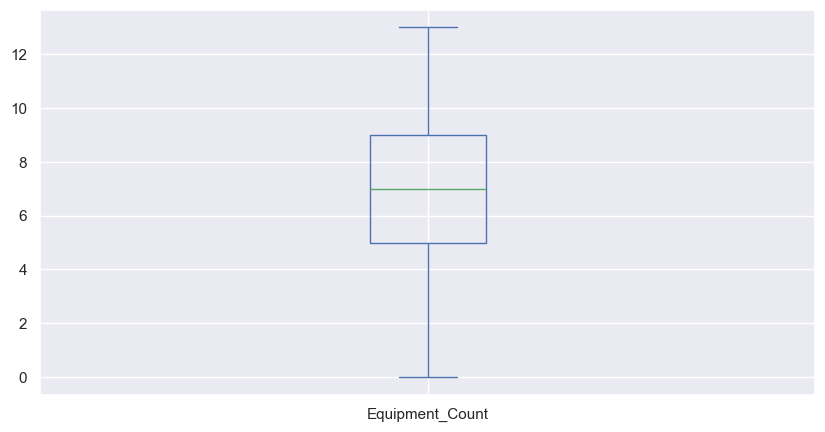

In [786]:
df["Equipment_Count"] = df[equipment_cols].sum(axis=1)
df["Equipment_Count"].plot(kind="box", figsize=(10, 5))

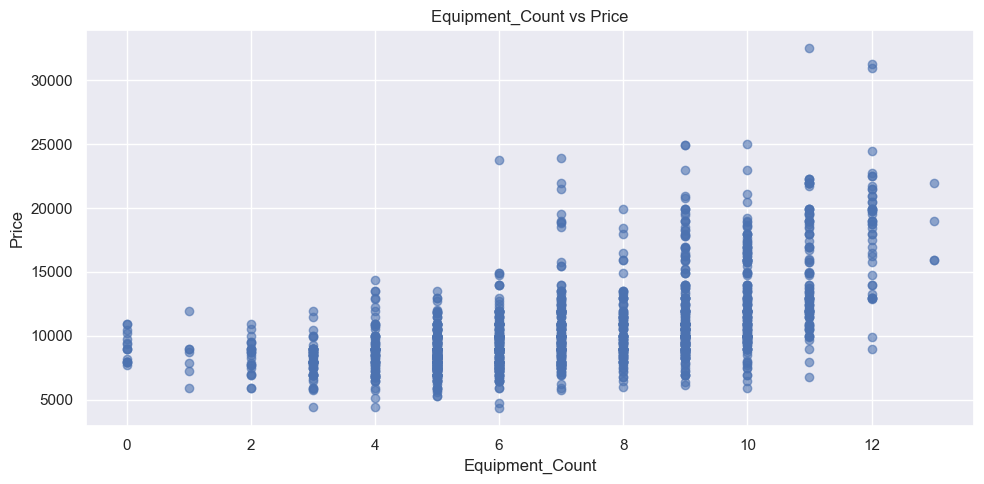

In [787]:
scatter_feature(df, "Equipment_Count")

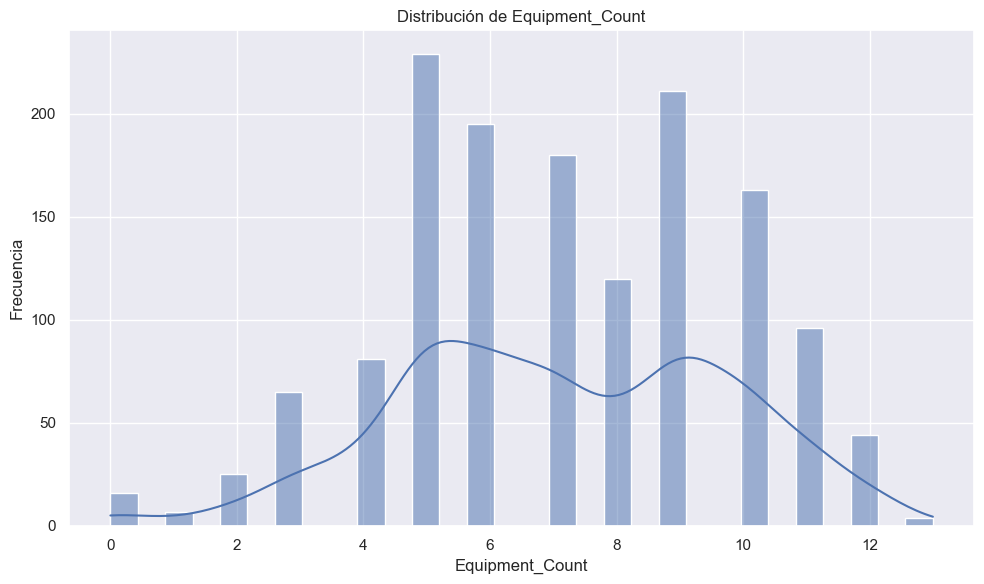

In [788]:
histogram_feature(df, "Equipment_Count")

Probemos otra cosa, una feature que se fija si el auto tiene equipamiento premium. Del conocimiento del dominio, equipamiento premium sería climatizador, computadora a bordo


In [789]:
df["Premium_Equipment"] = df["Automatic_airco"] | df["Boardcomputer"]

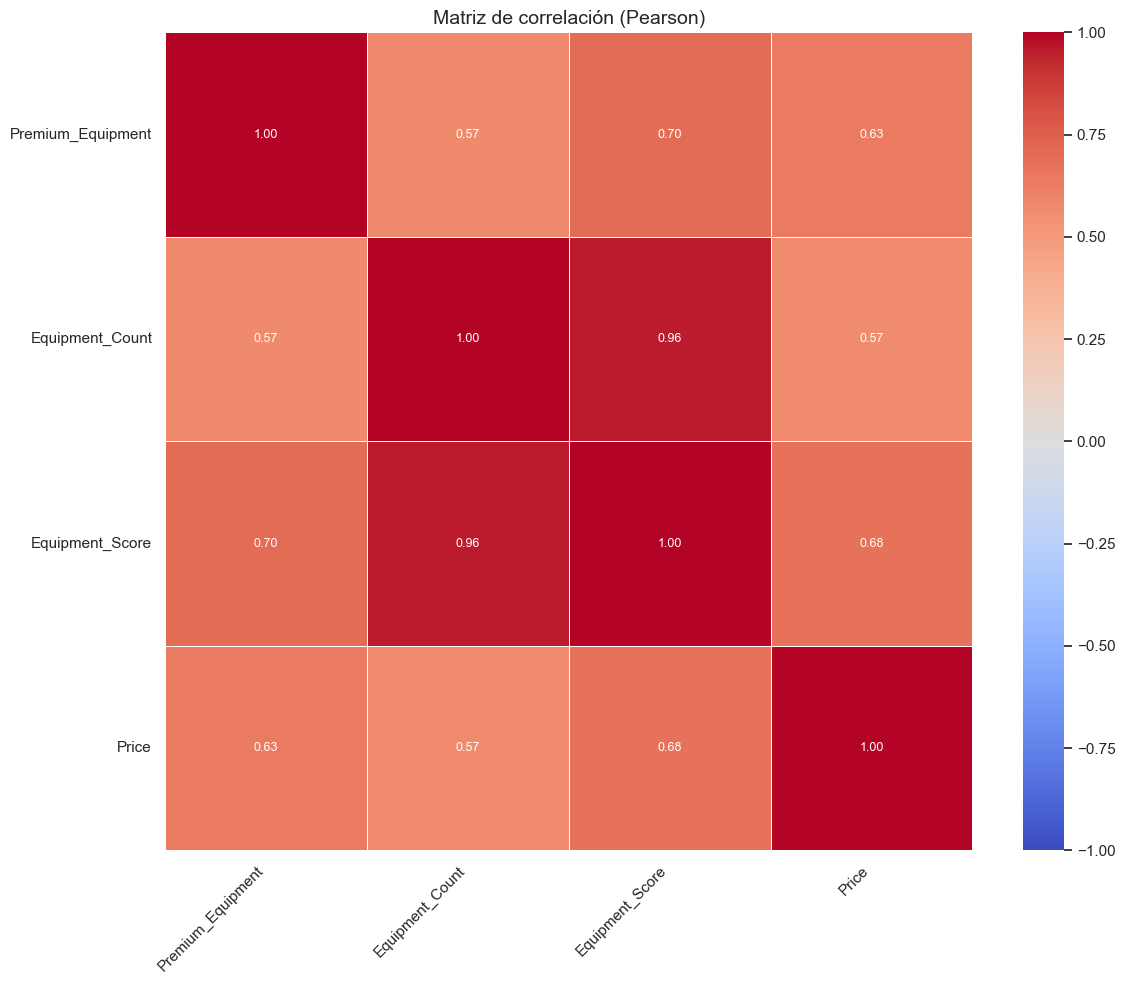

In [790]:
matrix = show_correlation_matrix(
    df[["Premium_Equipment", "Equipment_Count", "Equipment_Score", "Price"]]
)

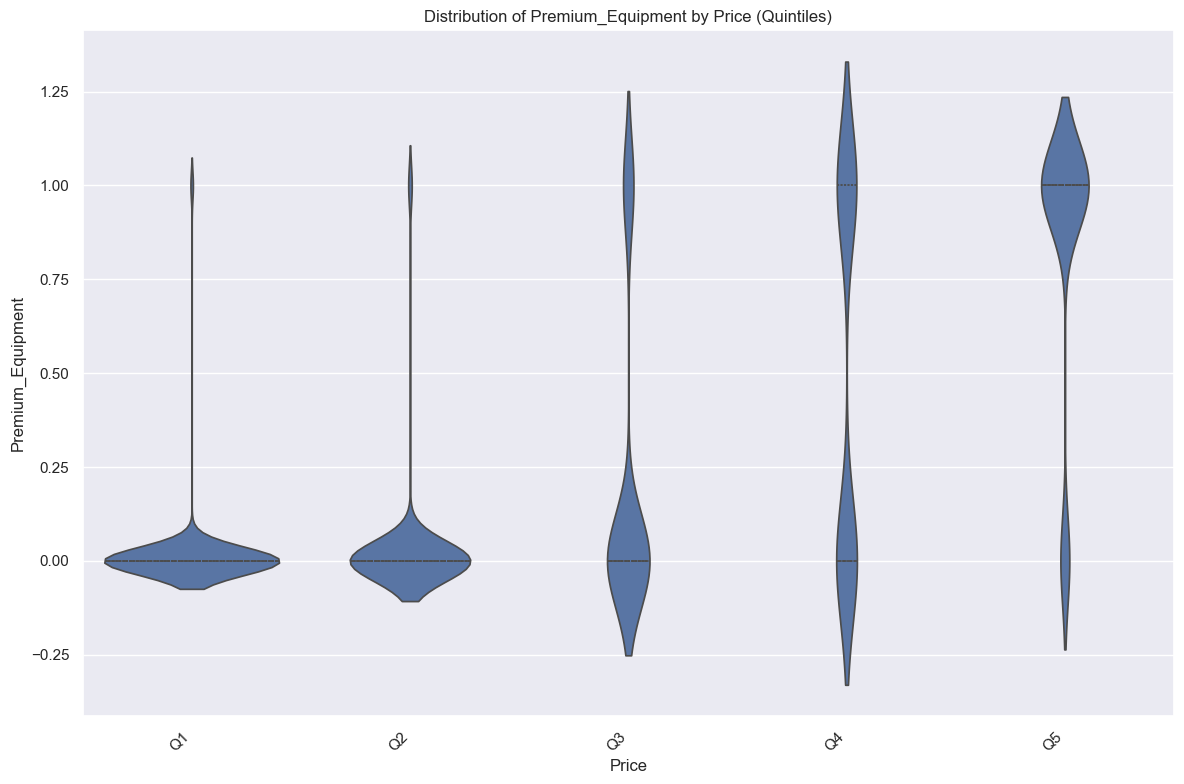

In [791]:
violinplot_feature(df, "Premium_Equipment")

Veamos cómo se distribuye premium equipment


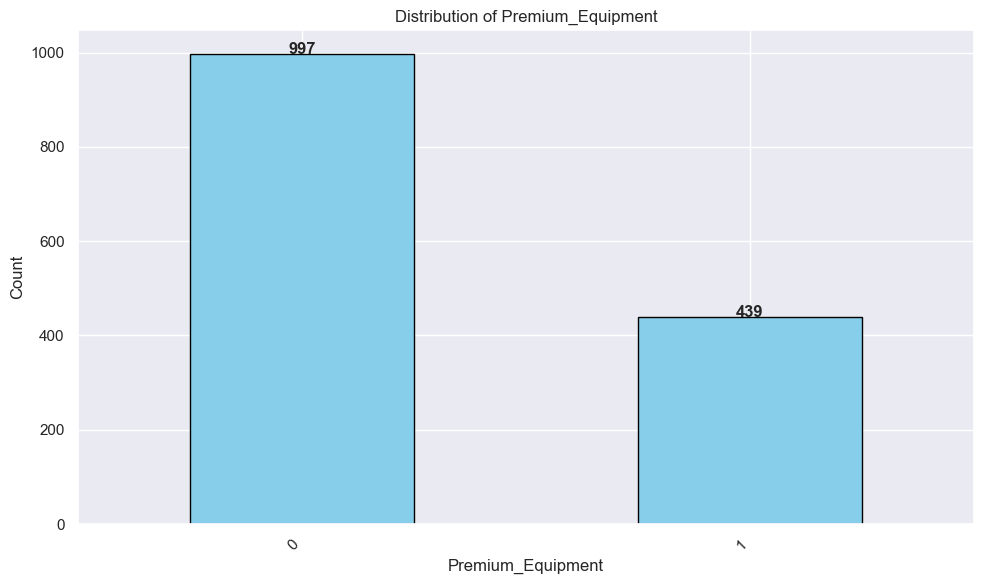

In [792]:
barplot_feature(df, "Premium_Equipment")

Está sesgado a la izquierda **Equipment_Score**, lo cuál es una pena porque tenemos 0,68 de correlación.


Y su scatter plot


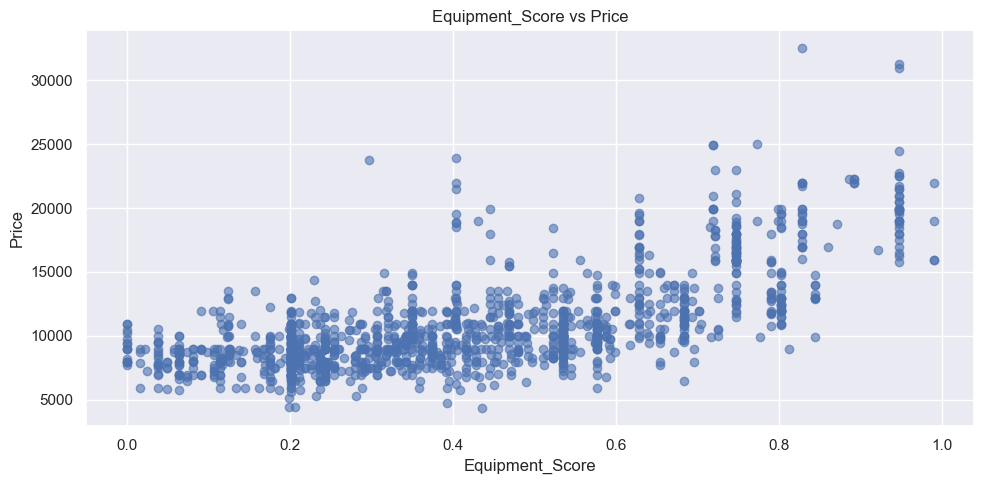

In [793]:
scatter_feature(df, "Equipment_Score")

Creemos que al principio, cuantos más equipamientos mejor, pero cuando ya se tiene una cierta base, se estabiliza el precio un poco, por el scatter plot creemos que una exponencial se ajustaría mejor


Veamos si con una transformación de raiz cuadrada podemos forzar su distribución a parecerse más a una normal


In [794]:
df["Equip_Score_sqrt"] = np.sqrt(df["Equipment_Score"])

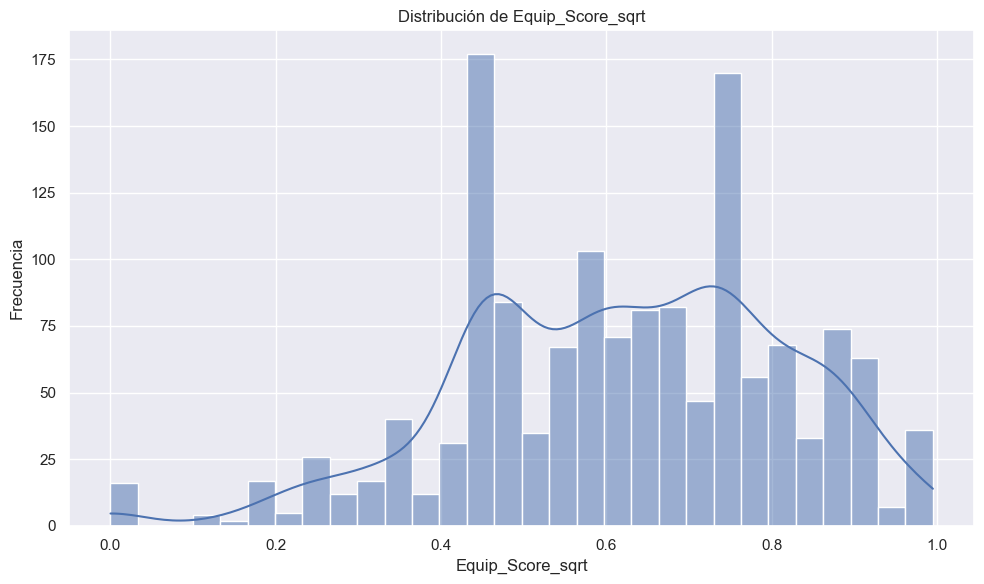

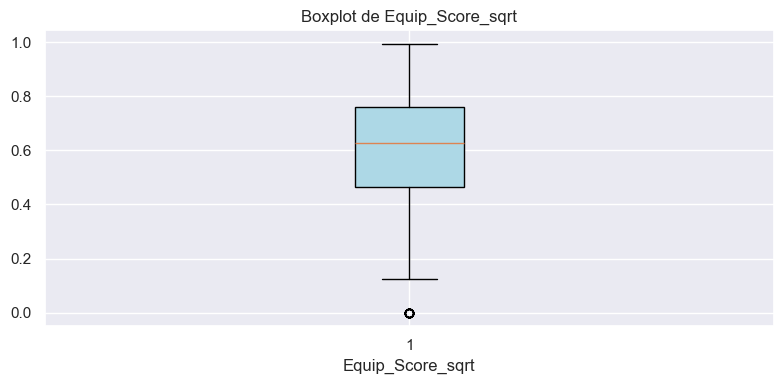

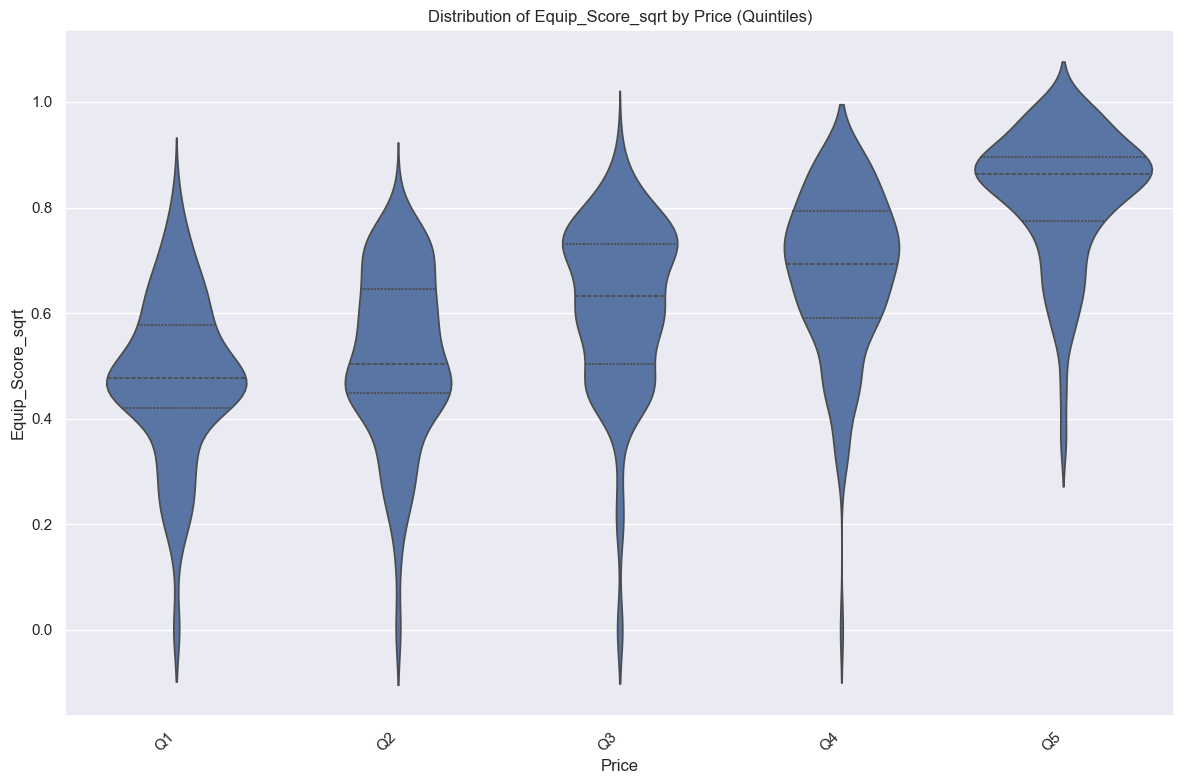

In [795]:
from utils import boxplot_feature


histogram_feature(df, "Equip_Score_sqrt")
boxplot_feature(df, "Equip_Score_sqrt")
violinplot_feature(df, "Equip_Score_sqrt")

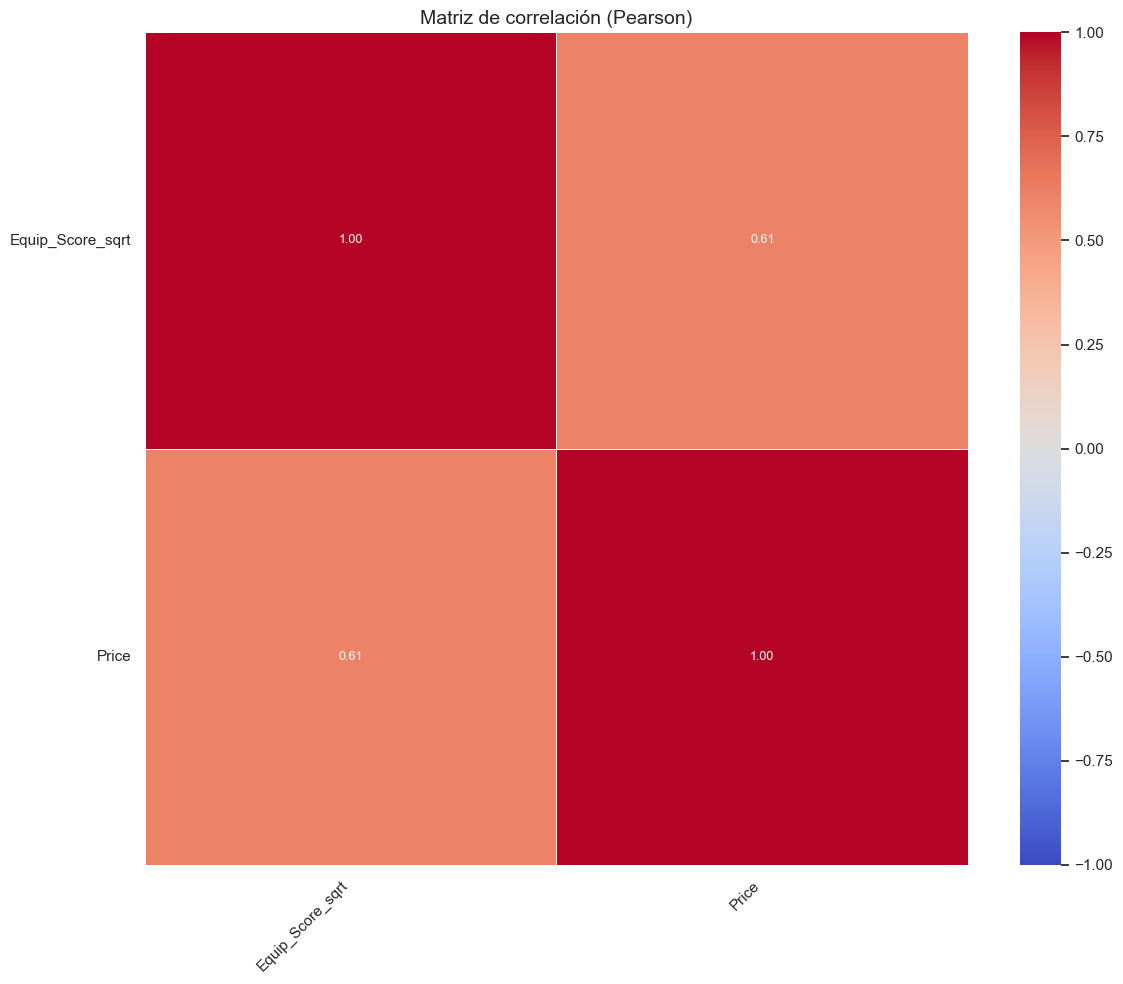

In [796]:
matrix = show_correlation_matrix(df[["Equip_Score_sqrt", "Price"]])

In [797]:
def tag_equipment(score):
    if score <= 0.2:
        return "Bajo"
    elif score <= 0.6:
        return "Medio"
    else:
        return "Alto"


df["Equipment_Level"] = df["Equipment_Score"].apply(tag_equipment)

dummies = pd.get_dummies(df["Equipment_Level"], prefix="Equip_Level").astype(int)
df = pd.concat([df, dummies], axis=1)

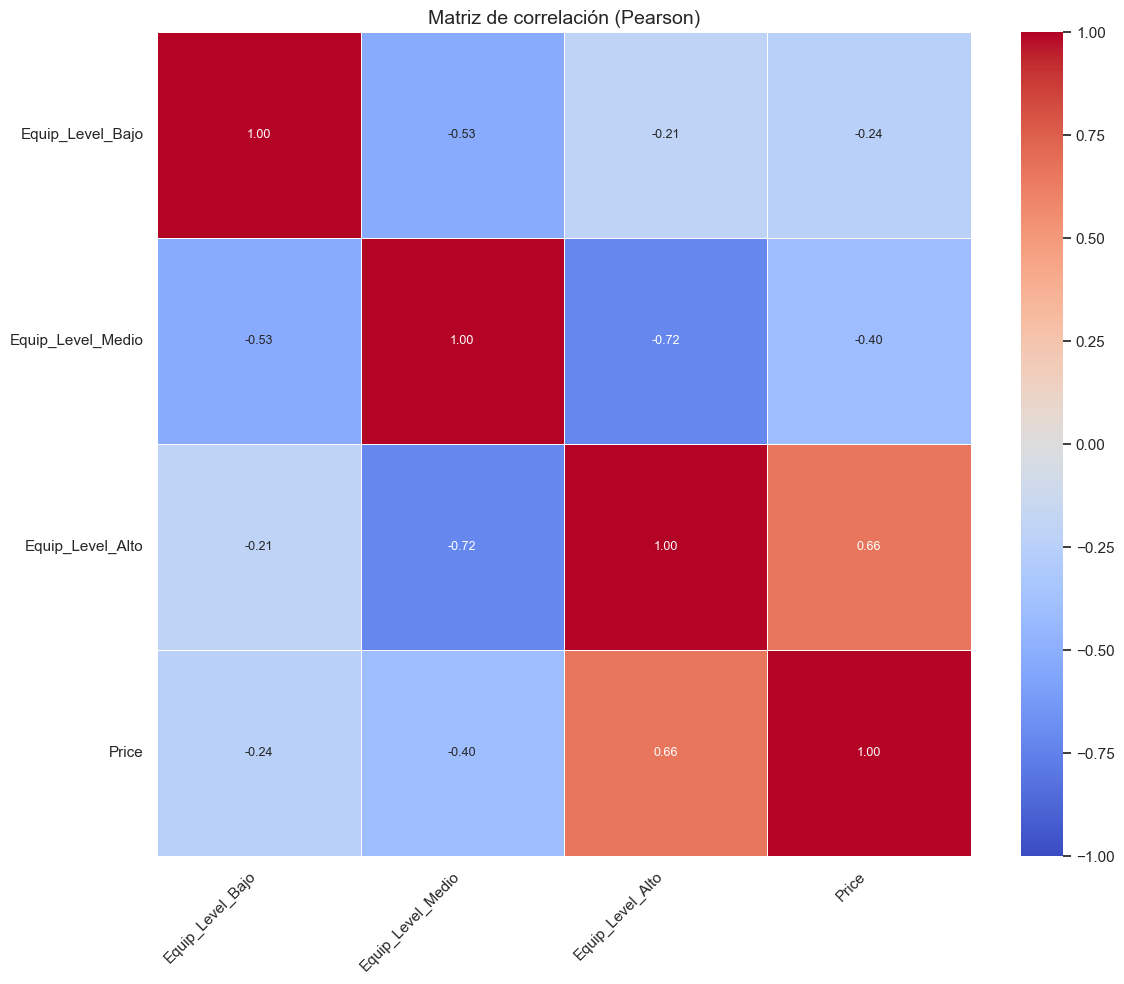

In [798]:
matrix = show_correlation_matrix(
    df[["Equip_Level_Bajo", "Equip_Level_Medio", "Equip_Level_Alto", "Price"]]
)

Puede que Equip_Level_Alto tenga alguna utilidad


Veamos cómo está distribuida


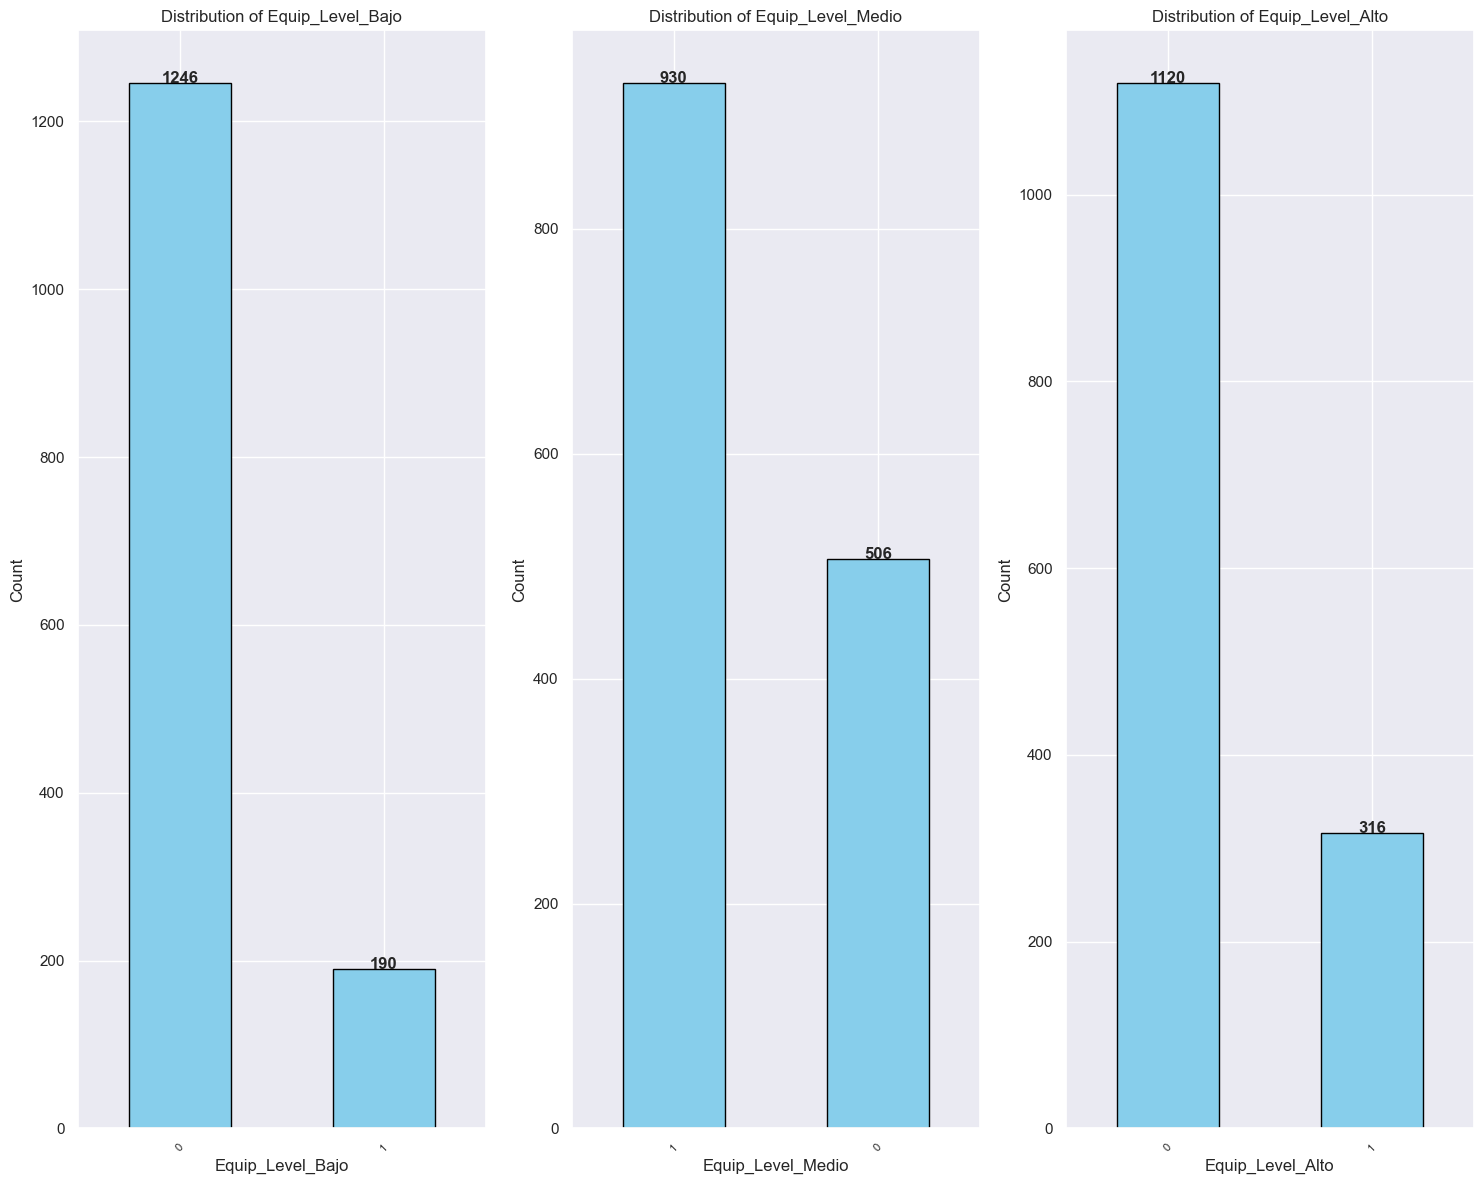

In [799]:
equip_levels = ["Equip_Level_Bajo", "Equip_Level_Medio", "Equip_Level_Alto"]

barplot_features_batch(df, equip_levels)

Nada útil. Vamos descartando nuestros intentos


In [800]:
df = df.drop(
    columns=equip_levels + ["Equipment_Level", "Equipment_Score", "Premium_Equipment"]
)

Con todo, vemos qué tenemos hasta el momento


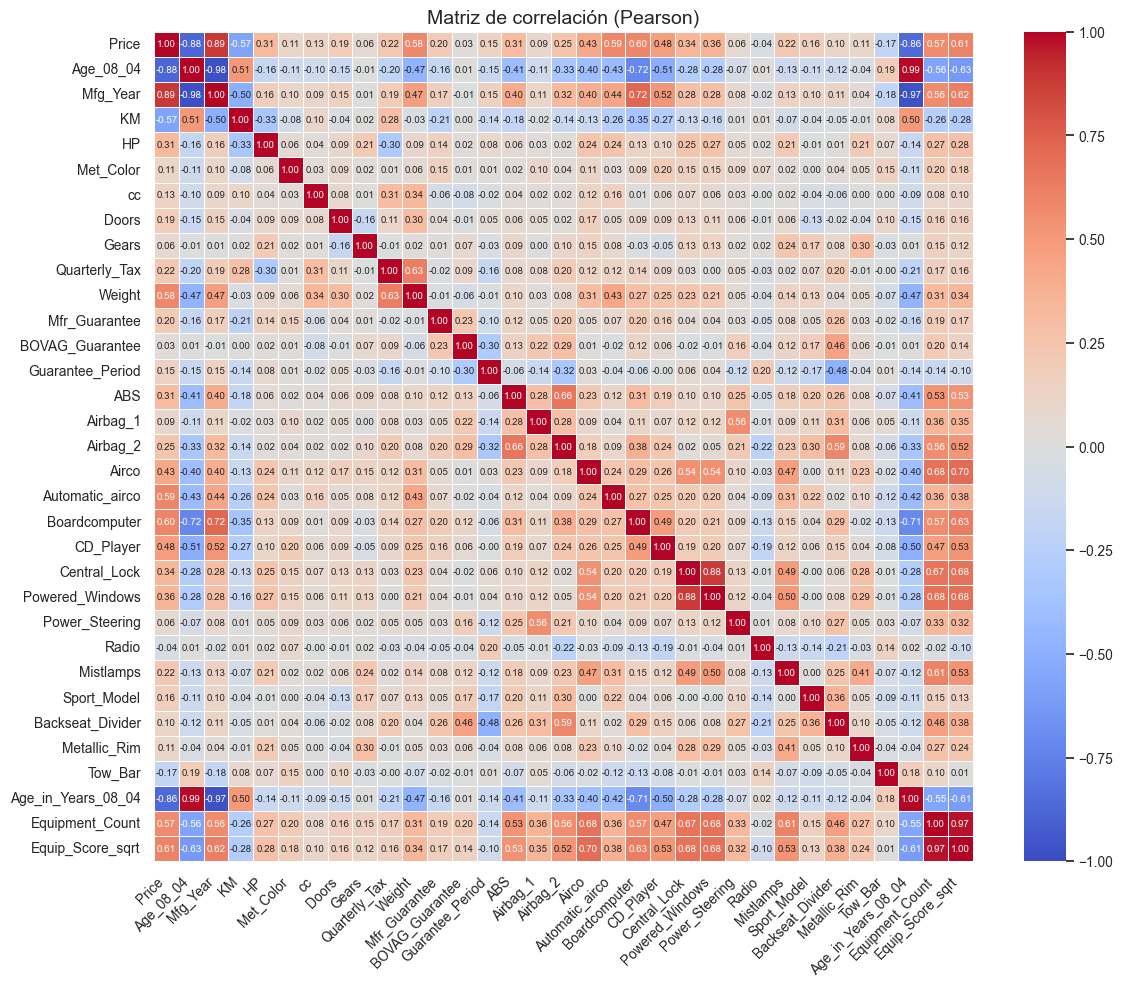

In [801]:
matrix = show_correlation_matrix(df)

Hay una feature para indicar si tiene un tipo de garantía, otra feature para indicar que tiene del otro tipo de garantía, y otra feature más que indica qué período de garantía.


In [802]:
mask = (
    (df["BOVAG_Guarantee"] == 0)
    & (df["Mfr_Guarantee"] == 0)
    & (df["Guarantee_Period"] != 0)
)
df.loc[mask, ["BOVAG_Guarantee", "Mfr_Guarantee", "Guarantee_Period"]]

BOVAG_Guarantee  Mfr_Guarantee  Guarantee_Period
17                  0              0                18
18                  0              0                 3
34                  0              0                 3
80                  0              0                 3
86                  0              0                12
...               ...            ...               ...
1367                0              0                 6
1378                0              0                 6
1388                0              0                 6
1401                0              0                 3
1435                0              0                 3

[139 rows x 3 columns]

In [803]:
df["Has_Guarantee"] = (df["BOVAG_Guarantee"] == 1) | (df["Mfr_Guarantee"] == 1)

In [804]:
df["Has_Guarantee"].value_counts()

Has_Guarantee
True     1297
False     139
Name: count, dtype: int64

In [805]:
df["True_Guarantee_Period"] = (
    df["Guarantee_Period"].where(df["Has_Guarantee"], other=0).astype(int)
)

In [806]:
df["True_Guarantee_Period"].value_counts()

True_Guarantee_Period
3     1196
0      139
12      57
6       39
24       2
13       1
20       1
28       1
Name: count, dtype: int64

Esta exploración de Garantías no nos llevó a ningún lado.


**Airco** está muy balanceada, podría sernos útil. Veamos el gráfico de violín para entender mejor el impacto de estos equipamientos en los diferentes quintiles de precio.


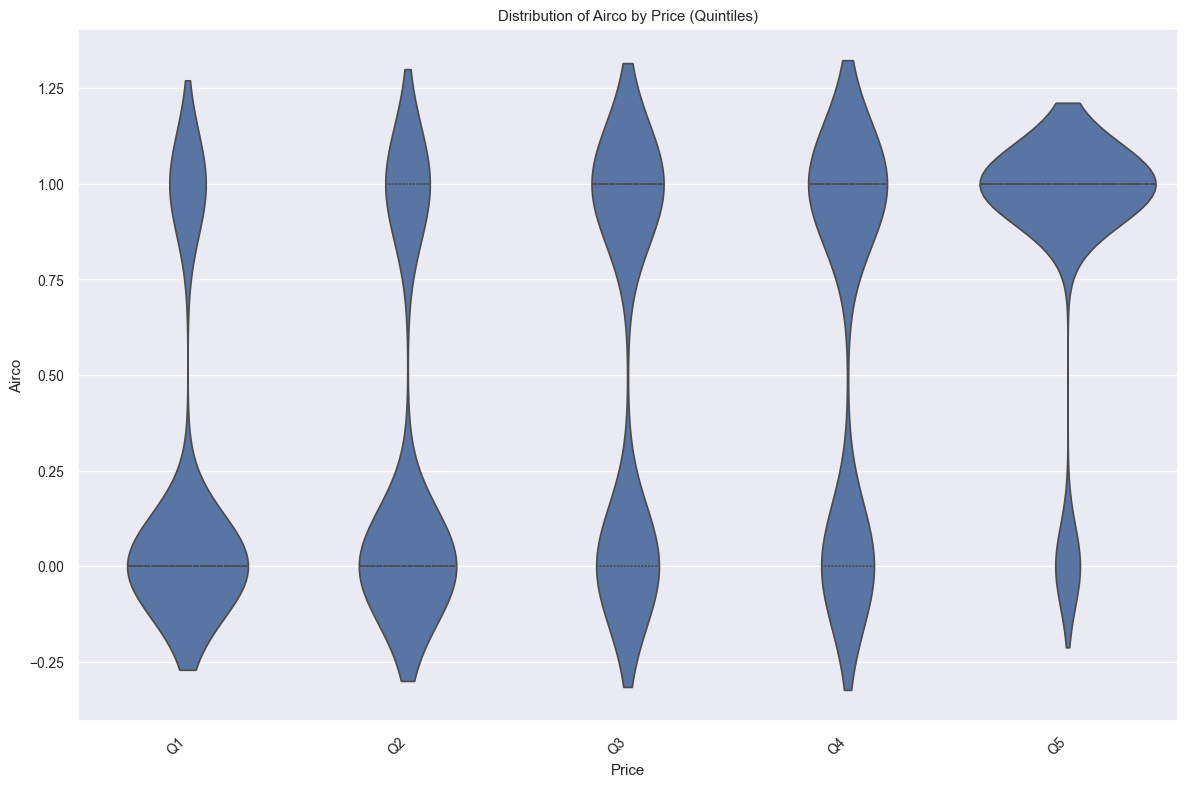

In [807]:
violinplot_feature(df, "Airco")

Lo vemos muy positivo a Airco. Está bien distribuido, se le ve impacto en los quintiles, tiene 0,43 de correlación (de momento). Muy positivo.


Investiguemos Boardcomputer, porque tiene una correlación alta de 0,60 (de momento).


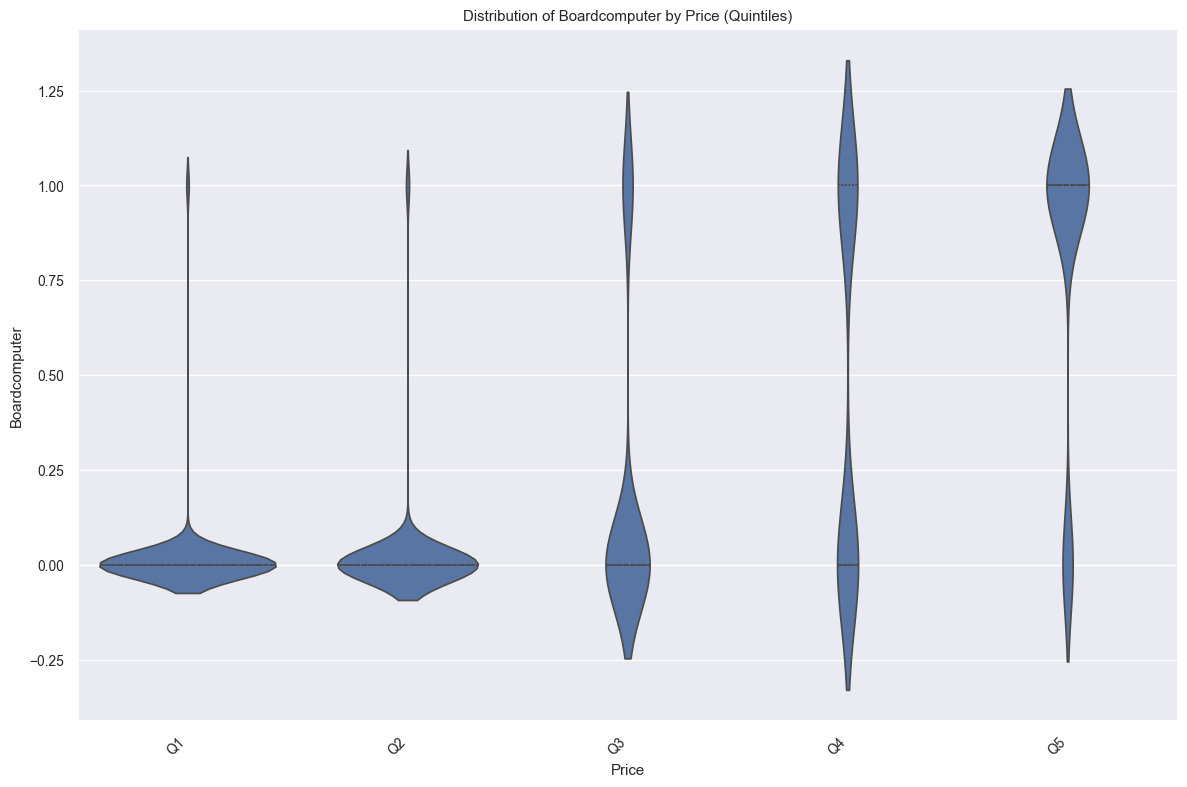

In [808]:
violinplot_feature(df, "Boardcomputer")

**Boardcomputer** vemos que explica bien el Price, en quintiles bajos es muy frecuente su ausencia, y en quintiles altos domina su presencia. Está desbalanceada lametablemente. Veremos si la podemos rescatar un poco.


Observamos que tienen una alta correlación las variables Central_Lock y Powered_Windows. Por lo que entendemos del problema, creemos que ambas características tienen sentido en conjunto, por ejemplo en aquellos autos en los que al bloquearlos con el cierre centralizado automáticamente levantan los vidrios si es que estaban bajados.


Veamos si esto sucede y con qué frecuencia:


In [809]:
# Contar filas donde Powered_Windows = 1 y Central_Lock = 0
pw_sin_cl = ((df["Powered_Windows"] == 1) & (df["Central_Lock"] == 0)).sum()

# Contar filas donde Central_Lock = 1 y Powered_Windows = 0
cl_sin_pw = ((df["Central_Lock"] == 1) & (df["Powered_Windows"] == 0)).sum()

# Contar filas donde ambas son 1
ambos = ((df["Powered_Windows"] == 1) & (df["Central_Lock"] == 1)).sum()

print(f"Filas con Powered_Windows=1 y Central_Lock=0: {pw_sin_cl}")
print(f"Filas con Central_Lock=1 y Powered_Windows=0: {cl_sin_pw}")
print(f"Filas con Powered_Windows=1 y Central_Lock=1: {ambos}")

Filas con Powered_Windows=1 y Central_Lock=0: 31
Filas con Central_Lock=1 y Powered_Windows=0: 57
Filas con Powered_Windows=1 y Central_Lock=1: 776


Ya que estamos, veamos su influencia sobre los quintiles de Precio


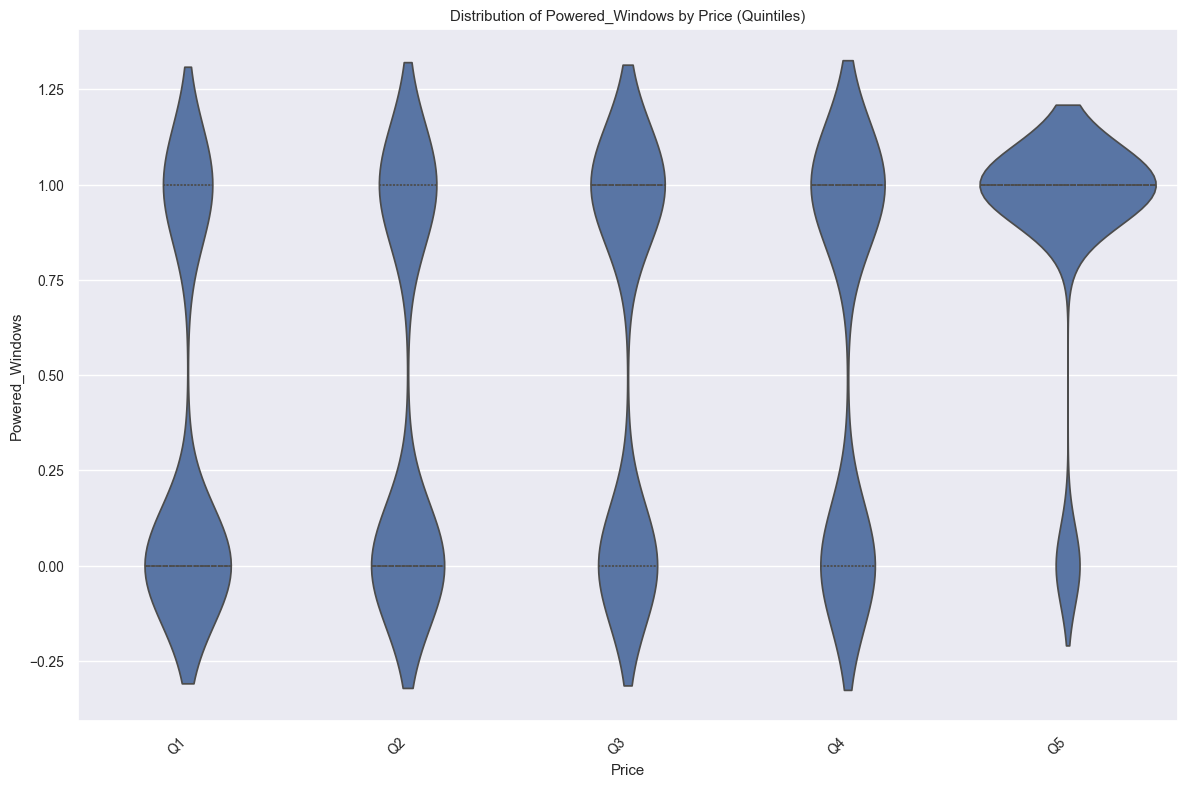

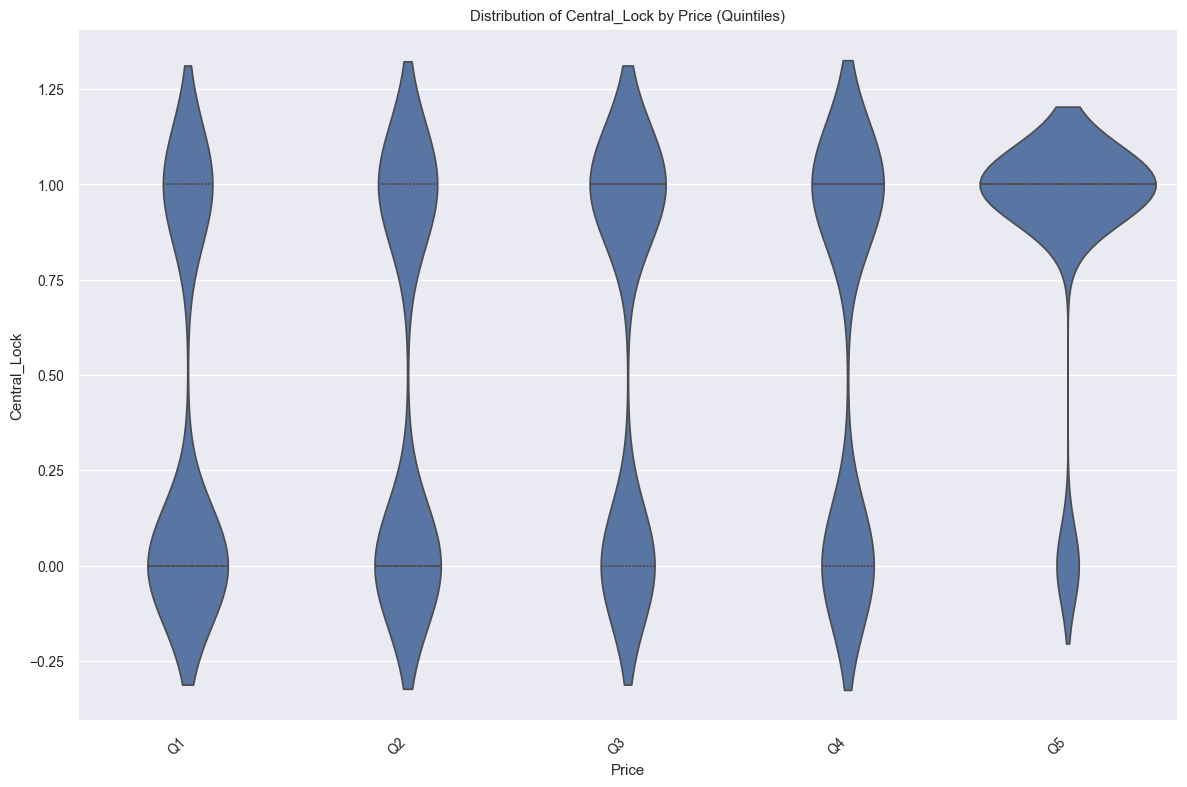

In [810]:
violinplot_feature(df, "Powered_Windows")
violinplot_feature(df, "Central_Lock")

En base a esto, considerando su fuerte correlación, considerando su peso sobre el Price, y considerando la correlación que tienen con la variable objetivo, elegimos quedarnos con Powered_Windows


Central Lock se va:


In [811]:
df = df.drop(columns=["Central_Lock"])

Siendo que nos quedamos con Airco, Powered_Windows y Boardcomputer, aquellas que puedan presentar colinealidad con estas features elegidas serán borradas.


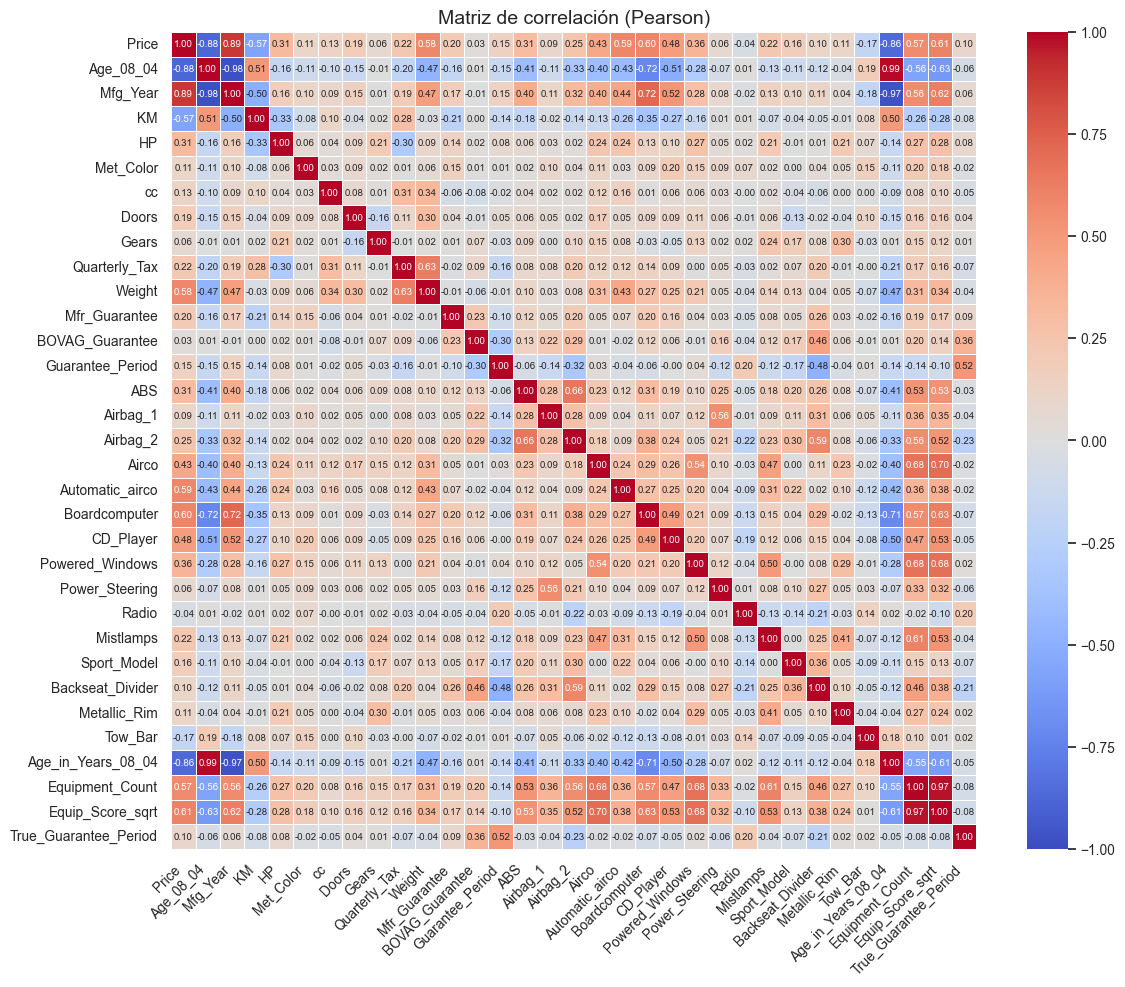

In [812]:
matrix = show_correlation_matrix(df)

Board_Computer y CD_Player tienen alta correlación, sacamos CD_Player


In [813]:
df = df.drop(columns=["CD_Player"])

Powered_Windows con Mistlamps tienen alta correlación, se van Mistlamps


In [814]:
df = df.drop(columns=["Mistlamps"])

Echemos un vistazo a CC


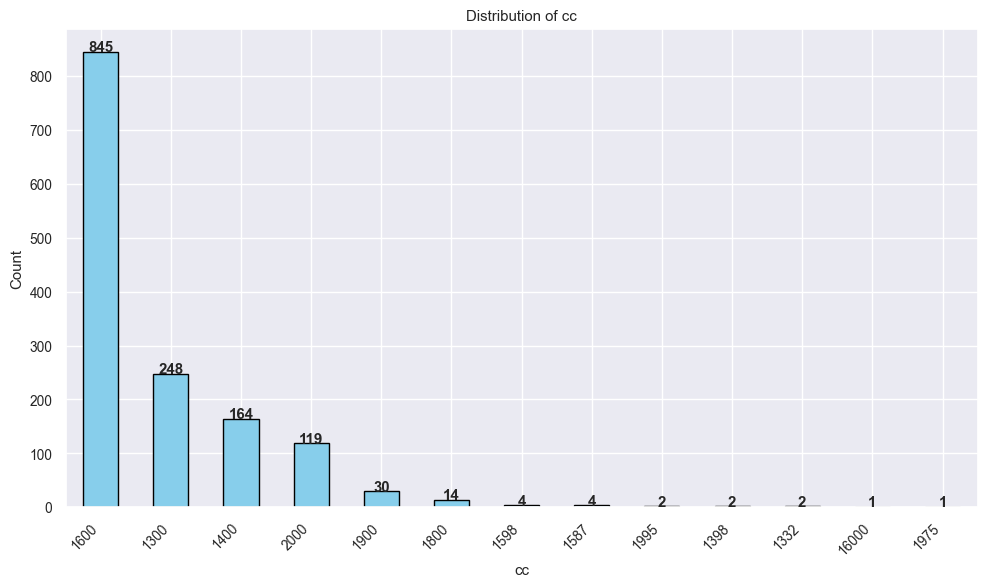

In [815]:
barplot_feature(df, "cc")

16000 de cilindrada es un motor de 16 litros, seguramente está mal imputado ese dato, y corresponde a la clase o valor más frecuente, que serían 1600cc, o un motor 1.6.


In [816]:
# Find and correct the row where cc is 16000
df.loc[df["cc"] == 16000, "cc"] = 1600

1975 y 1995 son muy próximos a 2000, y valores tan específicos de cilindrada o pueden ser casos muy particulares o errores de imputación. En todo caso no nos aporta nada estas clases tan específicas y con tan poca frecuencia, por lo que las forzamos.


In [817]:
df.loc[df["cc"].isin([1975, 1995]), "cc"] = 2000

1598 y 1587 los correjimos para que pertenezcan a 1600


In [818]:
df.loc[df["cc"].isin([1598, 1587]), "cc"] = 1600

1398 a 1400


In [819]:
df.loc[df["cc"] == 1398, "cc"] = 1400

1332 se redondea para abajo, pero nos terminaría quedando una clase con una sola ocurrencia, de momento lo hacemos, ya veremos cómo mejorar esta feature


In [820]:
df.loc[df["cc"] == 1332, "cc"] = 1300

Y ahora veamos el violin plot de cc a ver si notamos algún patrón


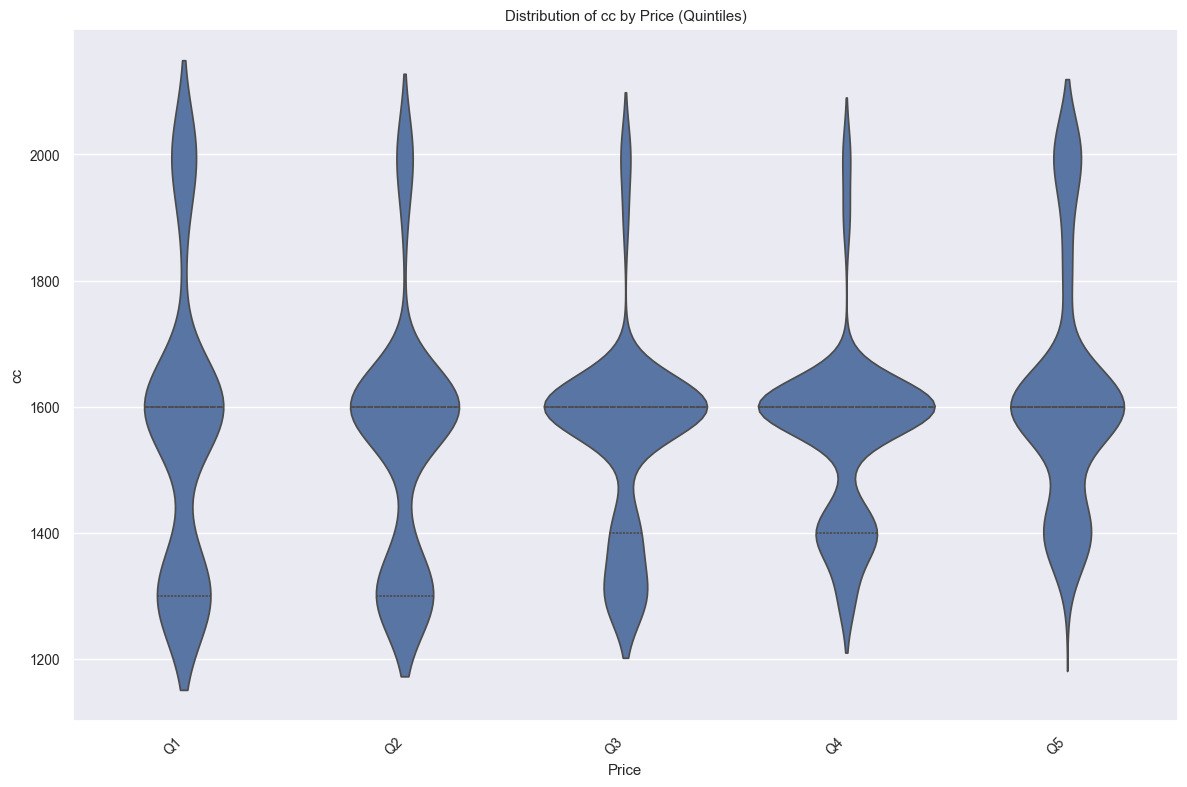

In [821]:
violinplot_feature(df, "cc")

Observamos, para cada quintil, 3 concentraciones de valores con medias en 1600, otras oscilando entre 1200 y 1400, y otras alrededor de 2000. Podemos interpretar que hay 3 tipos de motores, 1600 es un motor de tamaño medio, menos de 1600 es un motor chico, y más de 1600 es un motor grande. Veamos si agrupandolo así podemos lograr un feature que aporte más al modelo.


In [822]:
def classify_engine_size(cc):
    if cc < 1500:
        return 1  # Motor Chico
    elif cc <= 1800:
        return 2  # Motor Medio
    else:
        return 3  # Motor Grande


# Create new feature as an ordinal variable
df["Engine_Size"] = df["cc"].apply(classify_engine_size)
df["Engine_Size"]

0       3
1       3
2       3
3       3
4       3
       ..
1431    1
1432    1
1433    1
1434    1
1435    2
Name: Engine_Size, Length: 1436, dtype: int64

In [823]:
df.dtypes

Model                      object
Price                       int64
Age_08_04                   int64
Mfg_Year                    int64
KM                          int64
Fuel_Type                  object
HP                          int64
Met_Color                   int64
cc                          int64
Doors                       int64
Gears                       int64
Quarterly_Tax               int64
Weight                      int64
Mfr_Guarantee               int64
BOVAG_Guarantee             int64
Guarantee_Period            int64
ABS                         int64
Airbag_1                    int64
Airbag_2                    int64
Airco                       int64
Automatic_airco             int64
Boardcomputer               int64
Powered_Windows             int64
Power_Steering              int64
Radio                       int64
Sport_Model                 int64
Backseat_Divider            int64
Metallic_Rim                int64
Tow_Bar                     int64
target_bins   

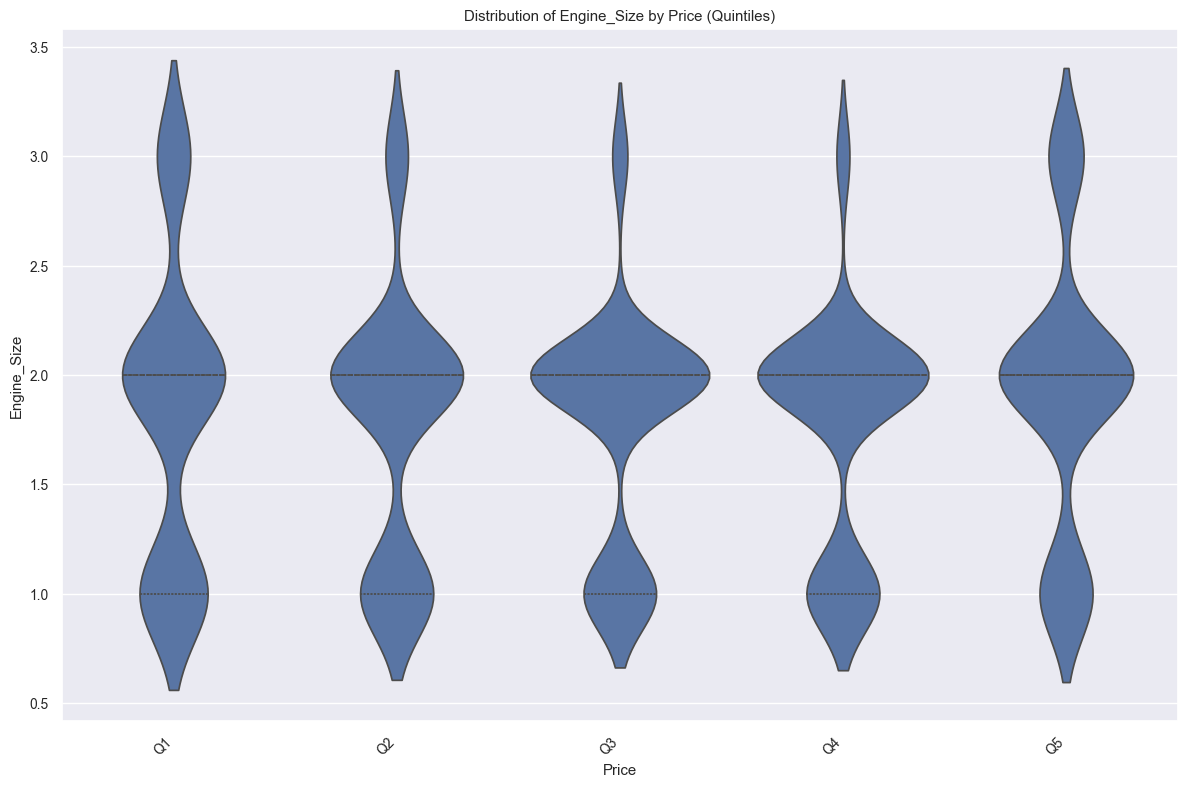

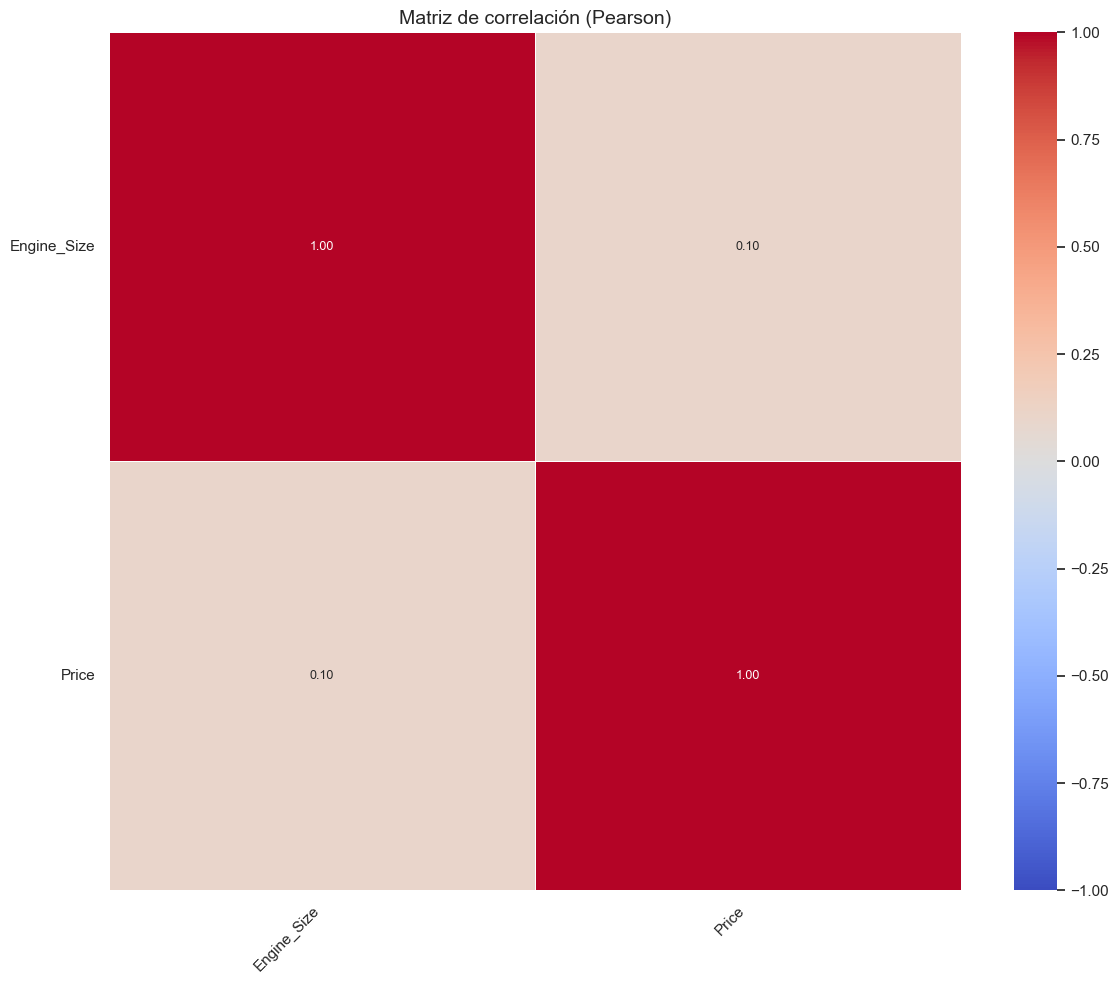

In [824]:
violinplot_feature(df, "Engine_Size")
matrix = show_correlation_matrix(df[["Engine_Size", "Price"]])

No parece muy útil, la quitamos


In [825]:
df = df.drop(columns=["Engine_Size"])

Exploremos quarterly tax


In [826]:
df["Quarterly_Tax"].value_counts()

Quarterly_Tax
85     613
69     559
185     96
19      72
100     19
234     19
210     18
64      18
197     14
283      3
72       3
163      1
40       1
Name: count, dtype: int64

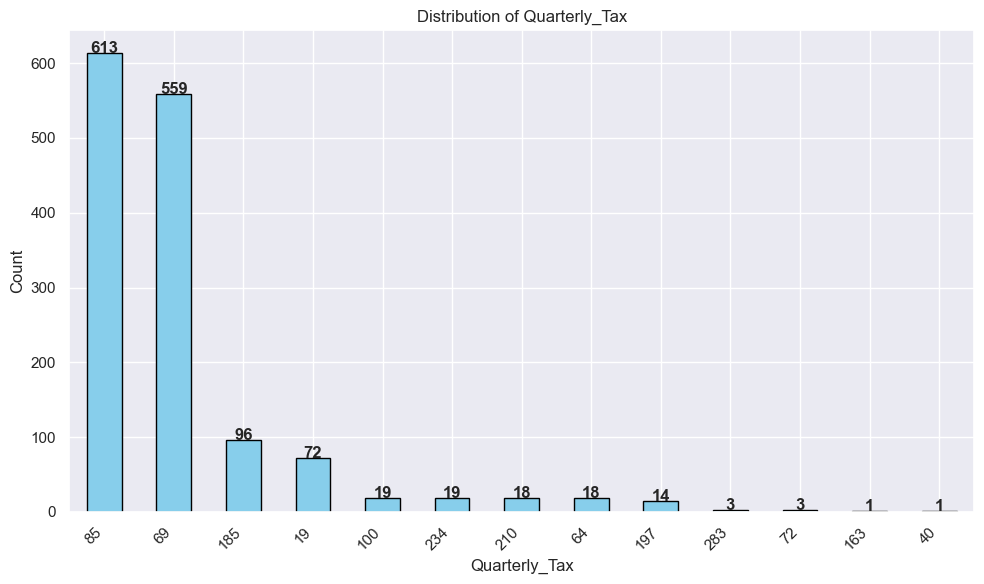

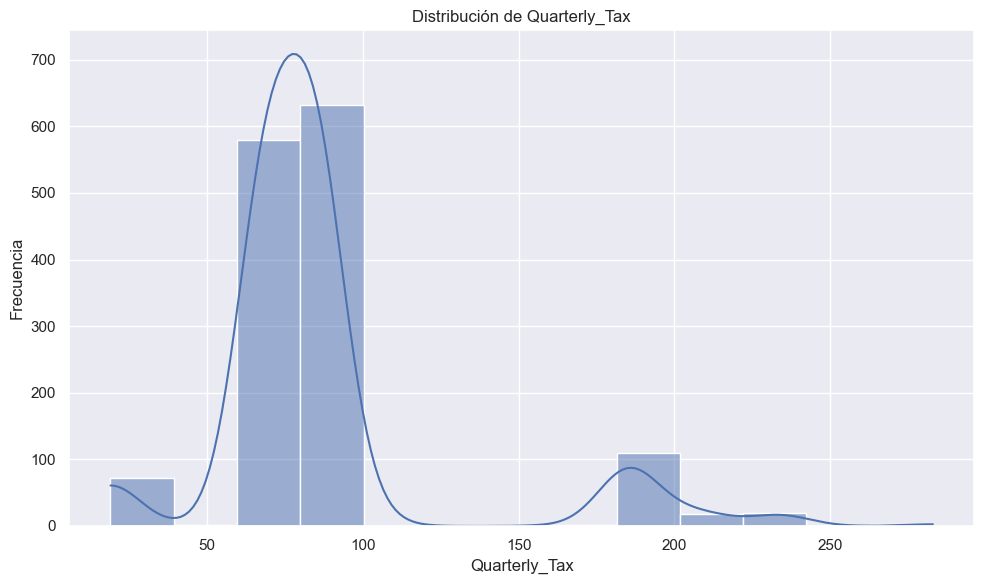

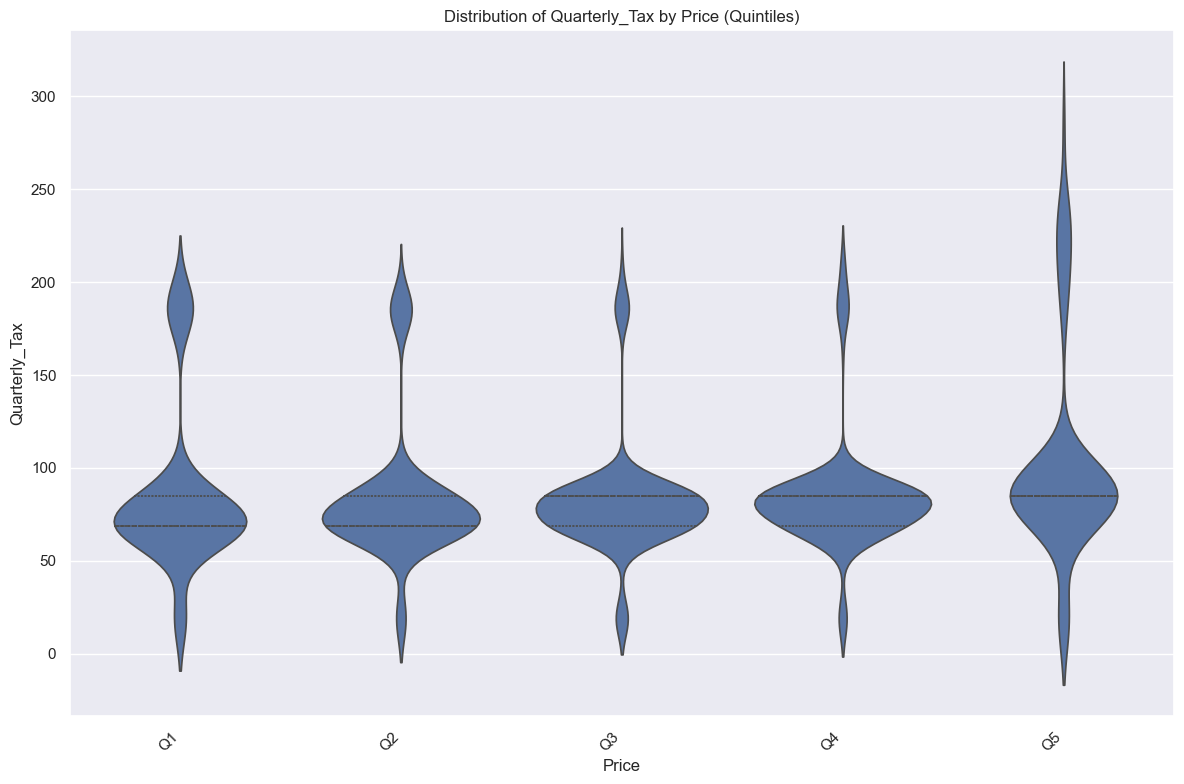

In [827]:
barplot_feature(df, "Quarterly_Tax")
histogram_feature(df, "Quarterly_Tax", bins=13)
violinplot_feature(df, "Quarterly_Tax")

In [828]:
# Count observations that would be removed
mask = (df["Quarterly_Tax"] < 50) | (df["Quarterly_Tax"] > 150)
removed_count = mask.sum()

# Get total observations and calculate percentage
total = len(df)
removed_pct = (removed_count / total) * 100

print(f"Total observations: {total}")
print(f"Would remove: {removed_count} observations ({removed_pct:.2f}%)")

Total observations: 1436
Would remove: 224 observations (15.60%)


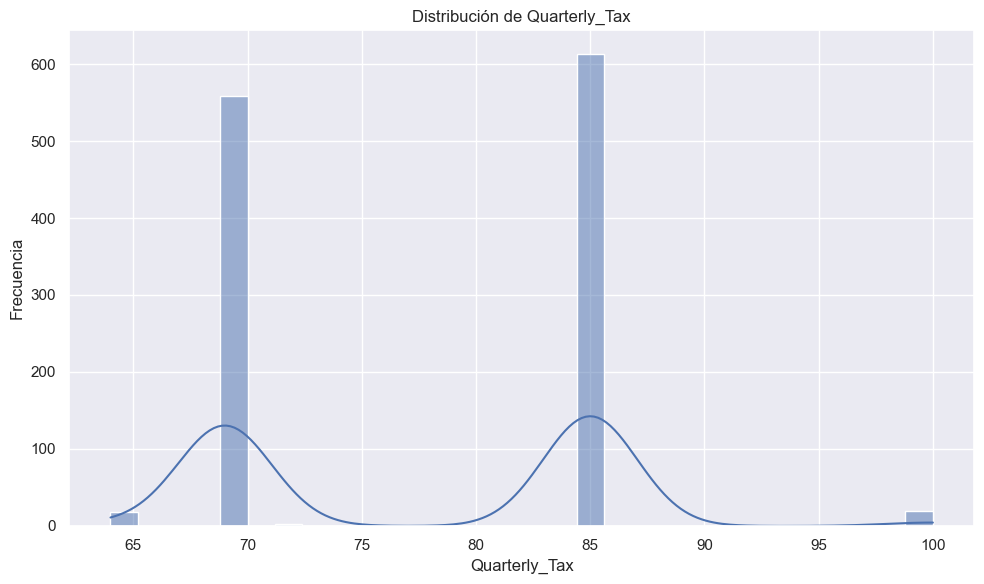

/Users/tobiaspazposse/Documents/parcial_toyotaCorolla/utils.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target_bins"] = pd.qcut(


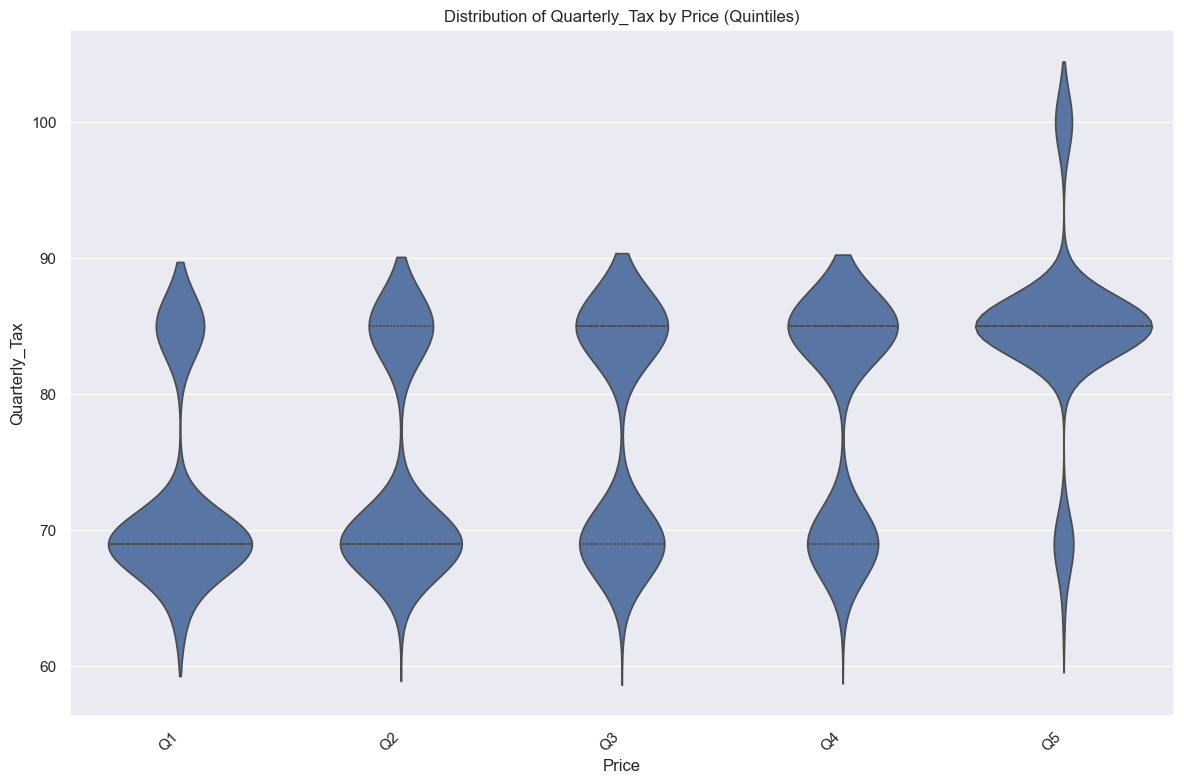

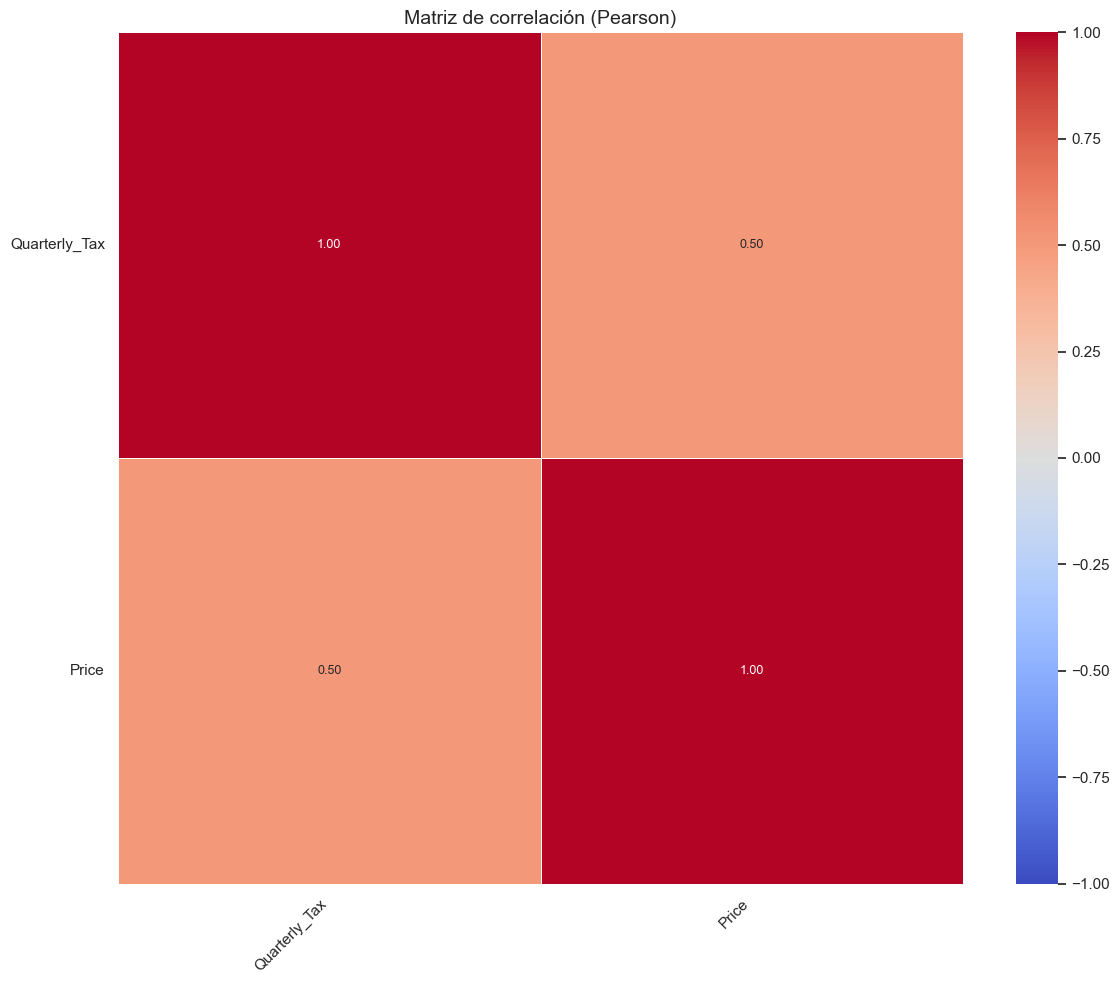

In [829]:
# Create a filtered view without modifying original df
filtered_df = df[~mask]

# Create bar plot
histogram_feature(filtered_df, "Quarterly_Tax")
violinplot_feature(filtered_df, "Quarterly_Tax")

# Show correlation matrix for filtered data
matrix = show_correlation_matrix(filtered_df[["Quarterly_Tax", "Price"]])

Podemos dividir en dos, impuestos altos e impuestos bajos


In [830]:
df["Quarterly_Tax"].mean()

np.float64(87.12256267409471)

In [831]:
df["High_Tax"] = (df["Quarterly_Tax"] > 80).astype(int)

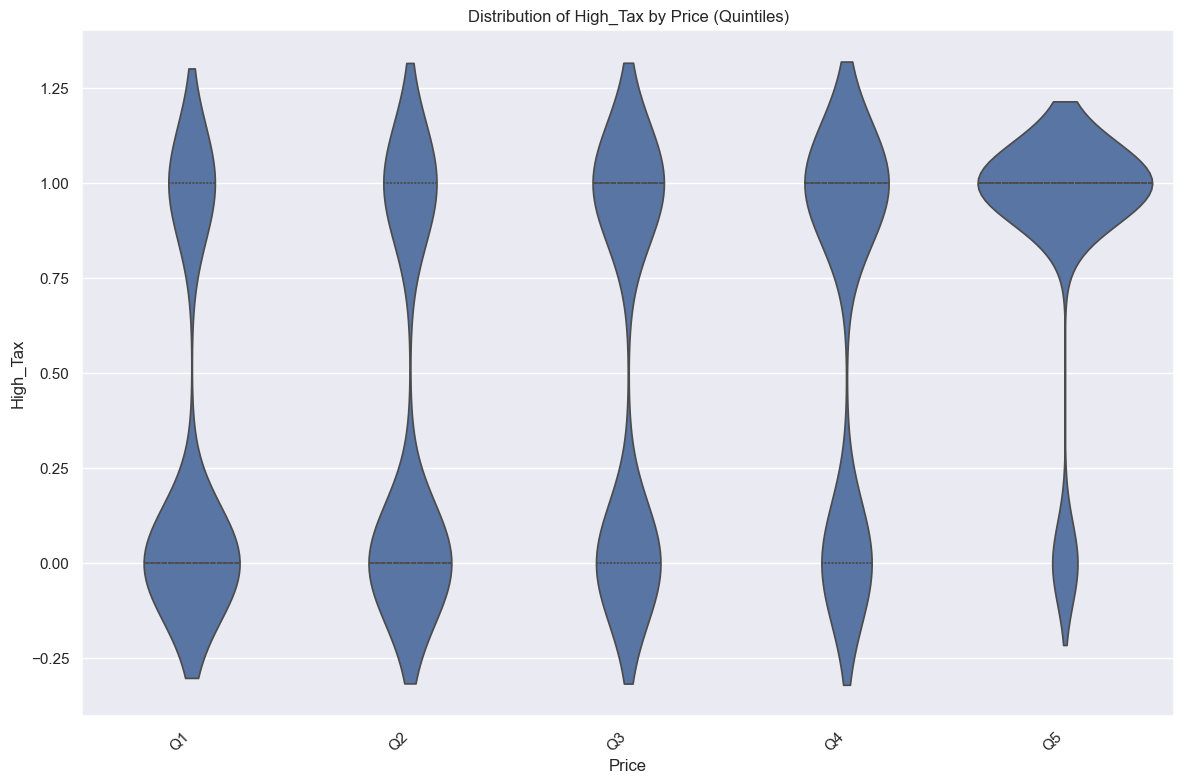

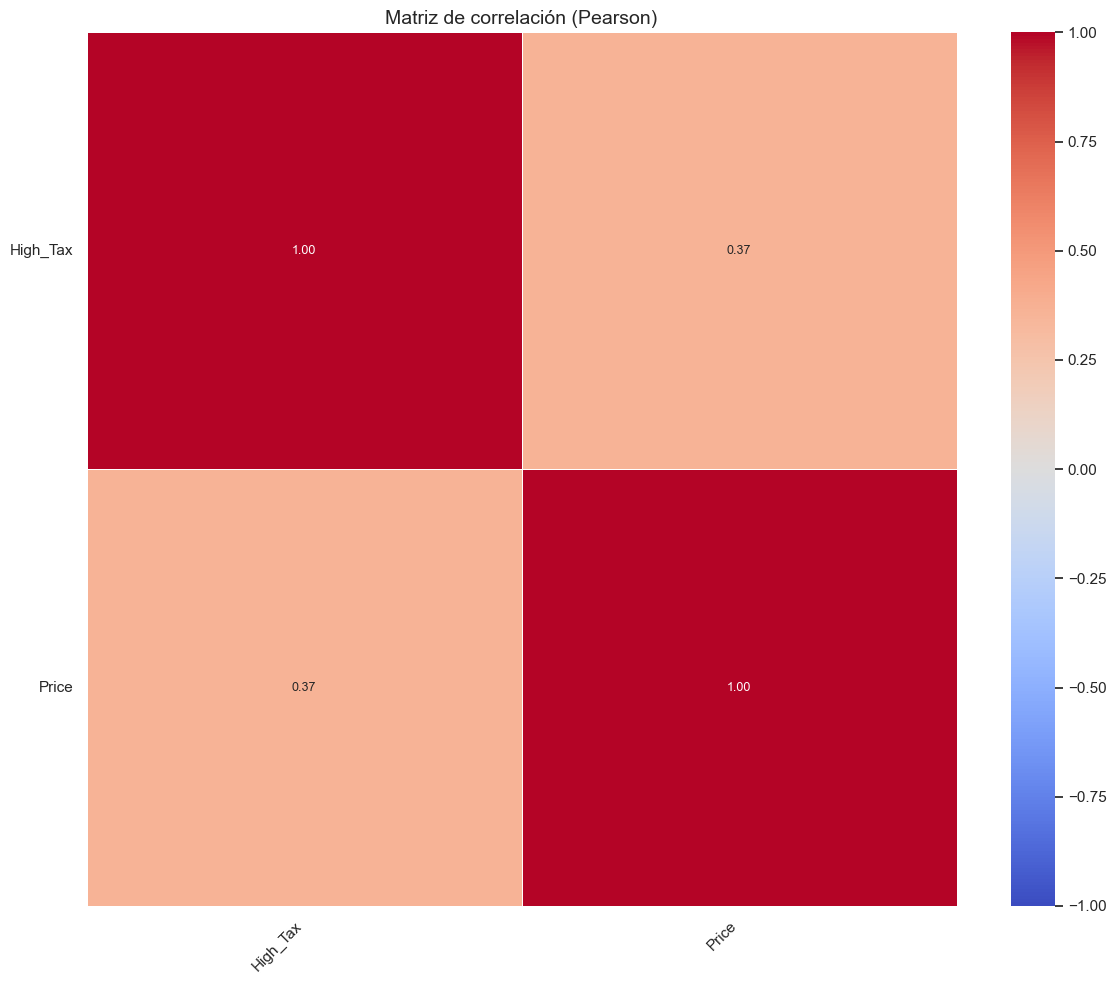

In [832]:
violinplot_feature(df, "High_Tax")
matrix = show_correlation_matrix(df[["High_Tax", "Price"]])

Veamos qué features son las más correlacionadas con el Price hasta el momento.


In [833]:
top_corr = matrix["Price"].abs().sort_values(ascending=False).iloc[1:16]
print(top_corr)

High_Tax    0.366086
Name: Price, dtype: float64


Exploremos Horse Power


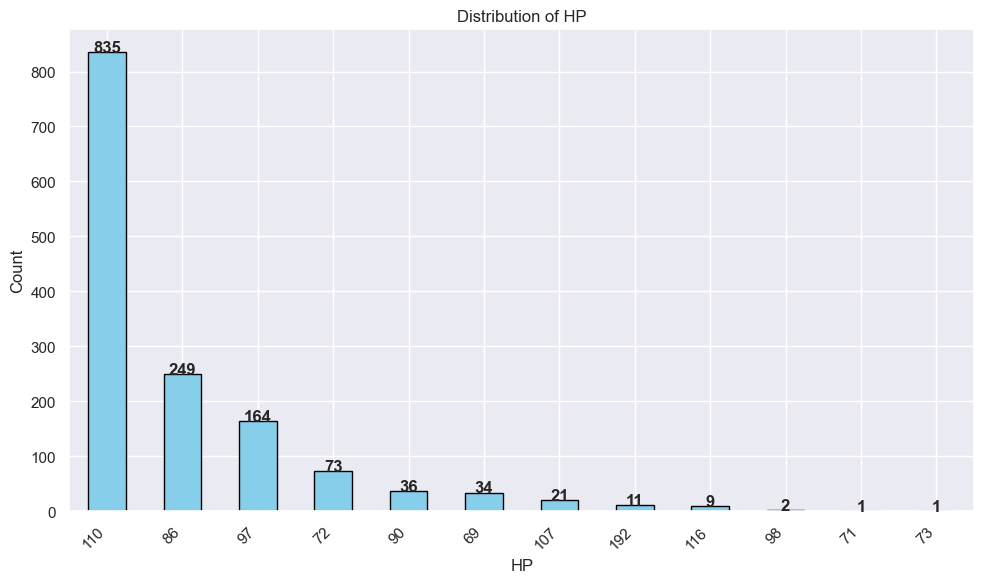

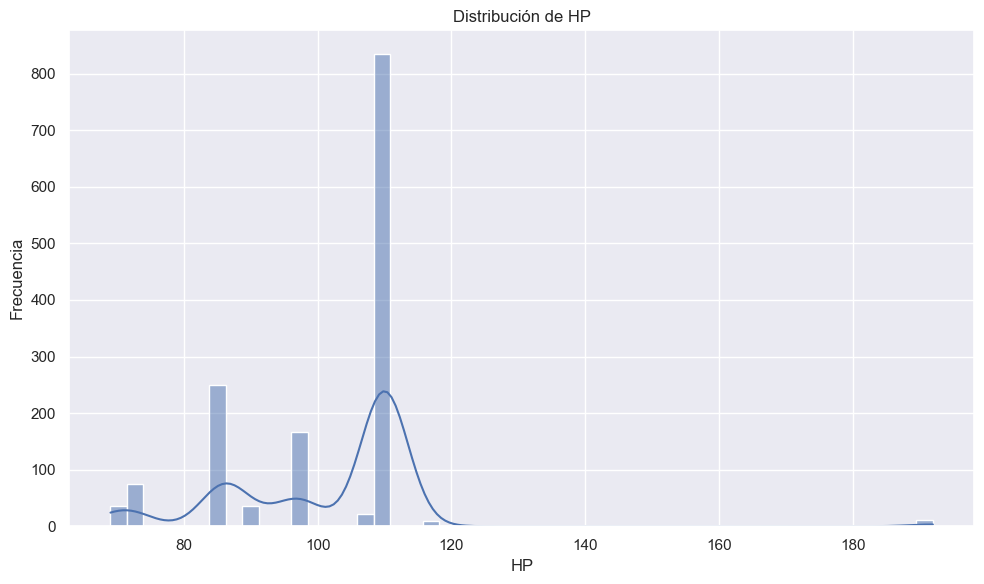

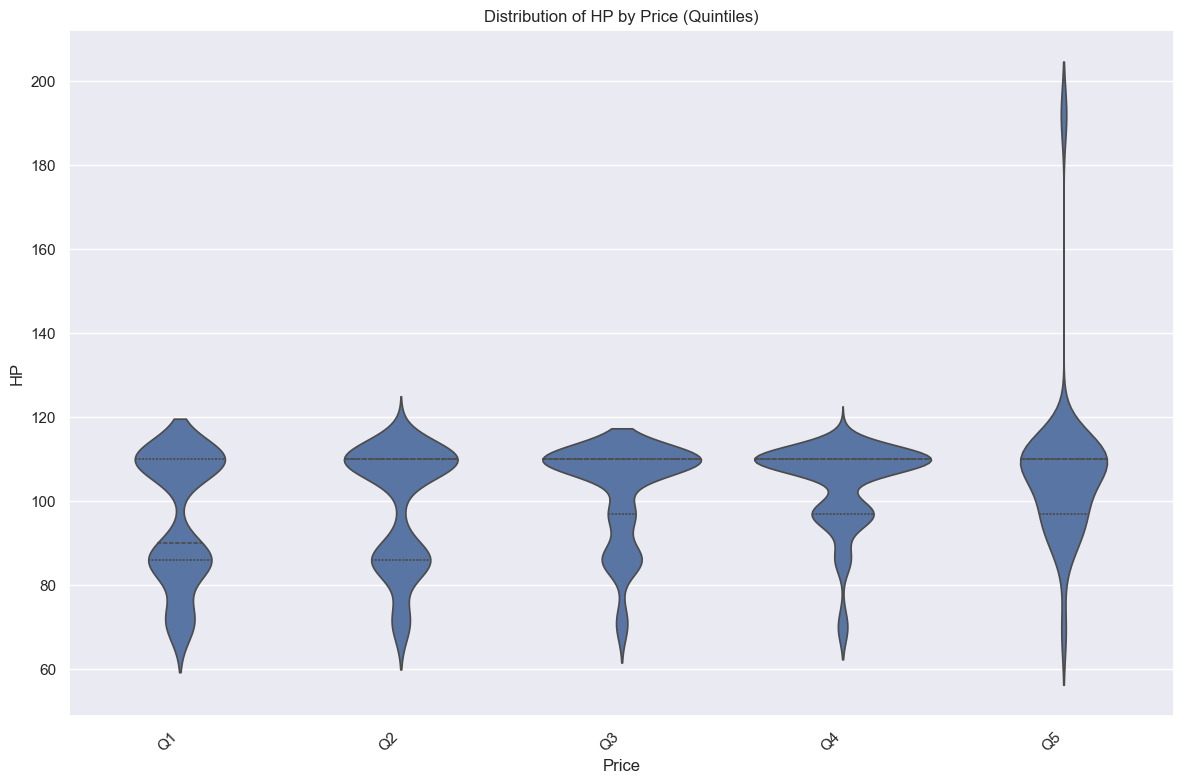

In [834]:
barplot_feature(df, "HP")
histogram_feature(df, "HP", bins=50)
violinplot_feature(df, "HP")

Probamos borrando esos outliers de HP


Original df shape: (1436, 36)
Filtered df shape: (1425, 36)

HP statistics in original df:
count    1436.000000
mean      101.502089
std        14.981080
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

HP statistics in filtered df:
count    1425.000000
mean      100.803509
std        12.744160
min        69.000000
25%        86.000000
50%       110.000000
75%       110.000000
max       116.000000
Name: HP, dtype: float64


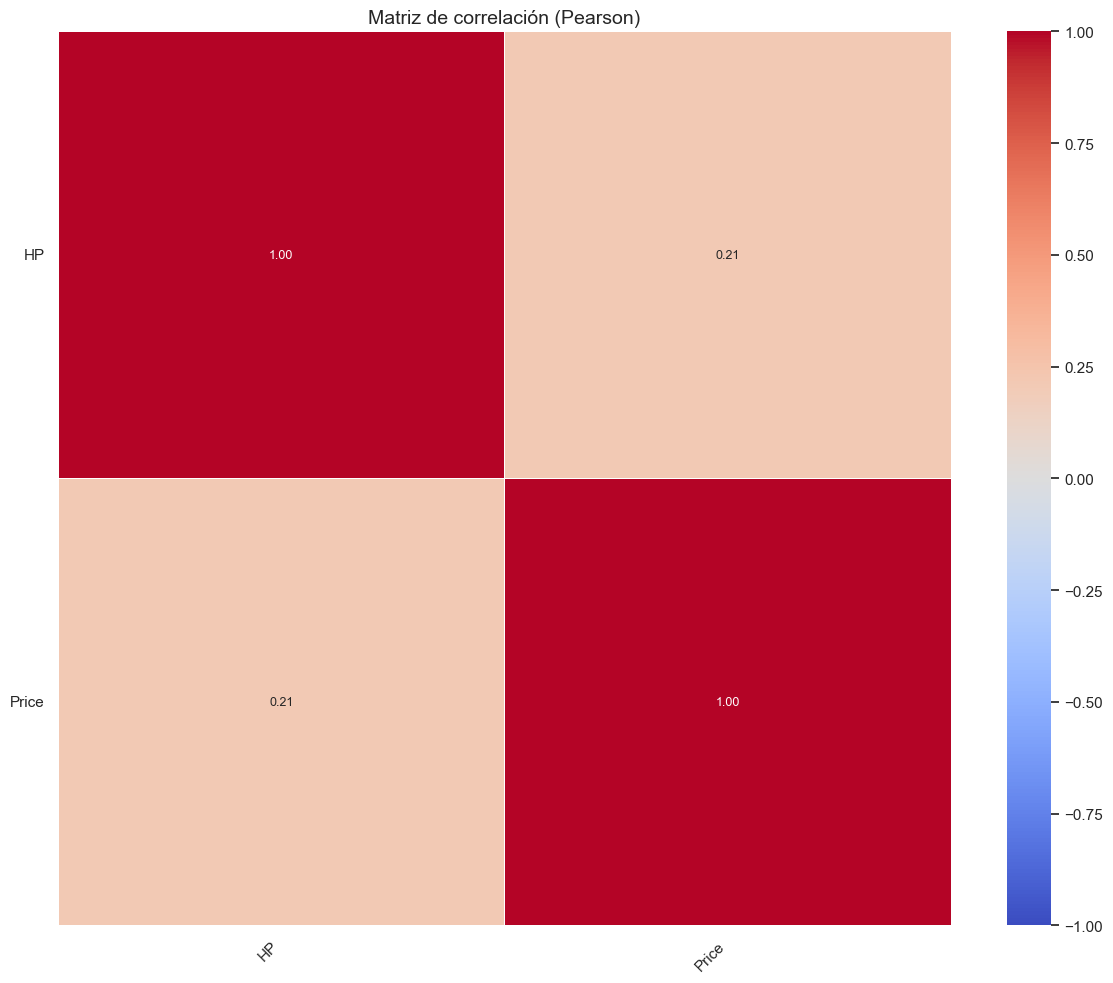

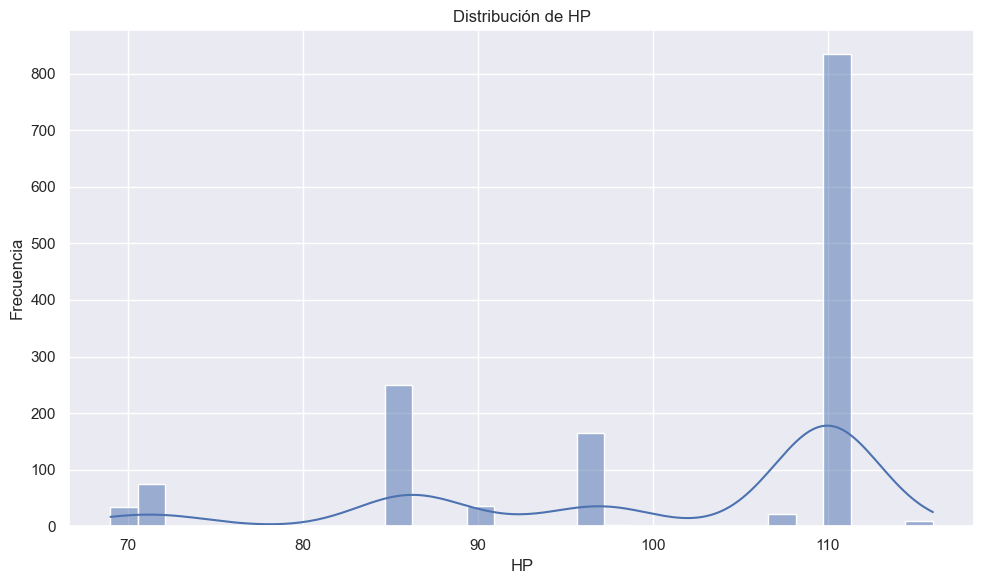

In [835]:
# Create a copy of the dataframe
df_filtered = df.copy()

# Remove rows where HP > 150
mask = df_filtered["HP"] <= 150
df_filtered = df_filtered[mask]

# Show some statistics before and after
print(f"Original df shape: {df.shape}")
print(f"Filtered df shape: {df_filtered.shape}")
print("\nHP statistics in original df:")
print(df["HP"].describe())
print("\nHP statistics in filtered df:")
print(df_filtered["HP"].describe())

matrix = show_correlation_matrix(df_filtered[["HP", "Price"]])
histogram_feature(df_filtered, "HP")

No vemos mucho que rescatarle a HP, poca correlación


También podemos buscar una relación entre la potencia y el peso del vehículo


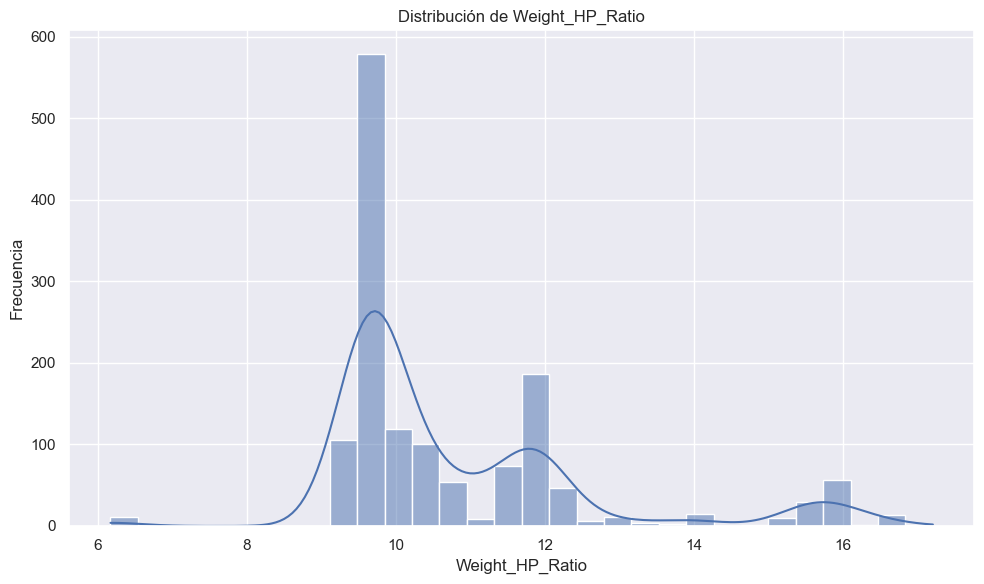

In [836]:
df["Weight_HP_Ratio"] = df["Weight"] / df["HP"]
histogram_feature(df, "Weight_HP_Ratio")

Otra podría ser el nivel de uso, cuántos kilometros tiene para la edad que tiene


Correlación de KM_per_Year con Price: 0.0720
Correlación de KM_per_Month con Price: -0.0234


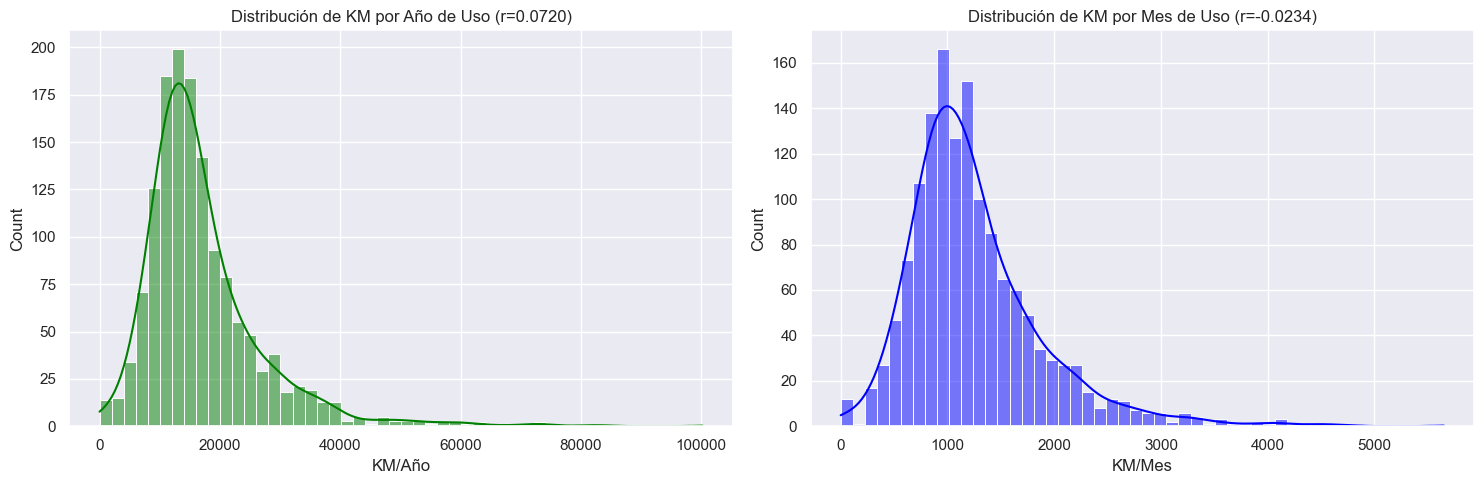

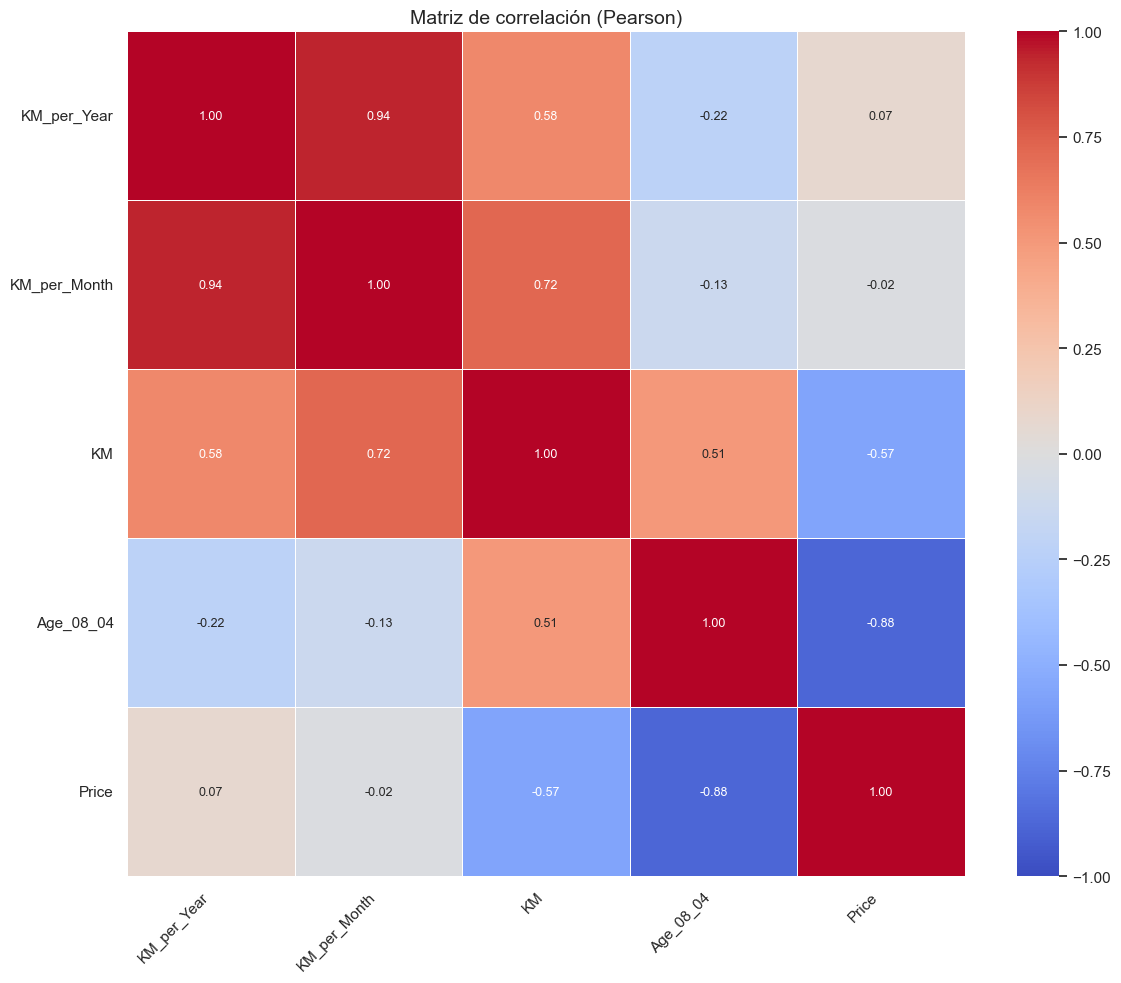

In [837]:
df["KM_per_Year"] = df["KM"] / df["Age_in_Years_08_04"].replace(0, 1)
df["KM_per_Month"] = df["KM"] / df["Age_08_04"].replace(0, 1)

# Mostrar correlación con Price
correlation_year = df["KM_per_Year"].corr(df["Price"])
correlation_month = df["KM_per_Month"].corr(df["Price"])
print(f"Correlación de KM_per_Year con Price: {correlation_year:.4f}")
print(f"Correlación de KM_per_Month con Price: {correlation_month:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["KM_per_Year"], bins=50, kde=True, ax=axes[0], color="green")
axes[0].set_title(f"Distribución de KM por Año de Uso (r={correlation_year:.4f})")
axes[0].set_xlabel("KM/Año")

sns.histplot(df["KM_per_Month"], bins=50, kde=True, ax=axes[1], color="blue")
axes[1].set_title(f"Distribución de KM por Mes de Uso (r={correlation_month:.4f})")
axes[1].set_xlabel("KM/Mes")

plt.tight_layout()
plt.show()

usage_correlations = show_correlation_matrix(
    df[["KM_per_Year", "KM_per_Month", "KM", "Age_08_04", "Price"]]
)

Casi nada de correlación, no es por aquí.


In [838]:
df = df.drop(columns=["KM_per_Year", "KM_per_Month"])

In [839]:
len(df.columns)

37

Por el sentido común, y por el scatter plot de abajo, creemos que el kilometraje y el precio no tienen una relación lineal, el precio en kilometrajes bajos es muy sensible, pero en kilometrajes altos se estabiliza


Se nos ocurren dos alternativas. Una es considerarla cuadrática e intentar mejorarla con un sqrt. La otra es tratar de aplicar una hipérbola de una función racional. Veamos qué tal quedan con eso.


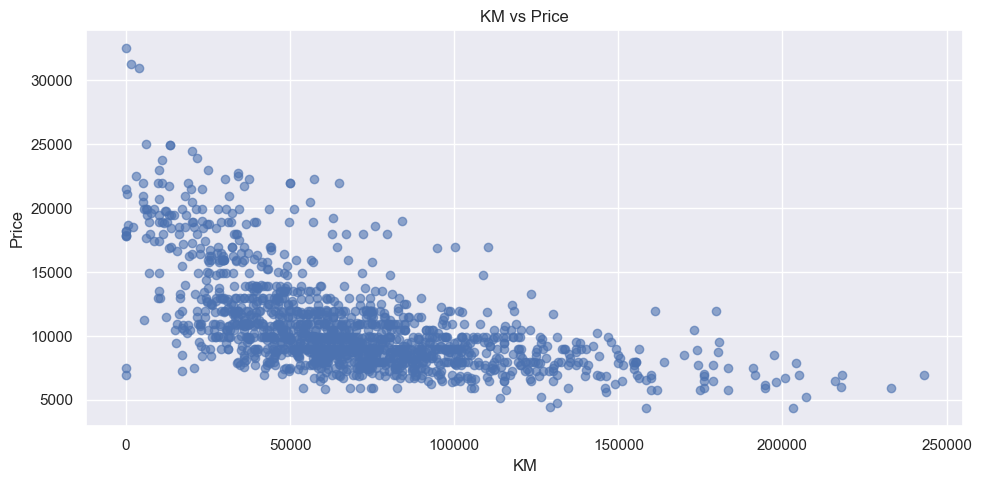

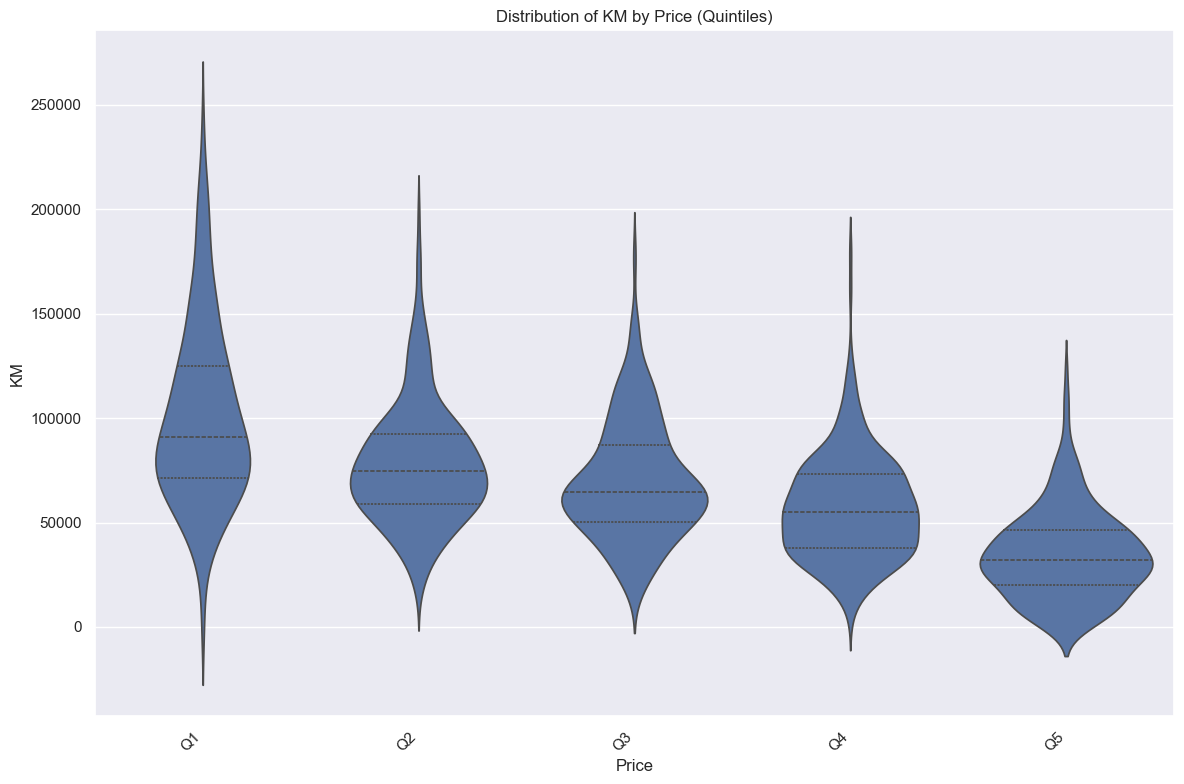

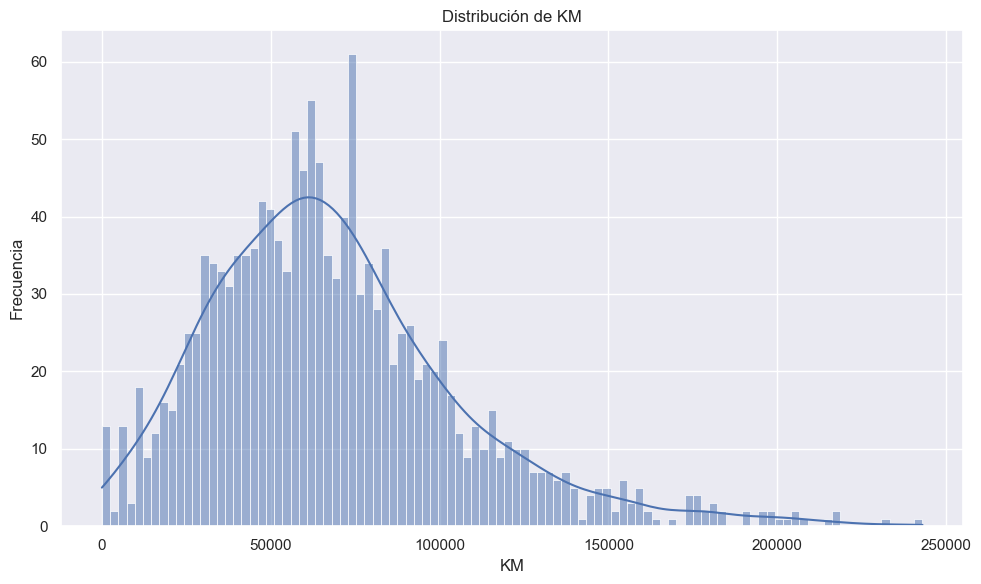

In [840]:
scatter_feature(df, "KM", "Price")
violinplot_feature(df, "KM")
histogram_feature(df, "KM", bins=100)

Aplicamos la raíz cuadrada


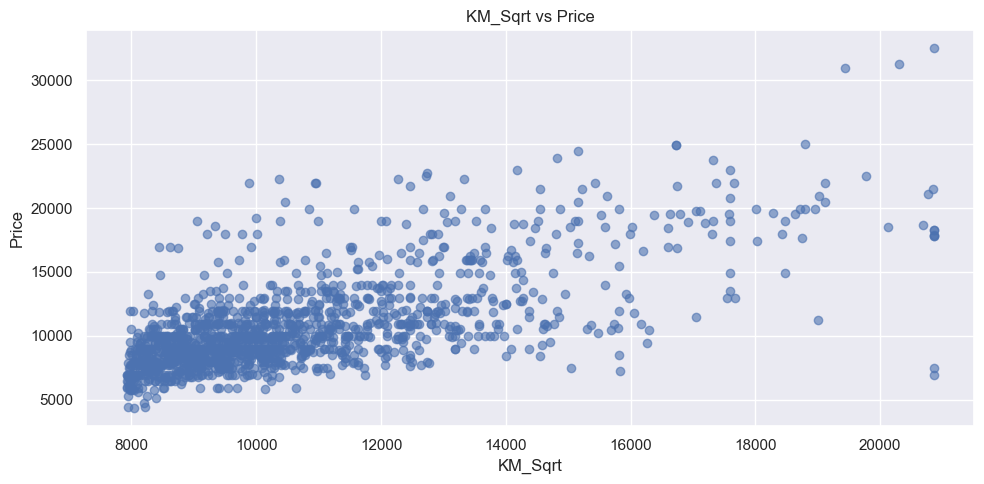

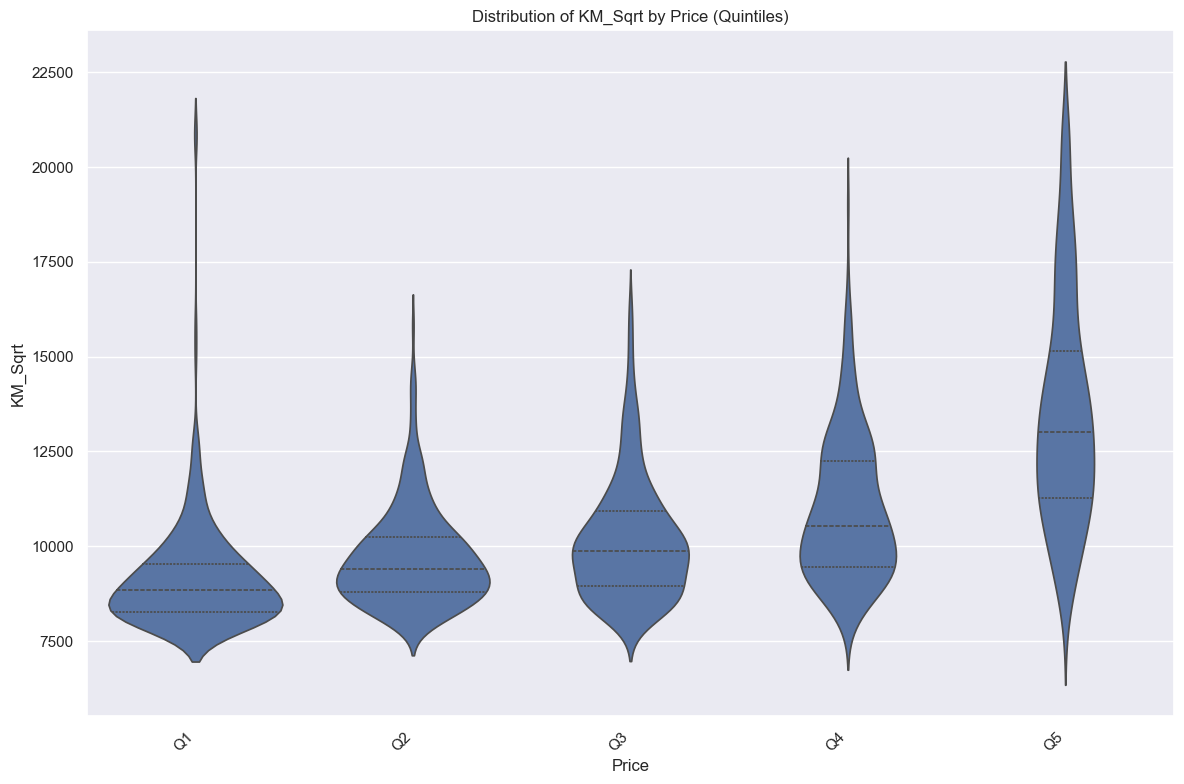

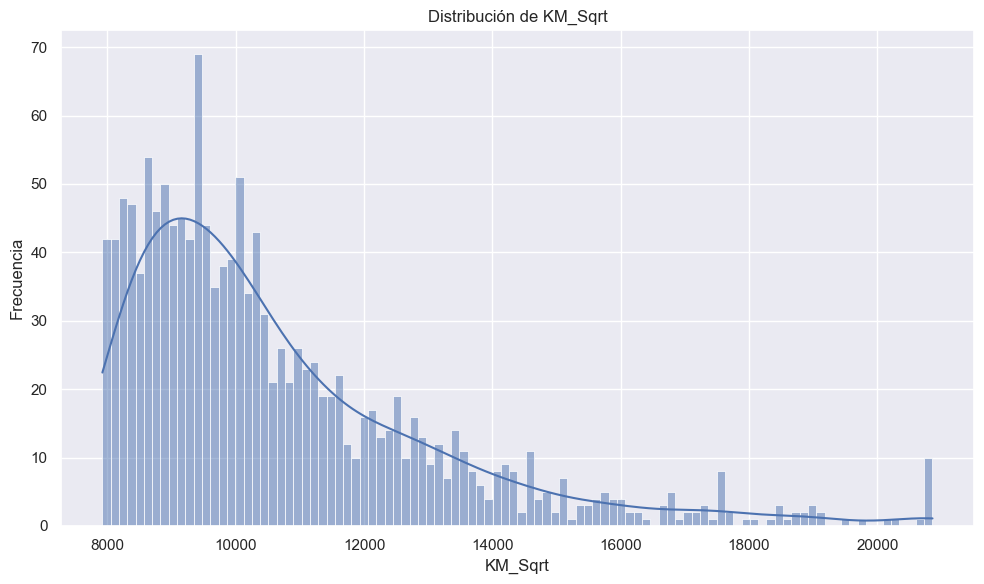

In [ ]:
df["KM_Sqrt"] = np.sqrt(df["KM"])
scatter_feature(df, "KM_Sqrt")
violinplot_feature(df, "KM_Sqrt")
histogram_feature(df, "KM_Sqrt", bins=100)

Veamos con un logaritmo


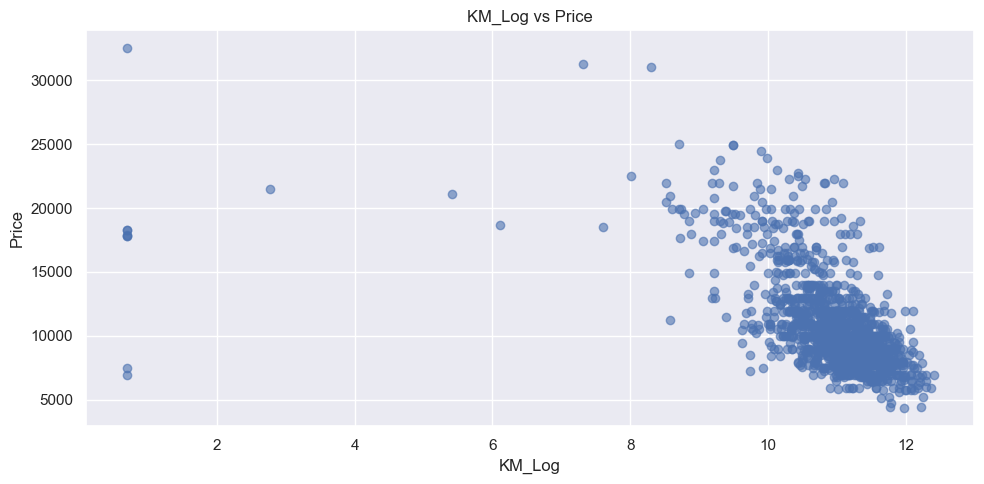

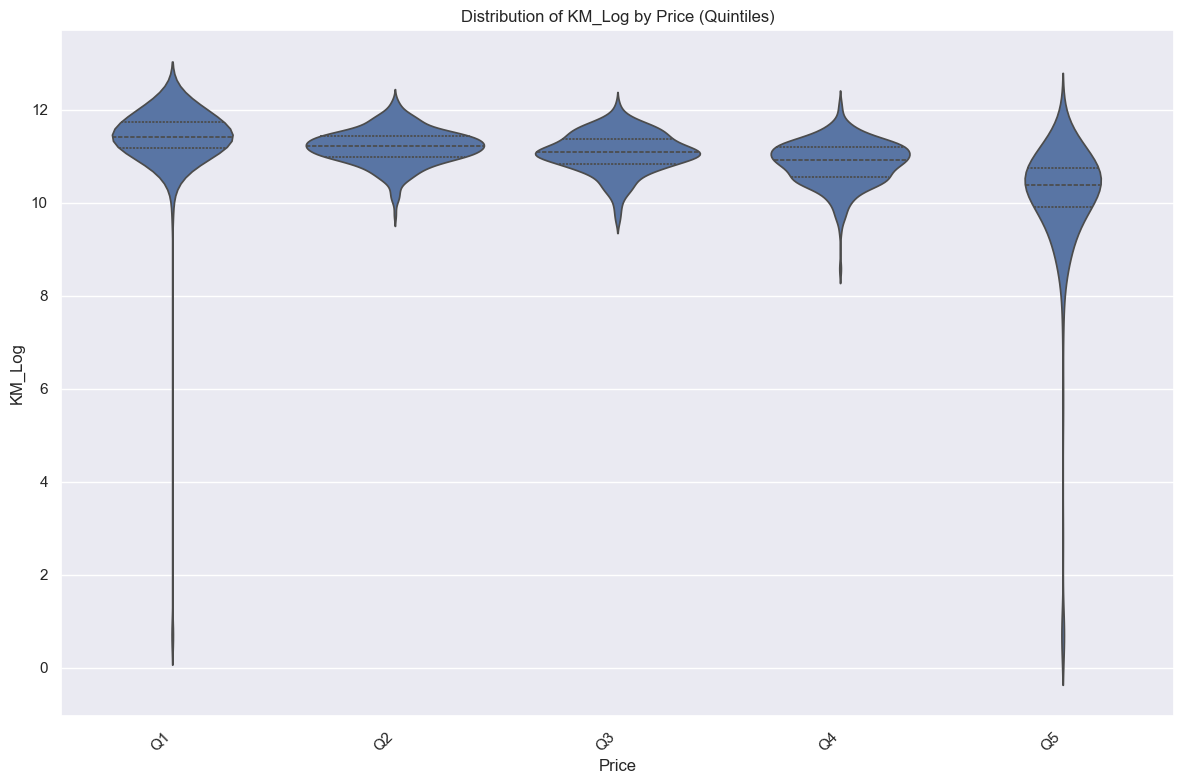

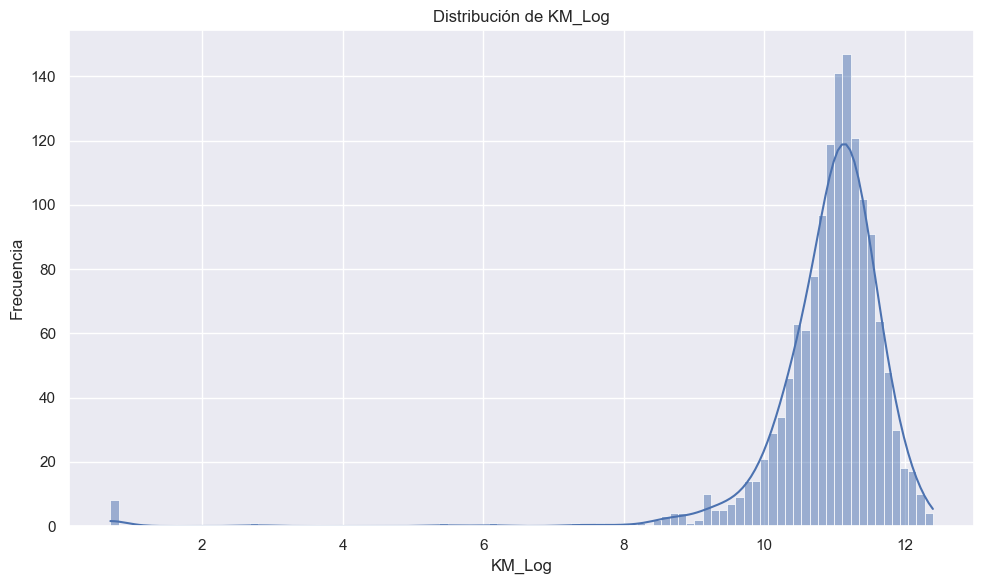

In [842]:
df["KM_Log"] = np.log1p(df["KM"])
scatter_feature(df, "KM_Log")
violinplot_feature(df, "KM_Log")
histogram_feature(df, "KM_Log", bins=100)

Vemos la correlación


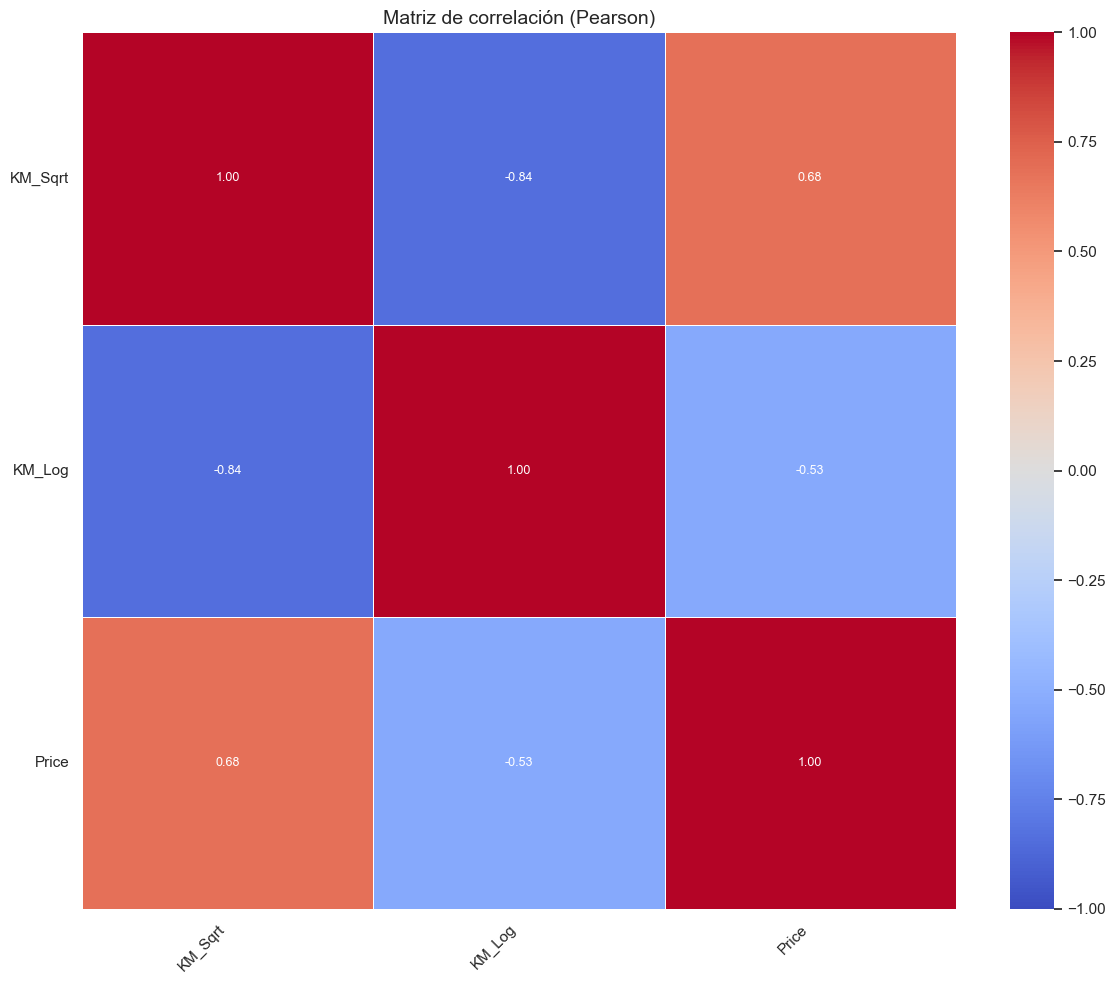

In [843]:
matrix = show_correlation_matrix(df[["KM_Sqrt", "KM_Log", "Price"]])

KM_Log fue un error, nos deshacemos


In [844]:
df = df.drop(columns=["KM_Log"])

Exploremos un poco weight


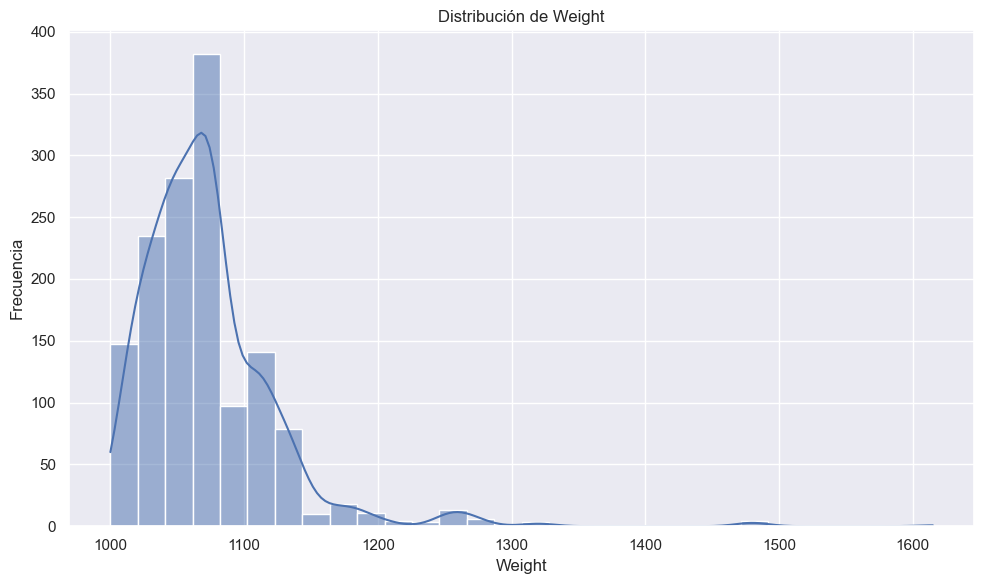

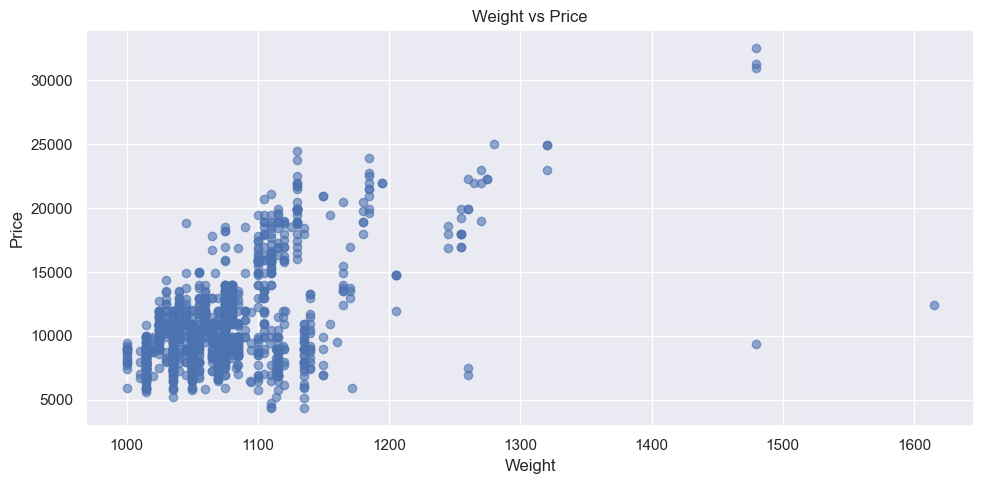

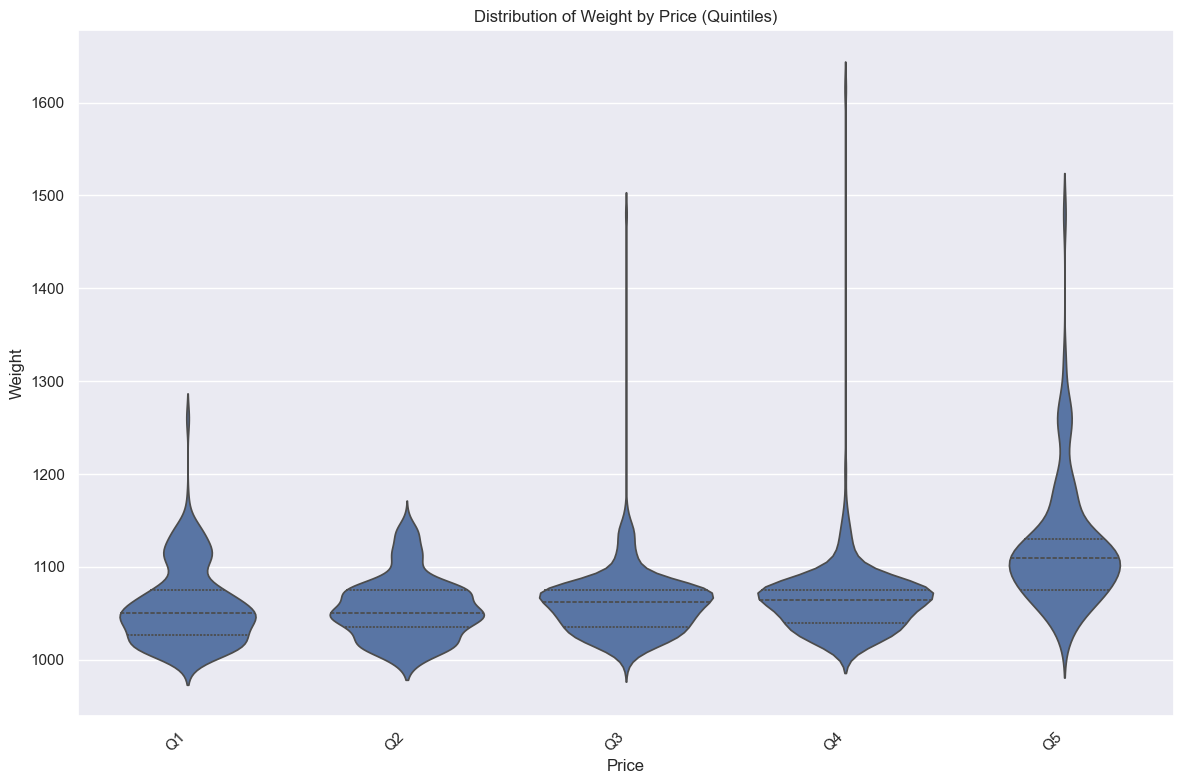

In [845]:
histogram_feature(df, "Weight")
scatter_feature(df, "Weight", "Price")
violinplot_feature(df, "Weight")

Más allá de que haya outliers, no se ve una relación significativa con el price y con los quintiles, no le vemos mucho valor a weight.


In [846]:
# Calcular la correlación de todas las columnas numéricas con Weight
weight_corr = df.corr(numeric_only=True)["Weight"].abs().sort_values(ascending=False)
print(weight_corr.head(15))

Weight                1.000000
cc                    0.651570
Quarterly_Tax         0.626134
Price                 0.581198
High_Tax              0.528546
Mfg_Year              0.473478
Age_in_Years_08_04    0.472823
Age_08_04             0.470253
Automatic_airco       0.430479
Equip_Score_sqrt      0.336340
Equipment_Count       0.314345
Airco                 0.310062
Doors                 0.302618
Weight_HP_Ratio       0.299430
Boardcomputer         0.274324
Name: Weight, dtype: float64


Veamos cómo está distribuido Age


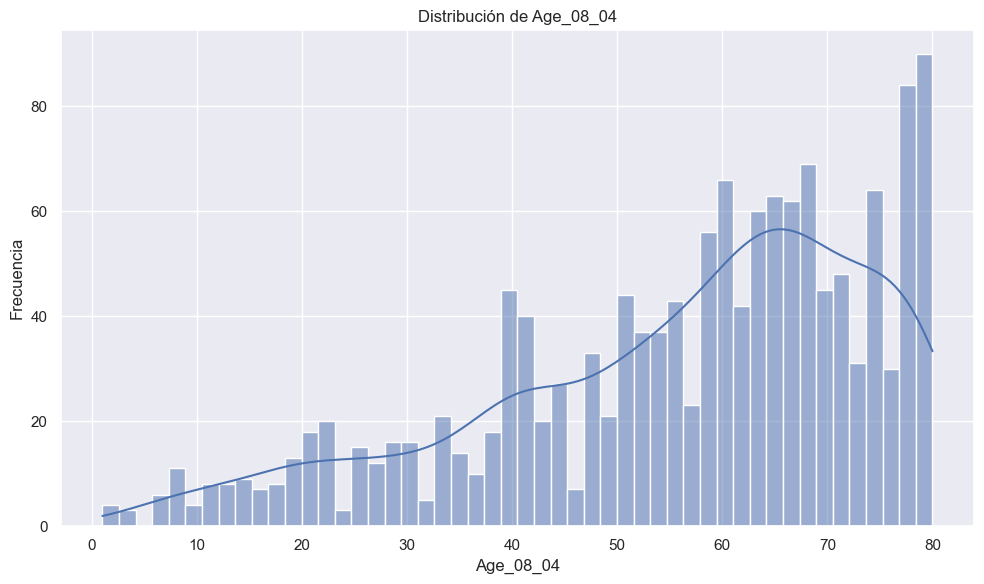

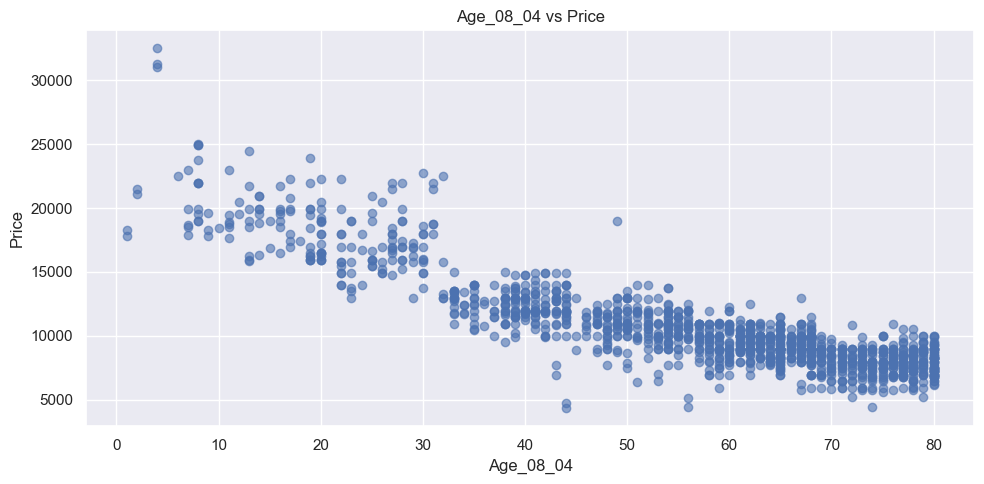

In [847]:
histogram_feature(df, "Age_08_04", bins=50)
scatter_feature(df, "Age_08_04")

También nos quedó pendiente la feature fuel type, vamos a hacerle dummies porque es categórica


In [848]:
fuel_dummies = pd.get_dummies(
    df["Fuel_Type"], prefix="Fuel_Type", dtype=int, drop_first=True
)
df = pd.concat([df, fuel_dummies], axis=1)

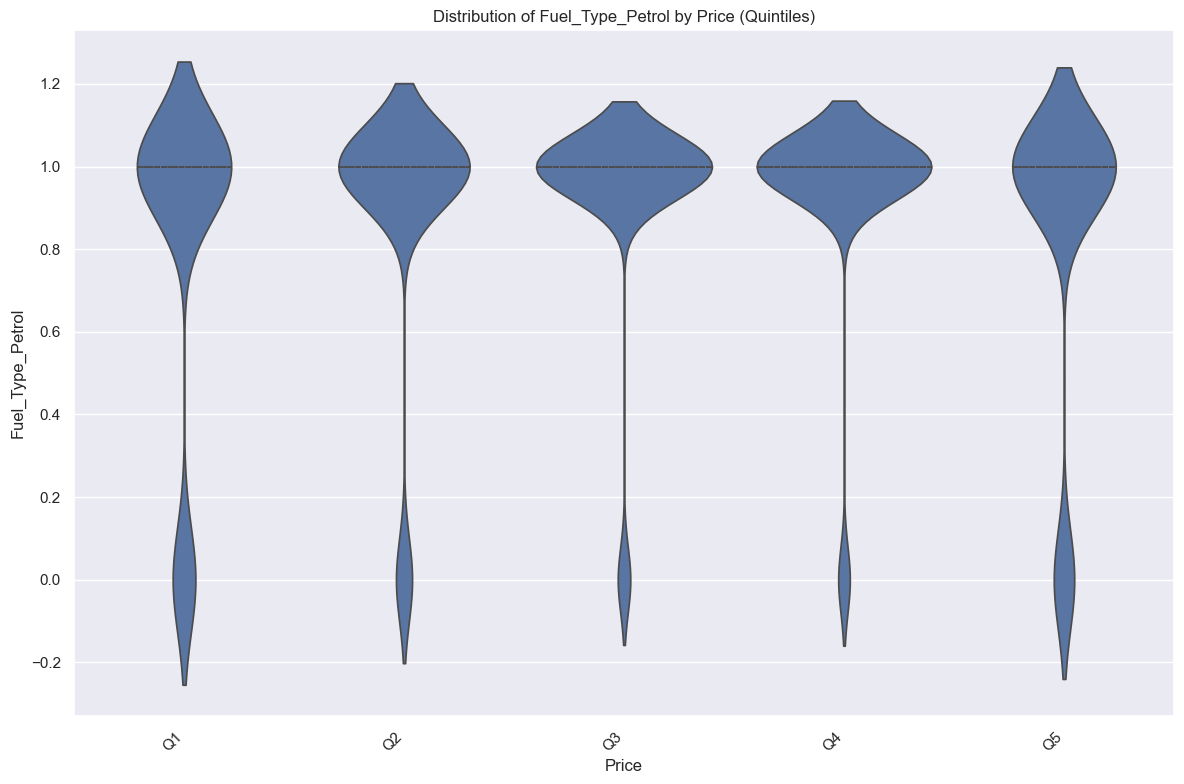

In [849]:
violinplot_feature(df, "Fuel_Type_Petrol")

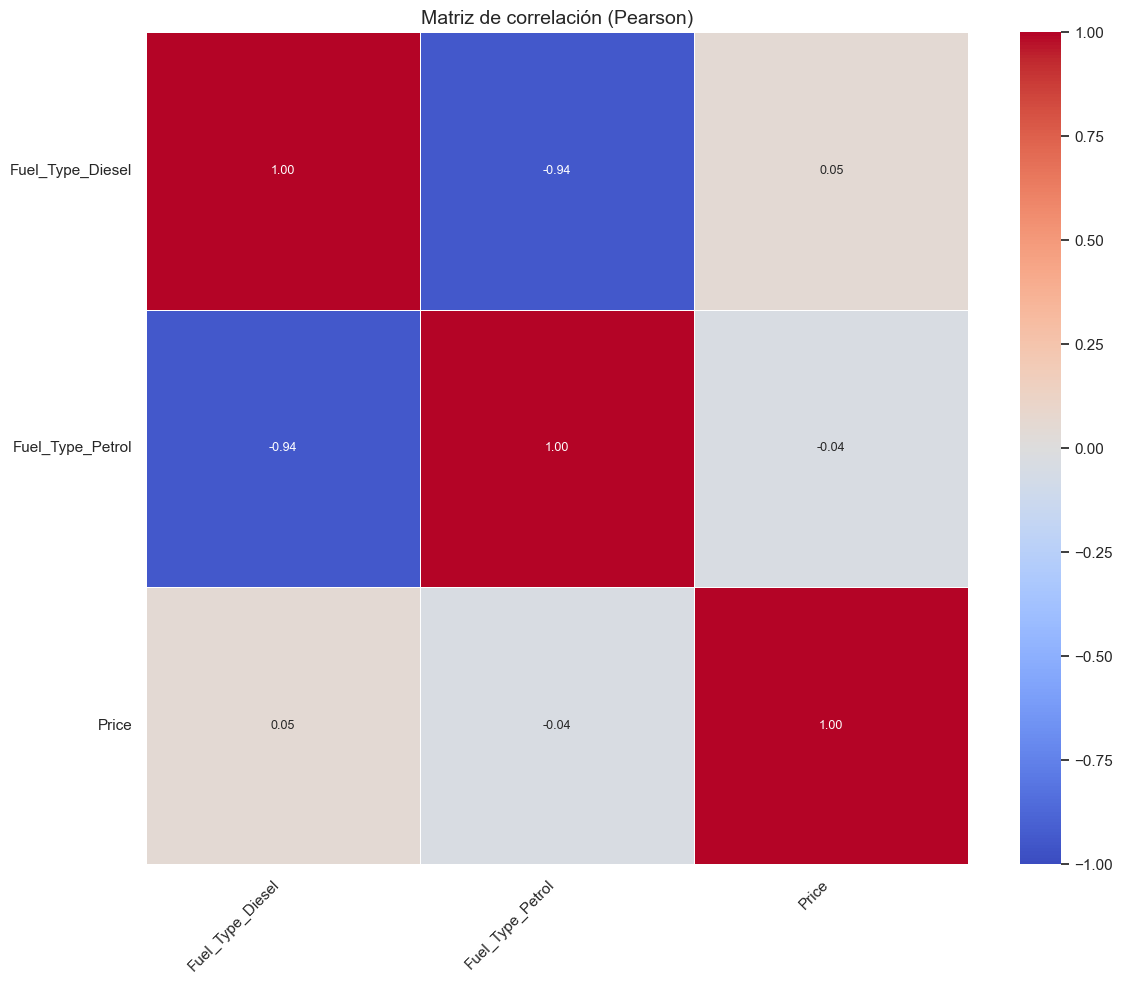

In [850]:
matrix = show_correlation_matrix(df[["Fuel_Type_Diesel", "Fuel_Type_Petrol", "Price"]])

Qué más nos falta ver


In [851]:
df.columns
df.dtypes.head()

Model        object
Price         int64
Age_08_04     int64
Mfg_Year      int64
KM            int64
dtype: object

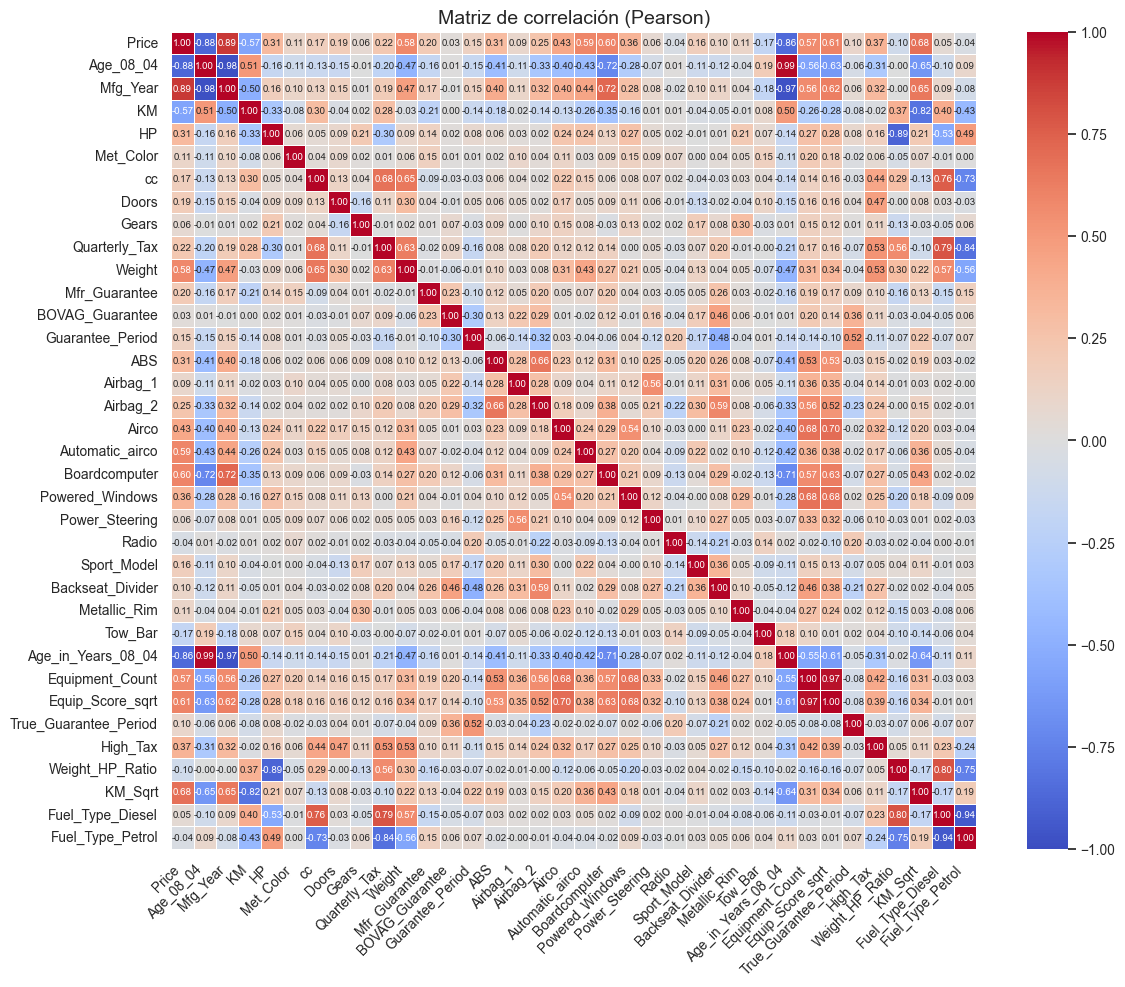

In [852]:
matrix = show_correlation_matrix(df)

Veamos una combinación de Airbags


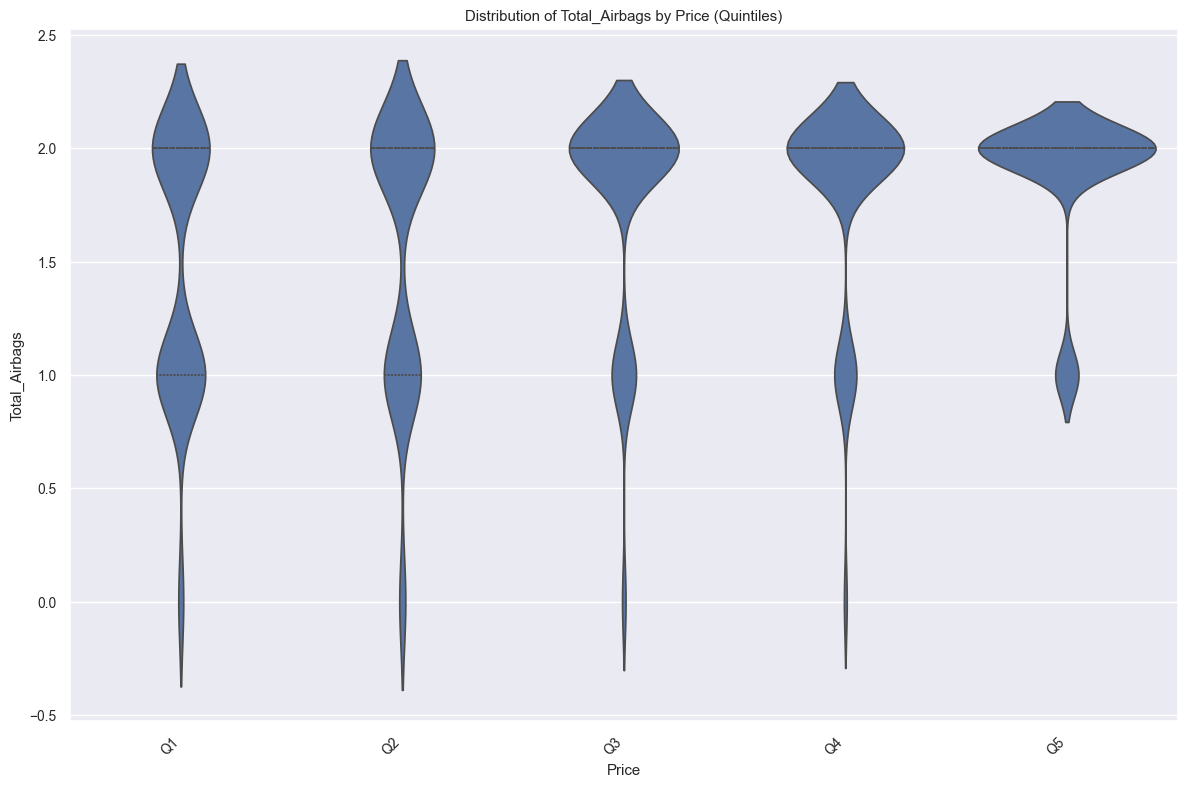

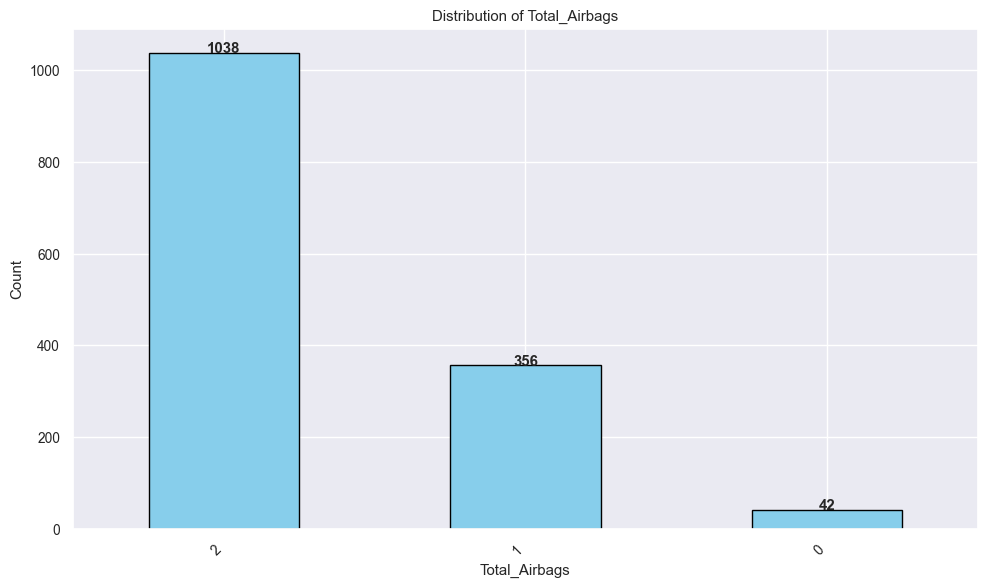

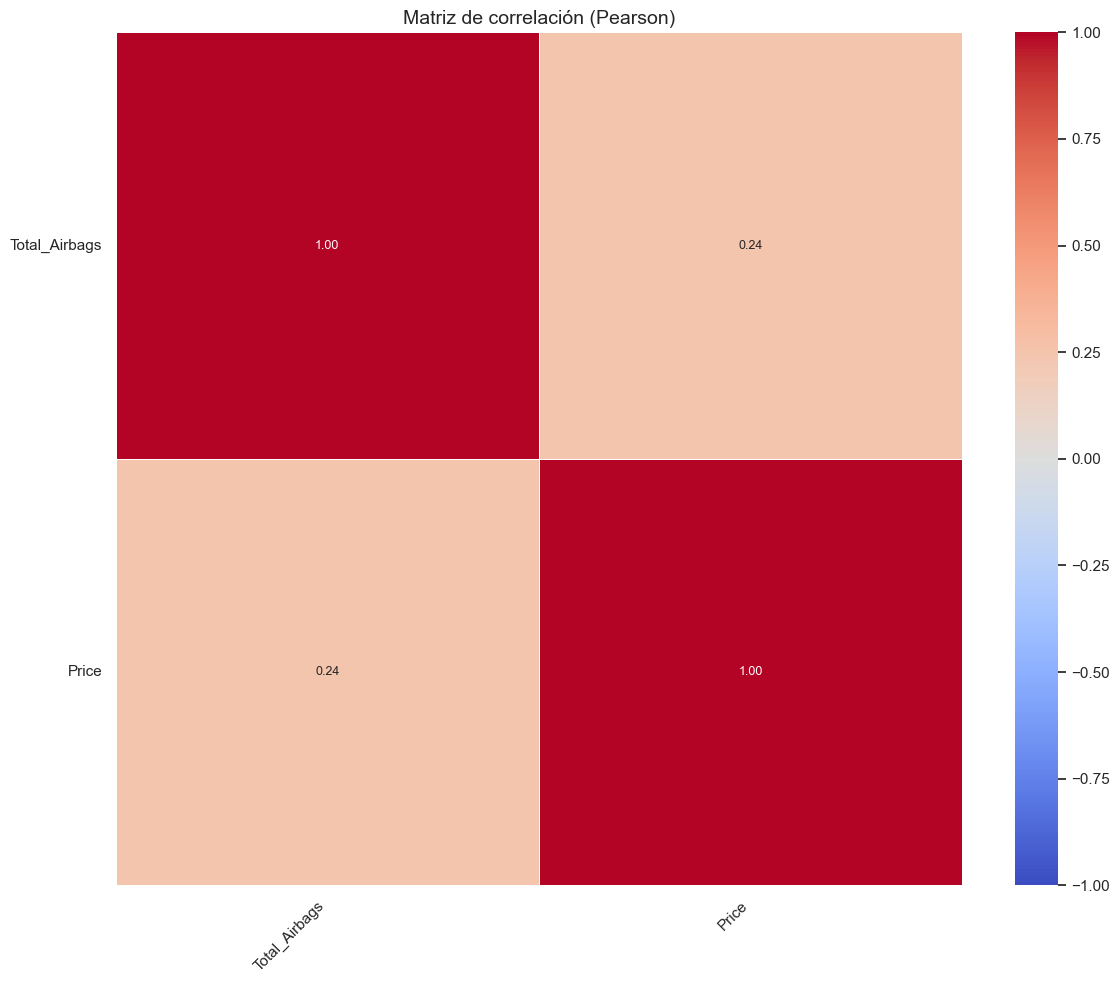

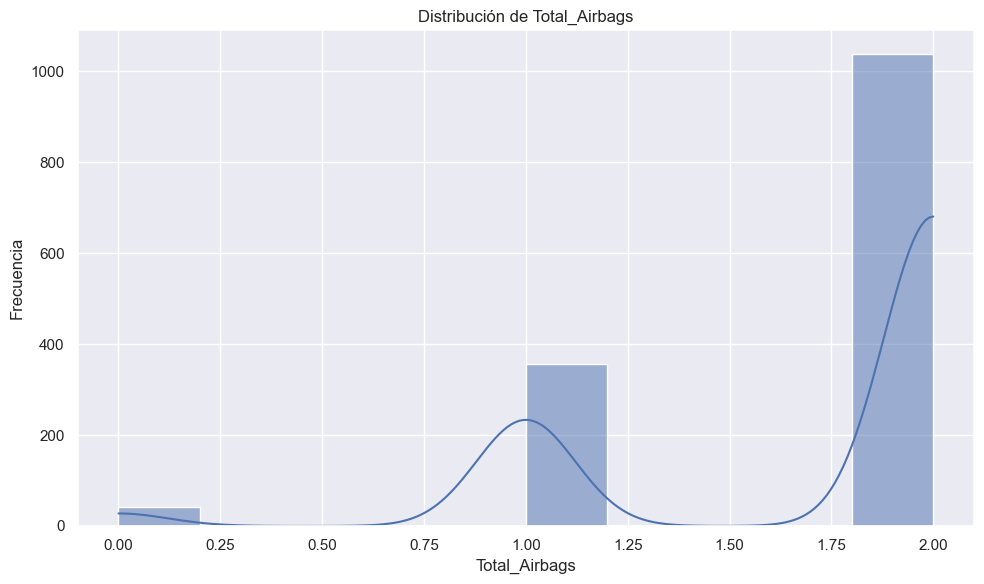

In [853]:
# Create new feature combining airbags
df["Total_Airbags"] = df["Airbag_1"] + df["Airbag_2"]

# Create violin plot for Total_Airbags
violinplot_feature(df, "Total_Airbags")

# Create bar plot for Total_Airbags
barplot_feature(df, "Total_Airbags")

# Show correlation with Price
matrix = show_correlation_matrix(df[["Total_Airbags", "Price"]])

histogram_feature(df, "Total_Airbags", bins=10)

In [854]:
df.dtypes

Model                      object
Price                       int64
Age_08_04                   int64
Mfg_Year                    int64
KM                          int64
Fuel_Type                  object
HP                          int64
Met_Color                   int64
cc                          int64
Doors                       int64
Gears                       int64
Quarterly_Tax               int64
Weight                      int64
Mfr_Guarantee               int64
BOVAG_Guarantee             int64
Guarantee_Period            int64
ABS                         int64
Airbag_1                    int64
Airbag_2                    int64
Airco                       int64
Automatic_airco             int64
Boardcomputer               int64
Powered_Windows             int64
Power_Steering              int64
Radio                       int64
Sport_Model                 int64
Backseat_Divider            int64
Metallic_Rim                int64
Tow_Bar                     int64
target_bins   

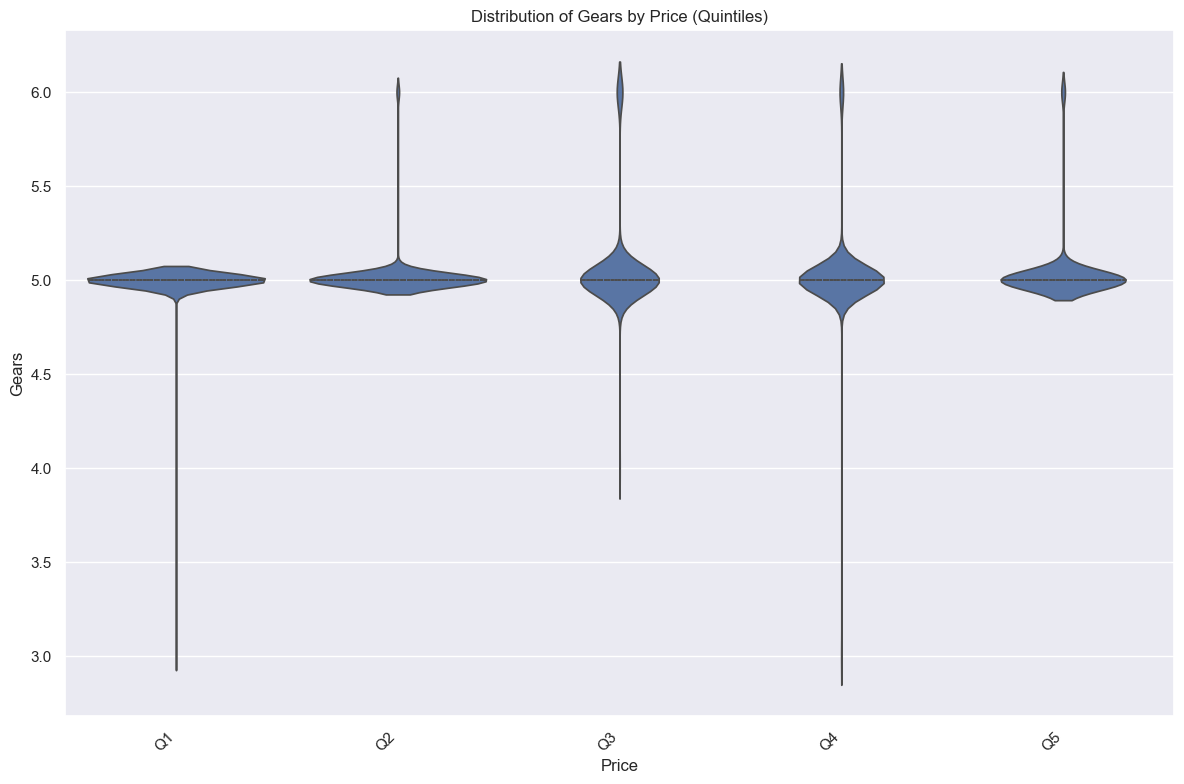

In [855]:
violinplot_feature(df, "Gears")

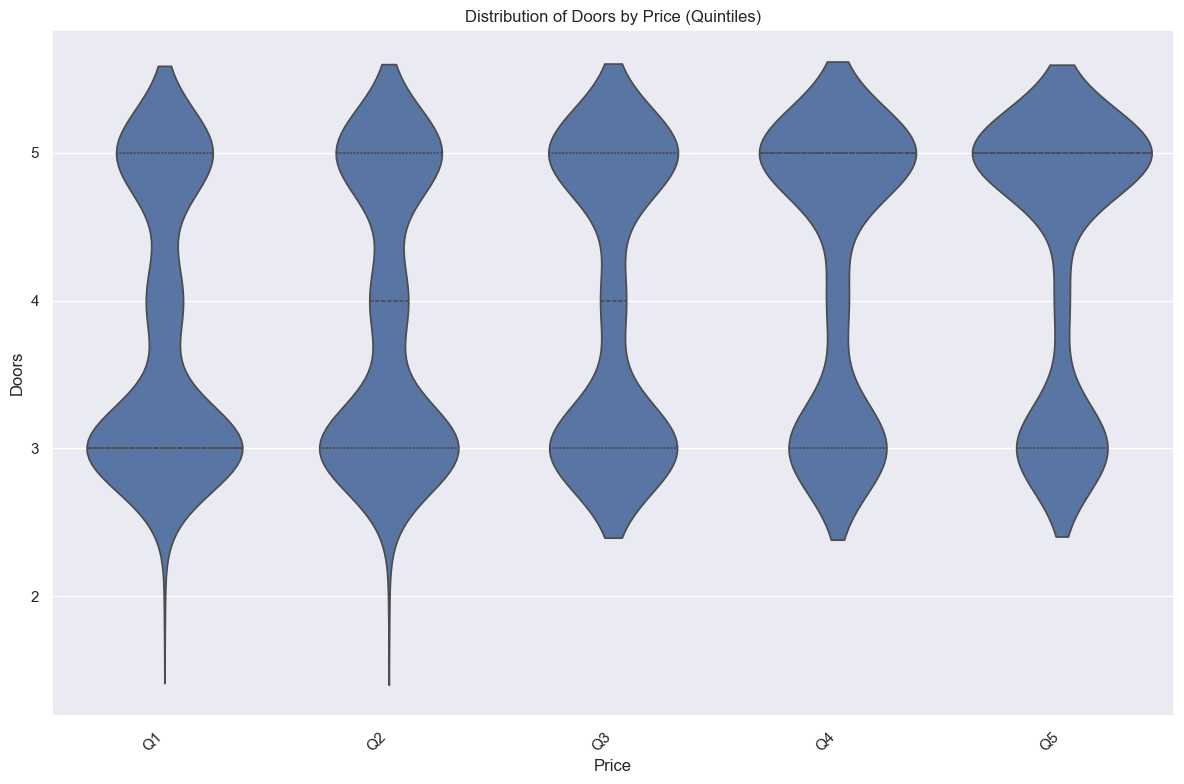

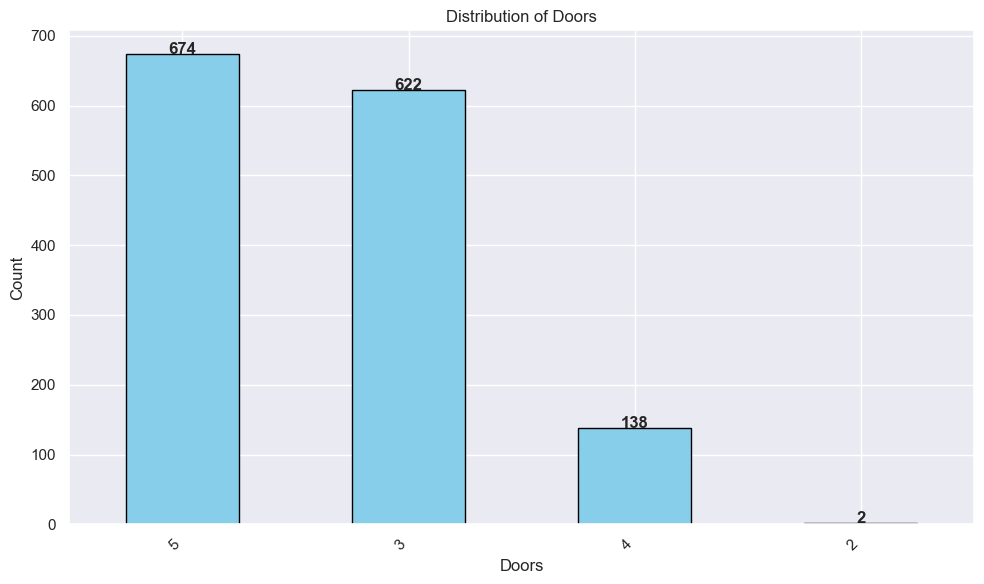

In [856]:
violinplot_feature(df, "Doors")
barplot_feature(df, "Doors")

Buscamos más información sobre los casos en los que hay 4 puertas


In [857]:
# Display rows where Doors equals 4
rows_with_4_doors = df[df["Doors"] == 4]
print(f"Number of cars with 4 doors: {len(rows_with_4_doors)}")
print("\nSample of cars with 4 doors:")
if len(rows_with_4_doors) > 0:
    display(rows_with_4_doors[["Model", "Price", "Mfg_Year", "KM", "Doors"]].head())
else:
    print("No cars found with 4 doors")

Number of cars with 4 doors: 138

Sample of cars with 4 doors:


Model  Price  Mfg_Year  \
133  TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfo...  15950      2003   
143  TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA COMF ...  18500      2003   
149  TOYOTA Corolla 1.6 16V VVT I SEDAN SOL AUT4 4/...  20950      2003   
155  TOYOTA Corolla 1.4 16V VVT I SEDAN TERRA COMF ...  16868      2003   
156   TOYOTA Corolla 1.6 16V VVT I SEDAN SOL 4/5-Doors  19500      2003   

        KM  Doors  
133  29371      4  
143  20629      4  
149  17896      4  
155  13157      4  
156  13000      4

In [858]:
df.iloc[133].Model

'TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors'

In [859]:
# Change values in Doors column: 4 -> 5 and 2 -> 3
df.loc[df["Doors"] == 4, "Doors"] = 5
df.loc[df["Doors"] == 2, "Doors"] = 3

También vale la pena revisar Price


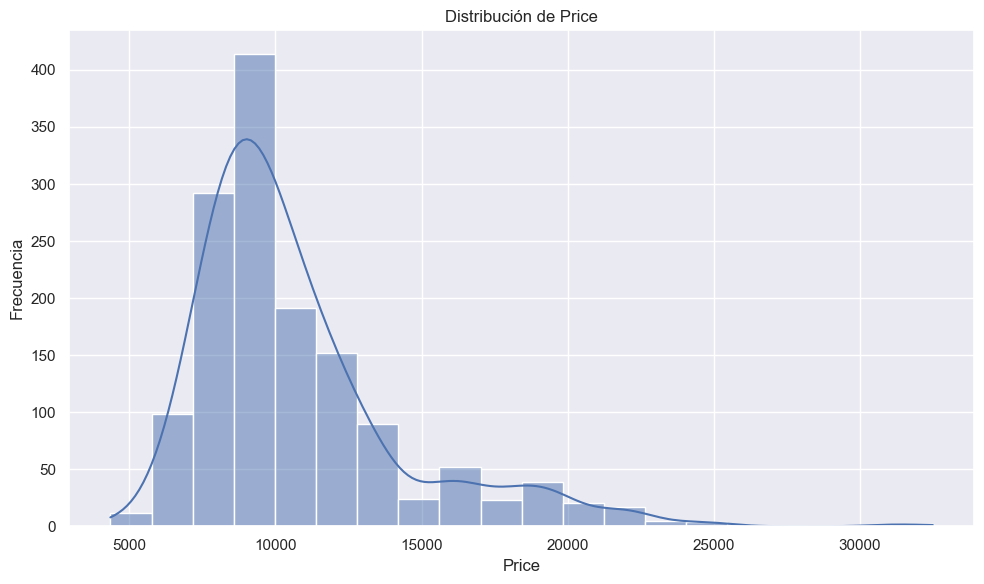

In [860]:
histogram_feature(df, "Price", bins=20)

In [861]:
len(df)

1436

El análisis residual de nuestras corridas nos indica un desbalanceo en Price, vamos a ver qué tanto lo corregimos sin afectar mucho a las otras features.


## Limpieza


Ahora mismo nuestro dataset se ve así


In [862]:
df.describe().T

count          mean           std          min  \
Price                  1436.0  10730.824513   3626.964585  4350.000000   
Age_08_04              1436.0     55.947075     18.599988     1.000000   
Mfg_Year               1436.0   1999.625348      1.540722  1998.000000   
KM                     1436.0  68533.259749  37506.448872     1.000000   
HP                     1436.0    101.502089     14.981080    69.000000   
Met_Color              1436.0      0.674791      0.468616     0.000000   
cc                     1436.0   1566.852368    187.300970  1300.000000   
Doors                  1436.0      4.130919      0.991738     3.000000   
Gears                  1436.0      5.026462      0.188510     3.000000   
Quarterly_Tax          1436.0     87.122563     41.128611    19.000000   
Weight                 1436.0   1072.459610     52.641120  1000.000000   
Mfr_Guarantee          1436.0      0.409471      0.491907     0.000000   
BOVAG_Guarantee        1436.0      0.895543      0.305959     0.000000   
Guarantee_Period       1436.0      3.815460      3.011025     3.000000   
ABS                    1436.0      0.813370      0.389750     0.000000   
Airbag_1               1436.0      0.970752      0.168559     0.000000   
Airbag_2               1436.0      0.722841      0.447751     0.000000   
Airco                  1436.0      0.508357      0.500104     0.000000   
Automatic_airco        1436.0      0.056407      0.230786     0.000000   
Boardcomputer          1436.0      0.294568      0.456007     0.000000   
Powered_Windows        1436.0      0.561978      0.496317     0.000000   
Power_Steering         1436.0      0.977716      0.147657     0.000000   
Radio                  1436.0      0.146240      0.353469     0.000000   
Sport_Model            1436.0      0.300139      0.458478     0.000000   
Backseat_Divider       1436.0      0.770195      0.420854     0.000000   
Metallic_Rim           1436.0      0.204735      0.403649     0.000000   
Tow_Bar                1436.0      0.277855      0.448098     0.000000   
Age_in_Years_08_04     1436.0      4.206825      1.572316     0.000000   
Equipment_Count        1436.0      7.155989      2.602205     0.000000   
Equip_Score_sqrt       1436.0      0.618917      0.194985     0.000000   
True_Guarantee_Period  1436.0      3.213788      2.368399     0.000000   
High_Tax               1436.0      0.545265      0.498120     0.000000   
Weight_HP_Ratio        1436.0     10.801589      1.804203     6.171875   
KM_Sqrt                1436.0  10677.935427   2458.365369  7921.716017   
Fuel_Type_Diesel       1436.0      0.107939      0.310411     0.000000   
Fuel_Type_Petrol       1436.0      0.880223      0.324814     0.000000   
Total_Airbags          1436.0      1.693593      0.520775     0.000000   

                                25%           50%           75%            max  
Price                   8450.000000   9900.000000  11950.000000   32500.000000  
Age_08_04                 44.000000     61.000000     70.000000      80.000000  
Mfg_Year                1998.000000   1999.000000   2001.000000    2004.000000  
KM                     43000.000000  63389.500000  87020.750000  243000.000000  
HP                        90.000000    110.000000    110.000000     192.000000  
Met_Color                  0.000000      1.000000      1.000000       1.000000  
cc                      1400.000000   1600.000000   1600.000000    2000.000000  
Doors                      3.000000      5.000000      5.000000       5.000000  
Gears                      5.000000      5.000000      5.000000       6.000000  
Quarterly_Tax             69.000000     85.000000     85.000000     283.000000  
Weight                  1040.000000   1070.000000   1085.000000    1615.000000  
Mfr_Guarantee              0.000000      0.000000      1.000000       1.000000  
BOVAG_Guarantee            1.000000      1.000000      1.000000       1.000000  
Guarantee_Period           3.000000      3.000000      3.000000      36.00000

In [863]:
df.dtypes.iloc[15:]

Guarantee_Period            int64
ABS                         int64
Airbag_1                    int64
Airbag_2                    int64
Airco                       int64
Automatic_airco             int64
Boardcomputer               int64
Powered_Windows             int64
Power_Steering              int64
Radio                       int64
Sport_Model                 int64
Backseat_Divider            int64
Metallic_Rim                int64
Tow_Bar                     int64
target_bins              category
Age_in_Years_08_04          int64
Equipment_Count             int64
Equip_Score_sqrt          float64
Has_Guarantee                bool
True_Guarantee_Period       int64
High_Tax                    int64
Weight_HP_Ratio           float64
KM_Sqrt                   float64
Fuel_Type_Diesel            int64
Fuel_Type_Petrol            int64
Total_Airbags               int64
dtype: object

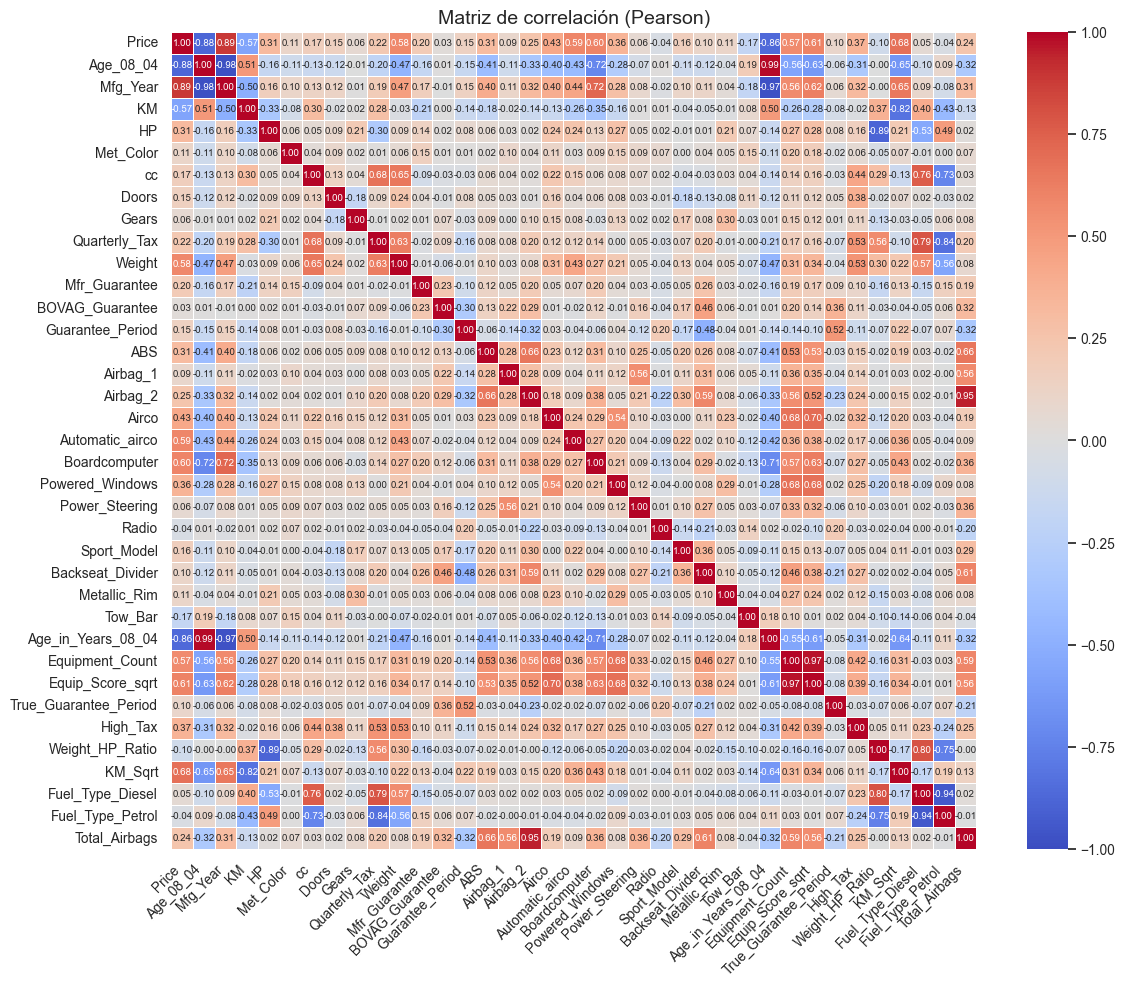

In [864]:
matrix = show_correlation_matrix(df)

Del trabajo anterior en el que tratamos de crear nuevas features y mejorarlas, vamos a ver cuáles son las mejores candidatas a limpiar


Tomamos las variables más correlacionadas con Price


In [865]:
correlations = df.corr(numeric_only=True)["Price"].abs().sort_values(ascending=False)

top_corr_vars = correlations.drop("Price").head(15)
print(top_corr_vars)

Mfg_Year              0.885159
Age_08_04             0.876590
Age_in_Years_08_04    0.864162
KM_Sqrt               0.679999
Equip_Score_sqrt      0.609351
Boardcomputer         0.601292
Automatic_airco       0.588262
Weight                0.581198
KM                    0.569960
Equipment_Count       0.566614
Airco                 0.429259
High_Tax              0.366086
Powered_Windows       0.356518
HP                    0.314990
ABS                   0.306138
Name: Price, dtype: float64


Muchas de las variables más correlacionadas de este top son variaciones de la misma información, nos quedamos con una de cada tipo, eligiendo por su distribución en general, y por su correlación


Mfg_Year, Age_08_04, Age_in_Years_08_04 son variaciones de la misma información y por ende presentan una alta colinealidad, nos tenemos que quedar con una sola.


In [866]:
df = df.drop(columns=["Mfg_Year", "Age_in_Years_08_04"])

KM y KM_Sqrt, nos quedamos con la última


In [867]:
df = df.drop(columns=["KM"])

Equip Score no nos está dando buenos resultados en el OLS, lo borramos también porque está correlacionado con las features de equipamiento que quedaron. Lo mismo con equipment count.


In [868]:
df = df.drop(columns=["Equip_Score_sqrt", "Equipment_Count"])

El experimiento High Tax no nos dio buenos resultados tampoco, lo borramos para evitar su correlación alta con quarterly tax


In [869]:
df = df.drop(columns=["High_Tax"])

Los dummies de Fuel Type no tienen una correlación alta con el precio, los borramos


In [870]:
df = df.drop(columns=fuel_dummies)

True guarantee period no dió buenos resultados y es derivada de las features de garantía, la sacamos


In [871]:
df = df.drop(columns=["True_Guarantee_Period"])

Vamos sacando también las features que encontramos desbalanceadas y que no valía la pena traatar de recuperar


In [872]:
df = df.drop(columns=["Tow_Bar", "Backseat_Divider", "Radio"])

Relación peso potencia no nos dió buenos resultados ni en OLS ni en Lasso, lo borramos


In [873]:
df = df.drop(columns=["Weight_HP_Ratio"])

Total airbags nos quedó desbalanceado y sirvió para poco y nada, lo sacamos también


In [874]:
df = df.drop(columns=["Total_Airbags"])

Los de garantía no los trabajamos para sacarles alguna utilidad, los quitamos


In [875]:
df = df.drop(
    columns=["Mfr_Guarantee", "BOVAG_Guarantee", "Guarantee_Period", "Has_Guarantee"]
)

### Limpiar features más relevantes


Empezamos por Price que el análisis residual nos muestra mucho sesgo.


Antes


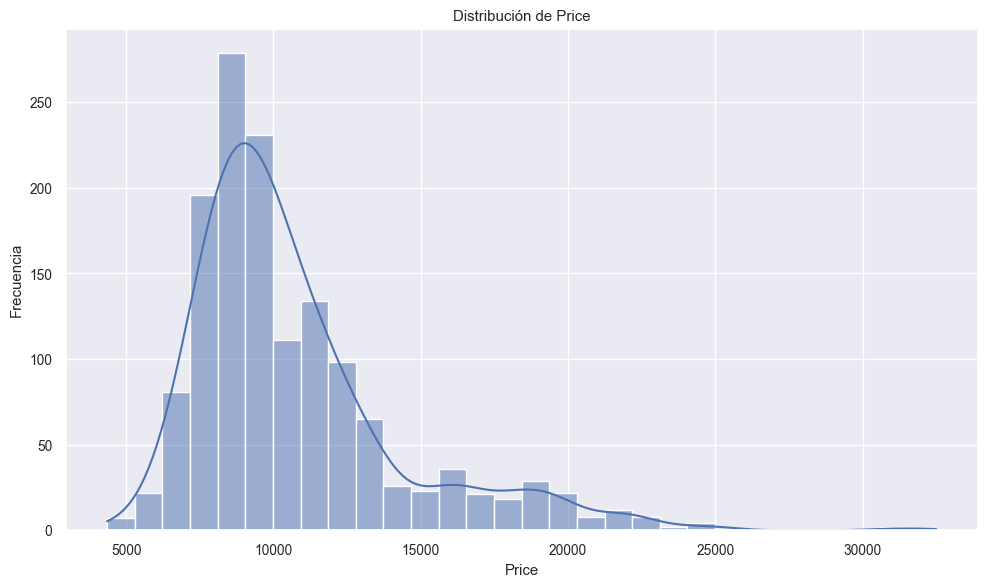

Después


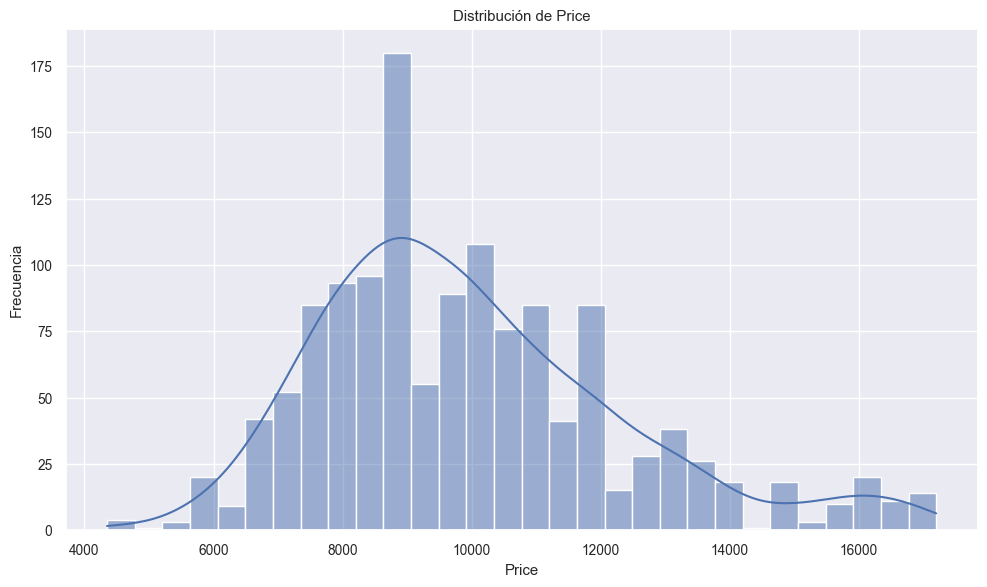

In [876]:
from utils import boxcox_transform, clean_outliers_iqr, clean_outliers_zscore

print("Antes")
histogram_feature(df, "Price")
df = df[clean_outliers_iqr(df["Price"])[1]]
print("Después")
histogram_feature(df, "Price")

Antes


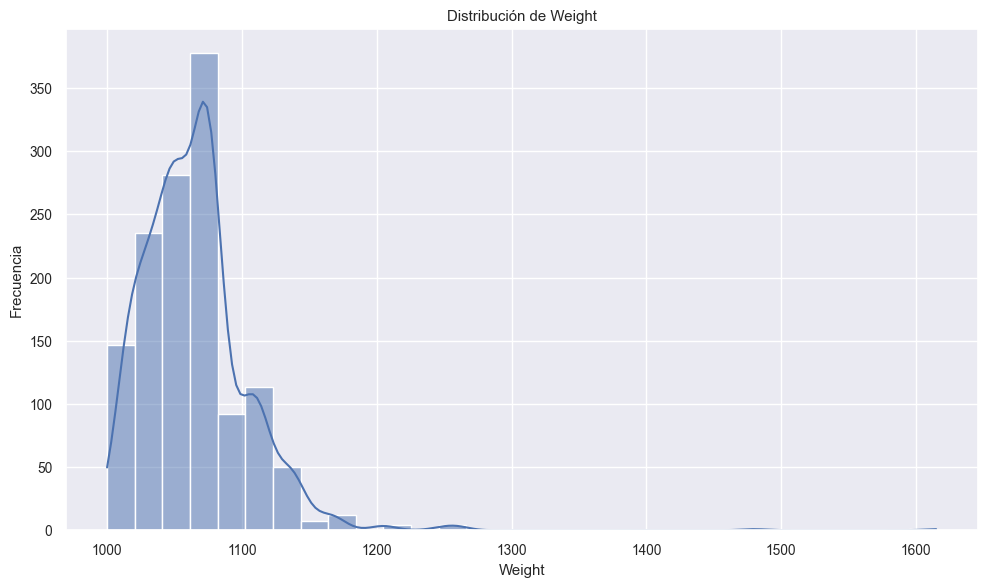

Después


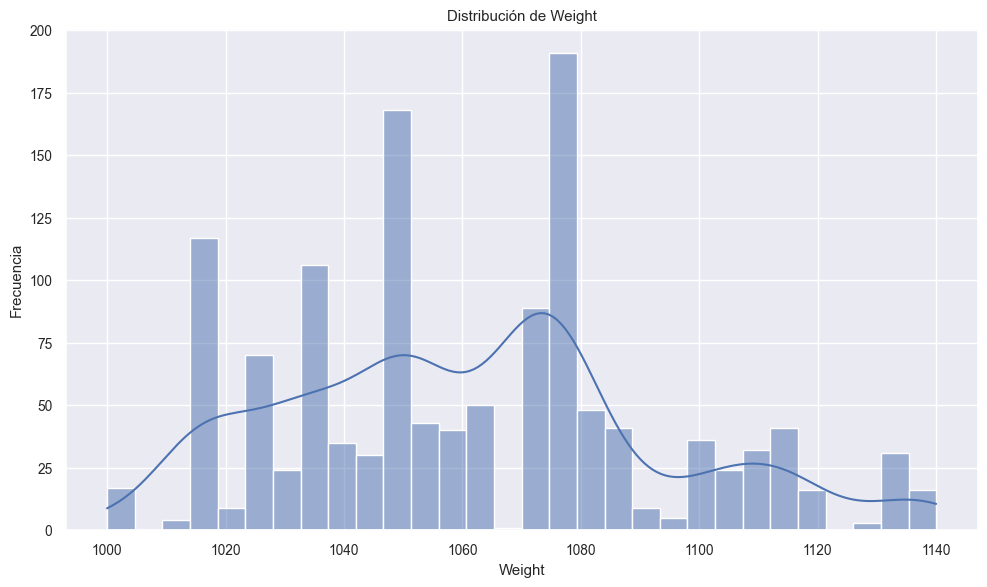

In [877]:
from utils import clean_outliers_iqr

print("Antes")
histogram_feature(df, "Weight")
df = df[clean_outliers_iqr(df["Weight"])[1]]
print("Después")
histogram_feature(df, "Weight")

### Normalizar


Vemos en qué dimensiones se manejan nuestras features


In [878]:
df.describe().T

count          mean          std          min          25%  \
Price            1296.0   9893.494599  2312.145915  4350.000000  8250.000000   
Age_08_04        1296.0     59.521605    15.020537    13.000000    50.000000   
HP               1296.0    100.684414    12.866344    69.000000    86.000000   
Met_Color        1296.0      0.667438     0.471313     0.000000     0.000000   
cc               1296.0   1548.842593   174.865119  1300.000000  1400.000000   
Doors            1296.0      4.103395     0.995024     3.000000     3.000000   
Gears            1296.0      5.023920     0.184869     3.000000     5.000000   
Quarterly_Tax    1296.0     82.810185    34.126217    19.000000    69.000000   
Weight           1296.0   1061.446759    31.710641  1000.000000  1035.000000   
ABS              1296.0      0.797068     0.402338     0.000000     1.000000   
Airbag_1         1296.0      0.969136     0.173016     0.000000     1.000000   
Airbag_2         1296.0      0.708333     0.454705     0.000000     0.000000   
Airco            1296.0      0.464506     0.498931     0.000000     0.000000   
Automatic_airco  1296.0      0.013117     0.113821     0.000000     0.000000   
Boardcomputer    1296.0      0.243056     0.429094     0.000000     0.000000   
Powered_Windows  1296.0      0.526235     0.499504     0.000000     0.000000   
Power_Steering   1296.0      0.976080     0.152858     0.000000     1.000000   
Sport_Model      1296.0      0.270062     0.444163     0.000000     0.000000   
Metallic_Rim     1296.0      0.193673     0.395328     0.000000     0.000000   
KM_Sqrt          1296.0  10294.849590  1893.485609  7921.716017  8887.611336   

                         50%           75%           max  
Price            9500.000000  10950.000000  17200.000000  
Age_08_04          62.000000     71.000000     80.000000  
HP                110.000000    110.000000    116.000000  
Met_Color           1.000000      1.000000      1.000000  
cc               1600.000000   1600.000000   2000.000000  
Doors               5.000000      5.000000      5.000000  
Gears               5.000000      5.000000      6.000000  
Quarterly_Tax      85.000000     85.000000    197.000000  
Weight           1060.000000   1075.000000   1140.000000  
ABS                 1.000000      1.000000      1.000000  
Airbag_1            1.000000      1.000000      1.000000  
Airbag_2            1.000000      1.000000      1.000000  
Airco               0.000000      1.000000      1.000000  
Automatic_airco     0.000000      0.000000      1.000000  
Boardcomputer       0.000000      0.000000      1.000000  
Powered_Windows     1.000000      1.000000      1.000000  
Power_Steering      1.000000      1.000000      1.000000  
Sport_Model         0.000000      1.000000      1.000000  
Metallic_Rim        0.000000      0.000000      1.000000  
KM_Sqrt          9829.177776  11223.979801  20859.294478

In [879]:
df.dtypes

Model                object
Price                 int64
Age_08_04             int64
Fuel_Type            object
HP                    int64
Met_Color             int64
cc                    int64
Doors                 int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
Powered_Windows       int64
Power_Steering        int64
Sport_Model           int64
Metallic_Rim          int64
target_bins        category
KM_Sqrt             float64
dtype: object

Vamos a normalizar todas así ninguna domina a la otra, todas en un rango entre 0 y 1


In [880]:
from sklearn.preprocessing import MinMaxScaler

# Get numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop(["Price"])  # Exclude target variable Price

# Create scaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print first few rows and statistics to verify normalization
print("After normalization:")
print("\nFeature ranges:")
print(df[numeric_cols].describe().loc[["min", "max"]])

After normalization:

Feature ranges:
     Age_08_04   HP  Met_Color   cc  Doors  Gears  Quarterly_Tax  Weight  ABS  \
min        0.0  0.0        0.0  0.0    0.0    0.0            0.0     0.0  0.0   
max        1.0  1.0        1.0  1.0    1.0    1.0            1.0     1.0  1.0   

     Airbag_1  Airbag_2  Airco  Automatic_airco  Boardcomputer  \
min       0.0       0.0    0.0              0.0            0.0   
max       1.0       1.0    1.0              1.0            1.0   

     Powered_Windows  Power_Steering  Sport_Model  Metallic_Rim  KM_Sqrt  
min              0.0             0.0          0.0           0.0      0.0  
max              1.0             1.0          1.0           1.0      1.0  


In [881]:
# from utils import plot_feature_analysis

# plot_feature_analysis(df, "Age_Sqrt")

Para el equipment tenemos el equipment alto, el equipment premium, el equipment count. De todos, el que más utilidad nos puede dar es Equipment_Score, por su correlación, y su distribución más similar a una normal.


In [882]:
# plot_feature_analysis(df, "Equipment_Score")

Para el kilometraje nos quedamos con su variante de raíz cuadrada, que explica mejor el comportamiento del precio y que tiene una distribución muy próxima a una normal


In [883]:
# plot_feature_analysis(df, "KM_Sqrt")

Para el peso nos quedamos con su versión transformada con logaritmo, porque aunque tengan correlación muy similar, la transformada tiene una mejor distribución


In [884]:
# plot_feature_analysis(df, "Weight_Log", bins=100)

Vamos sacando todo lo que ya no nos sirve


In [885]:
# matrix = show_correlation_matrix(df)

Vamos a tratar de limpiar lo más que podamos estas variables en orden de importancia


### Price


In [886]:
# plot_feature_analysis(df, "Price")

Price presenta varios outliers, algunos pocos vehiculos con precios muy elevados. Más allá de eso, la distribución de price parece rescatable, vamos a empezar por limpiar outliers usando IQR


hemos probado con zscore y la distribución resultante no es adecuada, vamos a probar borrando directamente los precios por encima de cierto valor


In [887]:
# df = df[df["Price"] <= 15000]
# plot_feature_analysis(df, "Price", bins=50)

### Age_Sqrt


In [888]:
# plot_feature_analysis(df, "Age_Sqrt")

Age_Sqrt presenta varios outliers, empecemos limpiandolo para ver cómo queda la distribución


In [889]:
# df = df[clean_outliers_iqr(df["Age_Sqrt"])[1]]
# plot_feature_analysis(df, "Age_Sqrt")

Aplicamos zscore


In [890]:
# from utils import clean_outliers_zscore


# df = df[clean_outliers_zscore(df["Age_Sqrt"])[1]]
# plot_feature_analysis(df, "Age_Sqrt")

## Equipment_Score


In [891]:
# plot_feature_analysis(df, "Equipment_Score")

Equipment_Score no presenta outliers, lo dejamos como está porque un zscore no dió resultados satisfactorios


### KM_Sqrt


In [892]:
# plot_feature_analysis(df, "KM_Sqrt")

KM_sqrt está muy bien en primera instancia, vamos a aplicar un zscore ya que la distribución es casi normal


In [893]:
# df = df[clean_outliers_zscore(df["KM_Sqrt"])[1]]
# plot_feature_analysis(df, "KM_Sqrt")

No más tratamiento


### Weight_Log


In [894]:
# plot_feature_analysis(df, "Weight_Log")

Weight presenta un sesgo a la derecha, aplicaremos un IQR para ir limpiando outliers


In [895]:
# df = df[clean_outliers_iqr(df["Weight_Log"])[1]]
# plot_feature_analysis(df, "Weight_Log")

### HP


In [896]:
# plot_feature_analysis(df, "HP", bins=50)

### HP


No parece rescatable, y no derivamos ninguna feature de aquí


### Quarterly_Tax


In [897]:
# plot_feature_analysis(df, "Quarterly_Tax", bins=50)

No se puede recuperar esta variable


### Resto de variables


No tiene sentido seguir limpiando, estamos en la marca de 1000 observaciones y las variables que quedan tienen una correlación muy baja


In [898]:
# matrix = show_correlation_matrix(df)

In [899]:
df.dtypes

Model                object
Price                 int64
Age_08_04           float64
Fuel_Type            object
HP                  float64
Met_Color           float64
cc                  float64
Doors               float64
Gears               float64
Quarterly_Tax       float64
Weight              float64
ABS                 float64
Airbag_1            float64
Airbag_2            float64
Airco               float64
Automatic_airco     float64
Boardcomputer       float64
Powered_Windows     float64
Power_Steering      float64
Sport_Model         float64
Metallic_Rim        float64
target_bins        category
KM_Sqrt             float64
dtype: object

# Guardar dataset limpio


In [900]:
# Drop non-numeric columns from the dataframe
numeric_df = df.select_dtypes(include=["int64", "float64", "bool"])

# Print final shape
print(f"Original shape: {df.shape}")
print(f"Numeric shape: {numeric_df.shape}")

df = numeric_df.copy()

Original shape: (1296, 23)
Numeric shape: (1296, 20)


In [901]:
from pathlib import Path


clean_path = Path("data/clean_df.csv").resolve()
df.to_csv(clean_path, index=False)
clean_path

PosixPath('/Users/tobiaspazposse/Documents/parcial_toyotaCorolla/data/clean_df.csv')

Lo último que quedó en el dataset fue


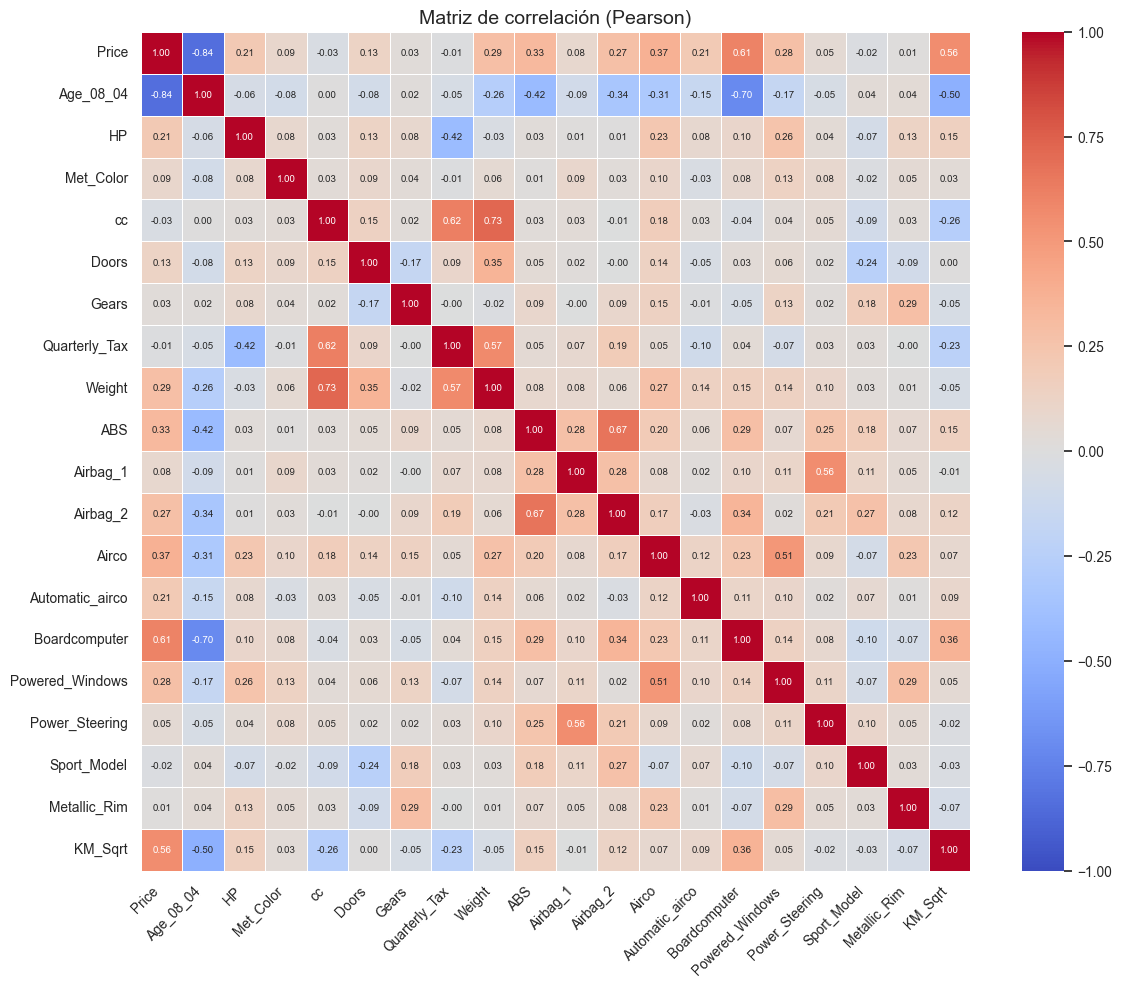

In [902]:
matrix = show_correlation_matrix(df)

In [903]:
# orig_doors = pd.to_numeric(df["Doors"], errors="coerce").astype("Int64")

# raw = df["Model_Clean"].str.extract(
#     r"(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))", expand=False
# )


# def normalize(val):
#     if pd.isna(val):
#         return pd.NA
#     return max(map(int, val.split("/"))) if "/" in val else int(val)


# df["Doors_extracted"] = raw.apply(normalize).astype("Int64")
# df["Doors_extracted"].value_counts(dropna=False)

In [904]:
# df["Doors"].value_counts(dropna=False)

In [905]:
# orig_doors = pd.to_numeric(df["Doors"], errors="coerce").astype("Int64")

# raw = df["Model_Clean"].str.extract(
#     r"(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))", expand=False
# )


# def normalize(val):
#     if pd.isna(val):
#         return pd.NA
#     return max(map(int, val.split("/"))) if "/" in val else int(val)


# df["Doors_extracted"] = raw.apply(normalize).astype("Int64")

# body_map = {
#     "Sedan": 4,
#     "Coupe": 3,
#     "Convertible": 3,
#     "Hatchback": 5,
#     "Hatchb": 5,
#     "Wagon": 5,
#     "Stationwagen": 5,
#     "Sw": 5,
#     "Station": 5,
#     "Mpv": 5,
#     "Verso": 5,
# }
# mask_inf = df["Doors_extracted"].isna() & df["Body_Style"].notna()
# df.loc[mask_inf, "Doors_extracted"] = df.loc[mask_inf, "Body_Style"].map(body_map)
# manual_map = {"Gli": 4, "XLi": 4, "E-Four": 4, "XEi": 4, "16V": 4}


# def assign_manual(text):
#     for key, doors in manual_map.items():
#         if key.lower() in text.lower():
#             return doors
#     return pd.NA


# mask_man = df["Doors_extracted"].isna()
# df.loc[mask_man, "Doors_extracted"] = (
#     df.loc[mask_man, "Model_Clean"].apply(assign_manual).astype("Int64")
# )
# combined = pd.concat(
#     [orig_doors.fillna(0), df["Doors_extracted"].fillna(0)], axis=1
# ).max(axis=1)
# df["Doors"] = combined.replace({0: pd.NA}).astype("Int64")

# five_styles = {
#     "Hatchback",
#     "Hatchb",
#     "Wagon",
#     "Stationwagen",
#     "Sw",
#     "Station",
#     "Mpv",
#     "Verso",
# }


# def force_3_or_5(row):
#     d = row["Doors"]
#     if d in (3, 5):
#         return d
#     return 5 if row["Body_Style"] in five_styles else 3


# df["Doors"] = df.apply(force_3_or_5, axis=1).astype("Int64")
# df.drop(columns=["Doors_extracted"], inplace=True)

# print(df[["Model_Clean", "Doors"]])
# print("\nDistribución de Doors:")
# print(df["Doors"].value_counts(dropna=False))

Después de corregir la feature Doors veremos cómo quedó


In [906]:
# df["Doors"].value_counts()

In [907]:
# hist = histogram(df["Doors"], title="Doors")

Quedó bastante bien


En la siguiente celda, retiramos las features auxiliares derivadas de model para que no interfieran en el dataset


In [908]:
# df.drop(
#     columns=["Model", "Model_Clean", "Model_Len", "Model_Words"],
#     inplace=True,
#     axis=1,
#     errors="ignore",
# )
# print(df.columns.tolist())

Ahora veremos qué tal las features nuevas en una matriz de correlación


In [909]:
# df["Body_Style"].value_counts(dropna=False)

In [910]:
# df[
#     [
#         "Doors",
#         "Brand",
#         "Series",
#         "Engine_Size",
#         "Engine_Tech",
#         "Body_Style",
#         "Trim",
#         "Price",
#     ]
# ]

In [911]:
# df["Engine_Tech"].value_counts(dropna=False)

In [912]:
# df["Body_Style"].value_counts()

Como notamos


In [913]:
# matrix = show_correlation_matrix(
#     df[
#         [
#             "Doors",
#             "Brand",
#             "Series",
#             "Engine_Size",
#             "Engine_Tech",
#             "Body_Style",
#             "Trim",
#             "Price",
#         ]
#     ]
# )

## Eliminación de valores nulos


In [914]:
# # Seleccionar columnas numéricas
# numeric_df = df.select_dtypes(include="number")

# # Verificar si hay valores negativos
# negativos_bool = (numeric_df < 0).any()

# # Convertir a DataFrame con nombre de columna y booleano
# negativos_df = negativos_bool.reset_index()
# negativos_df.columns = ["columna", "tiene_valores_negativos"]

# # Mostrar el resultado
# negativos_df

# Limpieza de datos


In [915]:
# # Sacamos las columnas que no nos interesan
# df = df.drop(columns=["Id"], axis=1, errors="ignore")
# df

In [916]:
# # 1. Obtener el número de nulos por columna
# null_counts = df.isnull().sum()

# # 2. Filtrar solo columnas con al menos un nulo
# null_counts = null_counts[null_counts > 0]

# # 3. Mostrar el resultado
# print(null_counts)

## Detección de valores duplicados


In [917]:
# def duplicados_con_indices(df):
#     resultado = []

#     for i in range(len(df)):
#         fila_actual = df.iloc[i]
#         duplicado_en = False

#         for j in range(i):
#             if df.iloc[j].equals(fila_actual):
#                 duplicado_en = j
#                 break

#         resultado.append({"Fila": i, "Duplicado_de": duplicado_en})

#     # Convertir la lista de resultados en un DataFrame
#     df_resultado = pd.DataFrame(resultado)
#     return df_resultado


# df_re = duplicados_con_indices(df)

In [918]:
# # Crear una columna 'dup_col' que marca los duplicados según df_re
# dup_col = "Duplicado_de"
# df[dup_col] = False
# for idx, orig in zip(df_re["Fila"], df_re["Duplicado_de"]):
#     df.at[idx, dup_col] = orig

# # 1) Filtrar las filas marcadas
# df_dup = df.loc[df[dup_col] != False]

# # 2) Sacar índices de duplicados y de sus originales
# dup_idxs = df_dup.index.tolist()
# orig_idxs = df_dup[dup_col].tolist()

# # 3) Unión única y ordenada de índices
# all_idxs = sorted(set(dup_idxs + orig_idxs))

# # 4) Extraer esas filas completas
# pd.set_option("display.max_columns", None)
# df_pairs = df.loc[all_idxs]

# # 5) Mostrar resultado
# df_pairs

In [919]:
# # Verificar si hay columnas constantes
# columnas_cte = df.columns[df.nunique() == 1]
# print("Columnas constantes:", columnas_cte.tolist())

In [920]:
# # borrar columnas constantes
# df.drop(columns=["Cylinders", "Brand", "Series"], axis=1, inplace=True)
# df

In [921]:
# # Mostrar cantidad de outliers por columna
# resumen = resumen_outliers(df)
# resumen

In [922]:
# # ------------------------------------------------
# # Detectar columnas con valores continuos en `df`
# # ------------------------------------------------

# from pandas.api.types import is_float_dtype, is_integer_dtype

# # Umbral mínimo de valores únicos para considerar un entero como “continuo”
# INT_UNIQUE_THRESHOLD = 20

# continuous_features = []
# for col in df.columns:
#     series = df[col]
#     # Si es float, lo consideramos continuo
#     if is_float_dtype(series):
#         continuous_features.append(col)
#     # Si es entero y tiene muchos valores únicos, también lo consideramos continuo
#     elif is_integer_dtype(series) and series.nunique() > INT_UNIQUE_THRESHOLD:
#         continuous_features.append(col)

# print("Features continuas detectadas:")
# for feat in continuous_features:
#     print(f" - {feat} (dtype={df[feat].dtype}, únicos={df[feat].nunique()})")

In [923]:
# # Define tus cortes manuales
# bins = [df["Quarterly_Tax"].min() - 1, 100, 150, 200, df["Quarterly_Tax"].max()]
# labels = [1, 2, 3, 4]

# # Crea la categoría
# df["Tax_RangeCat"] = pd.cut(df["Quarterly_Tax"], bins=bins, labels=labels).astype(int)

# # Muestra la relación entre Quarterly_Tax y la nueva categoría
# print(
#     df[["Quarterly_Tax", "Tax_RangeCat"]]
#     .drop_duplicates()
#     .sort_values("Quarterly_Tax")
#     .reset_index(drop=True)
# )

In [924]:
# df

In [925]:
# # Primero ponemos las continuas en un nuevo DataFrame
# df_toyota_continuas = df[continuous_features].copy()

# # Ahora veremos BoxPlots e Histogramas con sus curva de densidad
# histogram_por_lotes(df_toyota_continuas, 6)

In [926]:
# boxplots_por_lotes(df_toyota_continuas, 6)

---

### Price

* **Distribución**: el histograma muestra una distribución con pico principal entre \$8 000 y \$12 000, con una larga cola hacia la derecha que llega hasta \$30 000. La curva de densidad confirma ese sesgo positivo.
* **Boxplot**: la mediana está cerca de \$10 000; el IQR va aproximadamente de \$8 000 a \$12 000. Hay muchos valores atípicos por encima de \$15 000, que corresponden a modelos o equipamientos premium.
* **Interpretación**: la mayoría de los coches se cotizan en un rango estrecho, pero existen unos pocos vehículos de alto precio que inflan la cola, por lo que conviene una transformación (por ejemplo, log) o tratar outliers antes de modelar.

---

### Age_08_04

- **Distribución**: el histograma es prácticamente creciente desde valores bajos hasta el máximo (\~80), y la densidad señala que hay un acumulado mayor en edades altas. No es simétrica: hay más coches "viejos".
- **Boxplot**: la mediana está en torno a 60–65, el IQR entre \~50 y \~70, con algunos autos muy recientes (cerca de 0) como outliers en la izquierda.
- **Interpretación**: la flota tiende a concentrarse en edades entre 50 y 80 años (o unidades de medida), con pocos vehículos nuevos. Al modelar, podría ser útil agrupar edades muy bajas o muy altas o usar técnicas robustas a outliers.

---

### KM

- **Distribución**: el histograma con KDE presenta un solo pico alrededor de 50 000–75 000 km y luego una cola larga hacia la derecha hasta >200 000 km.
- **Boxplot**: la mediana se sitúa cerca de 75 000 km; el IQR va de \~50 000 a \~100 000 km. Varios outliers por encima de 150 000 km.
- **Interpretación**: la mayoría de los vehículos tienen kilometrajes moderados, pero existe un subgrupo con uso intensivo. Para regresión podría convenir una transformación (raíz o log) y evaluar si recortar o imputar outliers.

---

### Weight

- **Distribución**: el histograma muestra un pico muy marcado entre 1 000 y 1 100 kg, con una cola derecha que llega hasta 1 600 kg; la densidad refleja un sesgo ligero a la derecha.
- **Boxplot**: la mediana ronda 1 050 kg, el IQR entre \~1 015 y \~1 100 kg, con algunos valores muy pesados como outliers.
- **Interpretación**: el peso es bastante homogéneo (la mayoría alrededor de \~1 050 kg), pero hay versiones más pesadas que conviene revisar (p. ej. carrocerías especiales o variante 4×4). Para modelar, quizá baste winsorizar esos pocos valores extremos.

---

**Resumen general**:

- **Precio** y **KM** presentan sesgo positivo y varios outliers altos.
- **Edad** está sesgada hacia valores altos, con pocos coches muy nuevos.
- **Peso** es la más concentrada, aunque con alguna cola derecha.


In [927]:
# # Variables enteras

# df_toyota_enteras = df.copy()
# df_toyota_enteras.drop(
#     columns=[
#         "Price",
#         "Quarterly_Tax",
#         "Weight",
#         "KM",
#         "Mfr_Guarantee",
#         "BOVAG_Guarantee",
#         "ABS",
#         "Airbag_1",
#         "Airbag_2",
#         "Airco",
#         "Automatic_airco",
#         "Boardcomputer",
#         "CD_Player",
#         "Central_Lock",
#         "Met_Color",
#         "Powered_Windows",
#         "Power_Steering",
#         "Radio",
#         "Mistlamps",
#         "Sport_Model",
#         "Backseat_Divider",
#         "Metallic_Rim",
#         "Radio_cassette",
#         "Tow_Bar",
#         "Age_08_04_calculada",
#         "Fuel_Type",
#         "Automatic",
#     ],
#     axis=1,
#     inplace=True,
#     errors="ignore",  # Ignore if any column is missing
# )

In [928]:
# df_toyota_enteras.describe().T

In [929]:
# bar_por_lotes(df_toyota_enteras, 3)

# Eliminación de outliers en Price


In [930]:
# # Eliminacion de outliers y/o Transformacion para varibles continuas

# histogram(df_toyota_continuas["Price"])
# boxplot(df_toyota_continuas["Price"])

Dicha distribucion presenta una sesgo hacia la izquierda por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


In [931]:
# price = df_toyota_continuas["Price"].copy()
# _, mask_price = limpiar_outliers_z_core(price)
# price_limpio = price[mask_price]
# histogram(price_limpio)
# boxplot(price_limpio)

# print(len(price) - len(price_limpio))

# price_limpio_l, mask_price_l = limpiar_outliers_z_core(price_limpio)

# histogram(price_limpio_l)

# boxplot(price_limpio_l)

# print(len(price_limpio) - len(price_limpio_l))

# Eliminación de outliers en KM


In [932]:
# histogram(df_toyota_continuas["KM"])
# boxplot(df_toyota_continuas["KM"])

dicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distribucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


In [933]:
# km = df_toyota_continuas["KM"].copy()
# _, mask_km = limpiar_outliers_z_core(km)
# km_limpio = km[mask_km]
# histogram(km_limpio)
# boxplot(km_limpio)
# print(len(km) - len(km_limpio))

# Eliminacion de outliers en Weight


In [934]:
# histogram(df_toyota_continuas["Price"])
# boxplot(df_toyota_continuas["Price"])

In [935]:
# # 1. Copiar la serie de peso
# peso = df_toyota_continuas["Weight"].copy()

# # 2. Obtener la máscara de valores válidos con tu función de Z-score
# _, mask_peso = limpiar_outliers_z_core(peso)

# # 3. Filtrar los datos limpios
# peso_limpio = peso[mask_peso]

# # 4. Visualizar distribución y outliers
# histogram(peso_limpio)
# boxplot(peso_limpio)

# # 5. Imprimir cuántos registros se eliminaron
# print(f"Registros removidos: {len(peso) - len(peso_limpio)}")

# Eliminacion de outliers en Age


In [936]:
# histogram(df_toyota_continuas["Age_08_04"])
# boxplot(df_toyota_continuas["Age_08_04"])

# Analisis Bivariado con dataframe original


In [937]:
# from sklearn.preprocessing import LabelEncoder

# df["fuel_type_encoded"] = LabelEncoder().fit_transform(df["Fuel_Type"])

In [938]:
# matriza = mostrar_matriz_correlacion(df)

Price vs. Mfg_Year (r ≈ +0.89)

Los autos más nuevos (año de fabricación alto) tienden a tener precios más elevados. Cada año adicional aumenta fuertemente el valor.

Price vs. Age_08_04 (r ≈ –0.88)

Edad y precio son espejo: a más antigüedad (edad alta) el precio baja. Cada unidad de edad adicional desploma el valor de manera proporcional.

Mfg_Year vs. Age_08_04 (r ≈ –0.98)

Lógicamente inversas: un coche más nuevo (año alto) tiene poca “edad” registrada.

Quarterly_Tax vs. Tax_RangeCat (r ≈ +0.93)

El impuesto trimestral está prácticamente definido por la categoría de rango fiscal; son casi sinónimos cuantitativos.

Airco vs. Automatic_airco (r ≈ +0.72)

Tener aire acondicionado se superpone en gran medida con la versión “automática” de ese aire, indica redundancia de ambas variables.

Boardcomputer vs. Mfg_Year (r ≈ +0.72)

Los coches más modernos casi siempre traen ordenador de a bordo, reflejando que ese equipamiento se incorporó en modelos recientes.

Central_Lock vs. Powered_Windows (r ≈ +0.88)

El cierre centralizado y las ventanillas eléctricas suelen venir juntos en el mismo nivel de acabado.

Radio vs. Radio_cassette (r ≈ +0.99)

HP vs. Mfg_Year (r ≈ +0.72)
Modelos más nuevos tienden a tener más potencia; esta alta colinealidad puede inflar la varianza de los coeficientes si ambas variables entran al mismo tiempo.

Casi todos los coches con radio incorporan también reproductor de casete; las dos variables miden esencialmente el mismo equipamiento.


In [939]:
# # Realizamos feature selection de acuerdo a la alta correlacion
# cols_to_drop = [
#     "Mfg_Year",
#     "Age_08_04",
#     "Tax_RangeCat",
#     "Automatic_airco",
#     "Boardcomputer",
#     "Powered_Windows",
#     "Radio_cassette",
#     "Fuel_Type",
#     "Quarterly_Tax",
#     "BOVAG_Guarantee",
#     "Duplicado_de",
# ]

# df_clean = df.drop(columns=cols_to_drop)
# df_clean

In [940]:
# matriz = mostrar_matriz_correlacion(df_clean)

In [941]:
# df.columnas

In [942]:
# df.dtypes

In [943]:
# from pathlib import Path


# clean_path = Path("data/clean_df.csv").resolve()
# df_clean.to_csv(clean_path, index=False)
# clean_path